# Machine Learning Project

## Dataset Description

This dataset is related to power consumption of three different distribution networks of Tetouan city, which is located in north Morocco.

The data has observations in 10-minute windows starting from January 1st, 2017, through December 30th of the same year. Some of the features are:

- **Date Time**: Time window of ten minutes in the format "dd/mm/yyyy hour:minute:second"
- **Temperature**: Weather Temperature in °C
- **Humidity**: Weather Humidity in %
- **Wind Speed**: Wind Speed in km/h
- **General Diffuse Flows**: The general diffuse flows in the city, which may include air or water flows.
- **Diffuse Flows**: This attribute represents a specific type of diffuse flow in the city.
- **Zone 1 Power Consumption in KiloWatts (KW)**
- **Zone 2 Power Consumption in KW**
- **Zone 3 Power Consumption in KW**


- import the necessary librairies :

In [1]:
# Data preprocessing and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder

# Feature selection
from sklearn.feature_selection import RFE

#feature extraction
from sklearn.decomposition import PCA

# Regression models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers


# Classification models
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LassoCV
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.discriminant_analysis import StandardScaler

# Model evaluation metrics
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,  roc_curve, auc


# Statistical analysis
from scipy.stats import norm

# Utility functions
from sklearn.utils import resample


C:\Users\Morsi Store DZ\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# **Part 1: Regression**

### *Data Preprocessing*

#### **exploratory data analysis**

In [2]:
#read the dataset
file_path = 'Tetuan City power consumption.csv'

df = pd.read_csv(file_path)

In [3]:
#print the first 5 rows of the dataset
df.head()

DateTime  Temperature  Humidity  Wind Speed  general diffuse flows  \
0  1/1/2017 0:00        6.559      73.8       0.083                  0.051   
1  1/1/2017 0:10        6.414      74.5       0.083                  0.070   
2  1/1/2017 0:20        6.313      74.5       0.080                  0.062   
3  1/1/2017 0:30        6.121      75.0       0.083                  0.091   
4  1/1/2017 0:40        5.921      75.7       0.081                  0.048   

   diffuse flows  Zone 1 Power Consumption  Zone 2  Power Consumption  \
0          0.119               34055.69620                16128.87538   
1          0.085               29814.68354                19375.07599   
2          0.100               29128.10127                19006.68693   
3          0.096               28228.86076                18361.09422   
4          0.085               27335.69620                17872.34043   

   Zone 3  Power Consumption  
0                20240.96386  
1                20131.08434  
2                19668.43373  
3                18899.27711  
4                18442.40964

In [4]:
#print the size of the dataset
df.shape

(52416, 9)

In [5]:
#print general information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DateTime                   52416 non-null  object 
 1   Temperature                52416 non-null  float64
 2   Humidity                   52416 non-null  float64
 3   Wind Speed                 52416 non-null  float64
 4   general diffuse flows      52416 non-null  float64
 5   diffuse flows              52416 non-null  float64
 6   Zone 1 Power Consumption   52416 non-null  float64
 7   Zone 2  Power Consumption  52416 non-null  float64
 8   Zone 3  Power Consumption  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


In [6]:
#summary statistics:
df.describe().T

count          mean          std           min  \
Temperature                52416.0     18.810024     5.815476      3.247000   
Humidity                   52416.0     68.259518    15.551177     11.340000   
Wind Speed                 52416.0      1.959489     2.348862      0.050000   
general diffuse flows      52416.0    182.696614   264.400960      0.004000   
diffuse flows              52416.0     75.028022   124.210949      0.011000   
Zone 1 Power Consumption   52416.0  32344.970564  7130.562564  13895.696200   
Zone 2  Power Consumption  52416.0  21042.509082  5201.465892   8560.081466   
Zone 3  Power Consumption  52416.0  17835.406218  6622.165099   5935.174070   

                                    25%           50%           75%  \
Temperature                   14.410000     18.780000     22.890000   
Humidity                      58.310000     69.860000     81.400000   
Wind Speed                     0.078000      0.086000      4.915000   
general diffuse flows          0.062000      5.035500    319.600000   
diffuse flows                  0.122000      4.456000    101.000000   
Zone 1 Power Consumption   26310.668692  32265.920340  37309.018185   
Zone 2  Power Consumption  16980.766032  20823.168405  24713.717520   
Zone 3  Power Consumption  13129.326630  16415.117470  21624.100420   

                                   max  
Temperature                   40.01000  
Humidity                      94.80000  
Wind Speed                     6.48300  
general diffuse flows       1163.00000  
diffuse flows                936.00000  
Zone 1 Power Consumption   52204.39512  
Zone 2  Power Consumption  37408.86076  
Zone 3  Power Consumption  47598.32636

- **general interpretation** :
The summary statistics reveal key insights into the dataset, including central tendencies, variability, data ranges, and scaling. Temperature and humidity show moderate averages with significant variability, ranging widely across different conditions. Wind speed, though low on average, varies considerably, indicating diverse weather patterns. Solar irradiance data (general diffuse and diffuse flows) exhibit high variability, reflecting different lighting conditions. Power consumption across three zones varies, with Zone 1 consuming the most energy on average and Zone 3 the least. The scales of the variables differ significantly,highliting the need to scaling later on. These statistics highlight the diverse nature of the dataset, crucial for understanding and preparing the data for machine learning modeling.

In [7]:
#check for any null values:
df.isna().sum(axis=0)

DateTime                     0
Temperature                  0
Humidity                     0
Wind Speed                   0
general diffuse flows        0
diffuse flows                0
Zone 1 Power Consumption     0
Zone 2  Power Consumption    0
Zone 3  Power Consumption    0
dtype: int64

In [8]:
#check for dupplicates
df.duplicated().sum()

0

#### **features engineering**

In [9]:
#check the DateTime colulmn
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Find the first and last dates
first_date = df['DateTime'].min()
last_date = df['DateTime'].max()

print("First Date:", first_date)
print("Last Date:", last_date)


First Date: 2017-01-01 00:00:00
Last Date: 2017-12-30 23:50:00


In [10]:
# Convert 'DateTime' column to datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Extract various time components from the 'DateTime' column and create new columns
df['Day'] = df['DateTime'].dt.day            # Extract day of the month
df['Month'] = df['DateTime'].dt.month        # Extract month
df['Hour'] = df['DateTime'].dt.hour          # Extract hour
df['Minute'] = df['DateTime'].dt.minute      # Extract minute
df['Day of Week'] = df['DateTime'].dt.dayofweek + 1  # Extract day of the week (1=Monday, ..., 7=Sunday)

# Function to convert month to quarter
def month_to_quarter(series):
    if series['Month'] <= 3:
        return 1  # Q1: January to March
    elif series['Month'] <= 6:
        return 2  # Q2: April to June
    elif series['Month'] <= 9:
        return 3  # Q3: July to September
    else:
        return 4  # Q4: October to December

# Apply the month_to_quarter function to create a 'Quarter of Year' column
df['Quarter of Year'] = df.apply(month_to_quarter, axis='columns')

# Extract the day of the year and create a new column
df['Day of Year'] = df['DateTime'].dt.strftime('%j').astype(int)  # Day of the year (1 to 365/366)


In [11]:
#drop the column
df = df.drop(['DateTime'],axis=1)

In [12]:
#check the changes
df.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows',
       'diffuse flows', 'Zone 1 Power Consumption',
       'Zone 2  Power Consumption', 'Zone 3  Power Consumption', 'Day',
       'Month', 'Hour', 'Minute', 'Day of Week', 'Quarter of Year',
       'Day of Year'],
      dtype='object')

In [13]:
# rerange the columns :
df = df[['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows',
    'diffuse flows', 'Day','Month', 'Hour', 'Minute', 'Day of Week', 'Quarter of Year',
    'Day of Year','Zone 1 Power Consumption','Zone 2  Power Consumption', 'Zone 3  Power Consumption']]

In [14]:
df.head()

Temperature  Humidity  Wind Speed  general diffuse flows  diffuse flows  \
0        6.559      73.8       0.083                  0.051          0.119   
1        6.414      74.5       0.083                  0.070          0.085   
2        6.313      74.5       0.080                  0.062          0.100   
3        6.121      75.0       0.083                  0.091          0.096   
4        5.921      75.7       0.081                  0.048          0.085   

   Day  Month  Hour  Minute  Day of Week  Quarter of Year  Day of Year  \
0    1      1     0       0            7                1            1   
1    1      1     0      10            7                1            1   
2    1      1     0      20            7                1            1   
3    1      1     0      30            7                1            1   
4    1      1     0      40            7                1            1   

   Zone 1 Power Consumption  Zone 2  Power Consumption  \
0               34055.69620                16128.87538   
1               29814.68354                19375.07599   
2               29128.10127                19006.68693   
3               28228.86076                18361.09422   
4               27335.69620                17872.34043   

   Zone 3  Power Consumption  
0                20240.96386  
1                20131.08434  
2                19668.43373  
3                18899.27711  
4                18442.40964

- In the feature engineering process applied to the `DateTime` column of your dataset, We've transformed this single timestamp into several more granular and potentially informative temporal features. This transformation includes:
1. **Day**: Extracted as the day of the month, which could help identify daily consumption patterns.
2. **Month**: Useful for capturing seasonal trends in power consumption due to changes in weather or public habits.
3. **Hour**: Important for detecting hourly variations, which are crucial for understanding peak demand times.
4. **Minute**: Although less granular, could be useful for fine-scale analysis in models that need to predict short-term fluctuations.
5. **Day of Week**: Indicates the day of the week, which is vital for distinguishing weekday vs. weekend patterns in energy usage.
6. **Quarter of Year**: Derived using a custom function, segments the year into four quarters, aiding in capturing broader seasonal trends and effects on power usage.
7. **Day of Year**: Provides a continuous ordinal representation of the day within the year, useful for trend analysis over longer periods.

- These transformations enrich the dataset by breaking down the `DateTime` into components that are more directly related to variations in power consumption, enhancing the model's ability to learn and predict based on time-based patterns. The original `DateTime` column is then dropped to avoid redundancy and focus the model on these engineered features. This approach maximizes the temporal information available for predictive modeling, potentially improving the accuracy and relevance of the model outputs.


In [15]:
df.shape

(52416, 15)

#### **data visualization**

<AxesSubplot:>

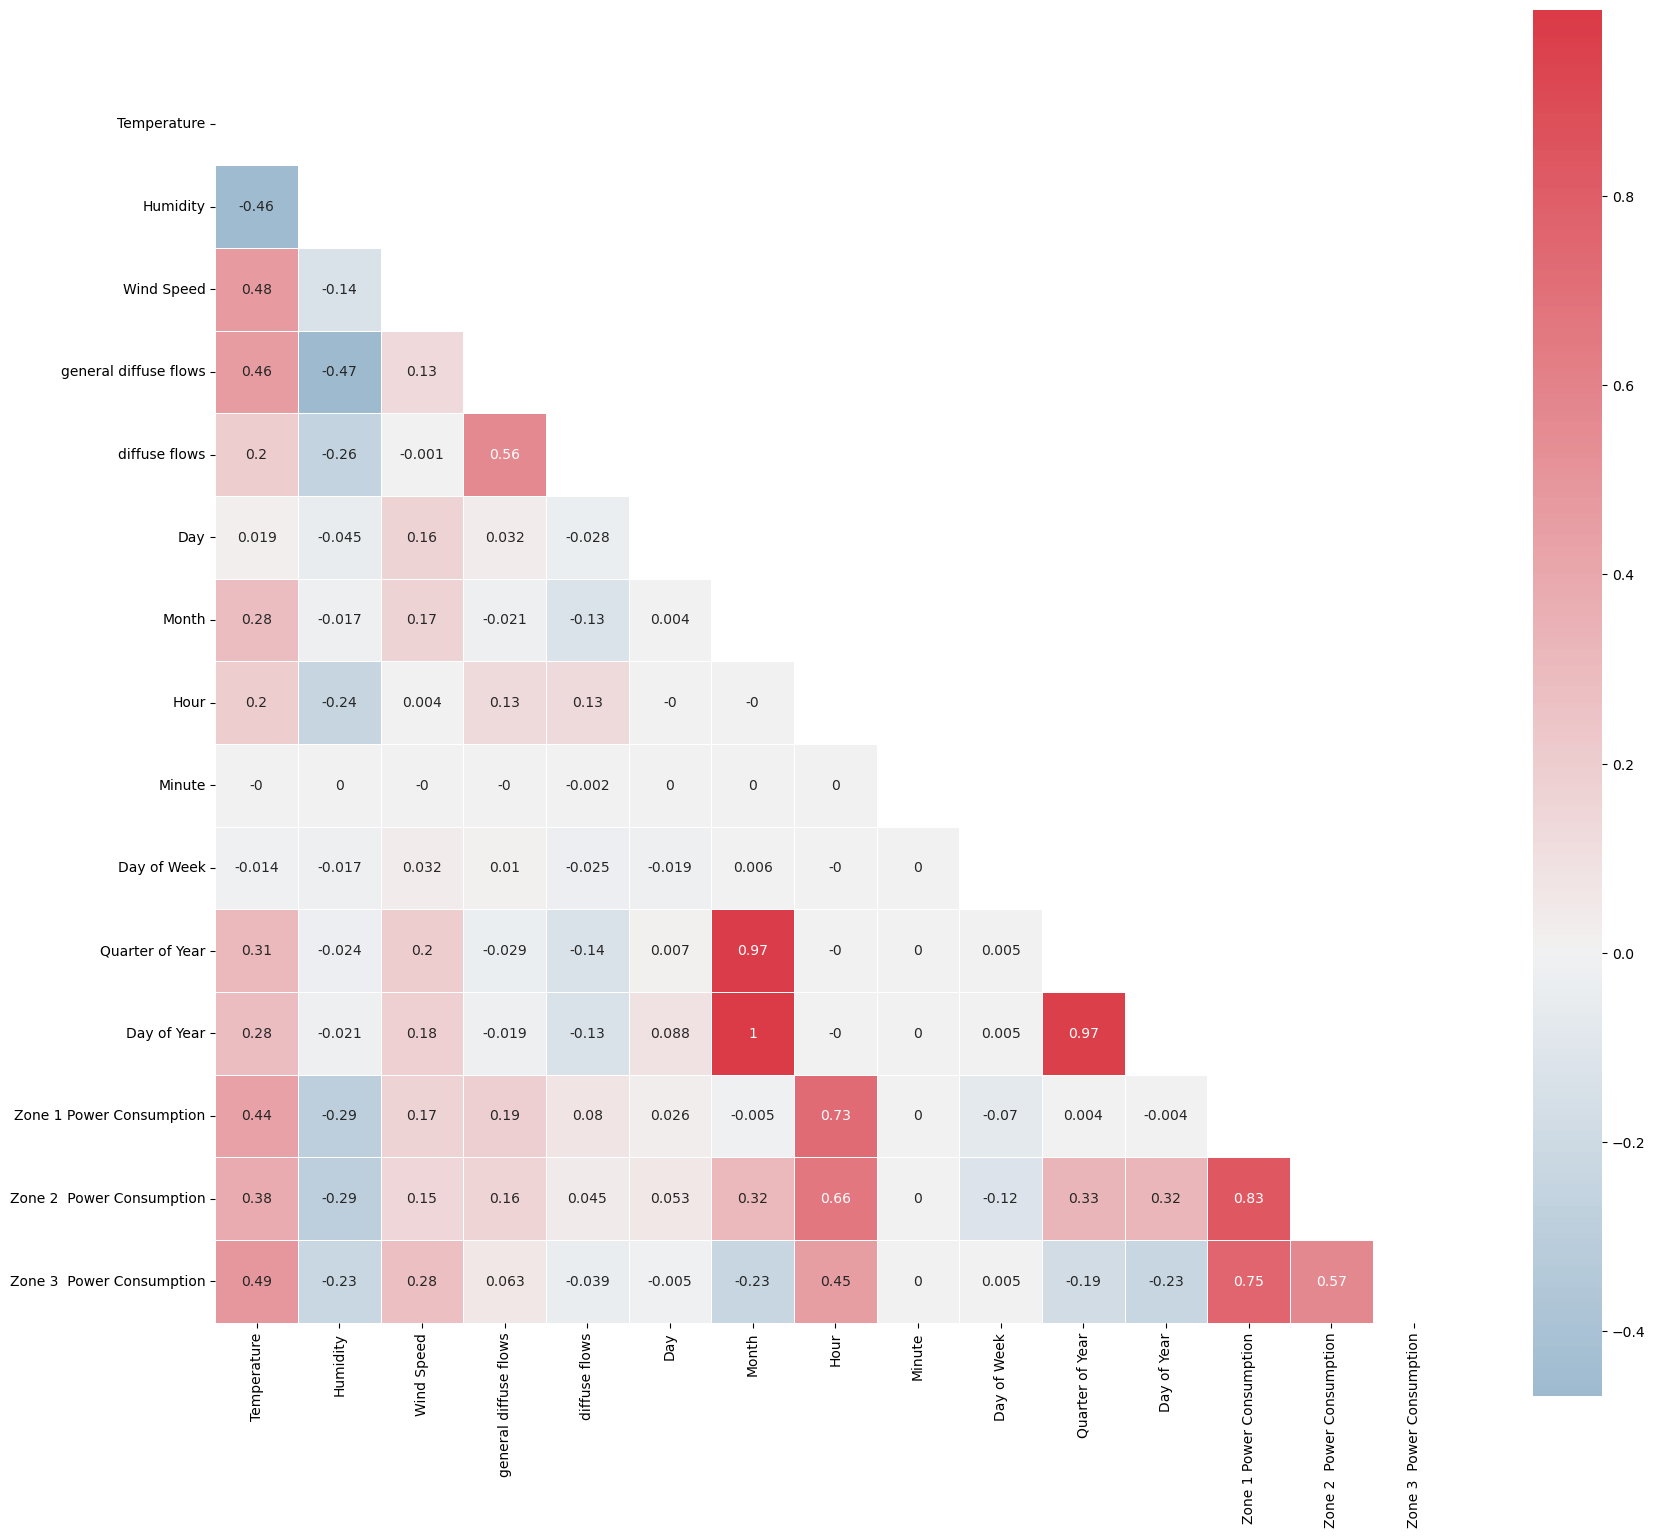

In [16]:
#correlation matrix

corr = df.corr().round(decimals=3)
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0, square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

##### **general interpretation  :**

- **Temperature:**
Positively correlated with all three zones of power consumption. This suggests that as the temperature increases, so does the power consumption, likely due to higher cooling demands.
- **Humidity:**
Negatively correlated with power consumption in all zones.Lower humidity may reduce the need for dehumidifying, thus lowering power consumption.
- **Wind Speed:**
Shows a positive correlation with power consumption, particularly strong with Zone 3. This might indicate that higher wind speeds either impact the operational efficiency of power-related infrastructure or correlate with weather conditions that increase power use.
- **General and Diffuse Flows:**
Both have positive correlations with temperature and show mixed influence on power consumption. General diffuse flows have a modest positive correlation with Zone 1 and Zone 2 power consumption. Diffuse flows have weaker and mixed correlations, suggesting their impact might be more complex or indirect.
- **Temperature and Time:**
Temperature shows significant correlations with Month, Quarter of Year, and Day of Year , indicating seasonal variations. Higher temperatures in warmer months correlate with increased power consumption.
- **Humidity and Time:**
Humidity displays a slight negative correlation with Hour, suggesting possible diurnal variations where humidity might decrease during the warmer hours of the day, affecting comfort levels and thus power use.
- **Wind Speed:**
Wind Speed correlates positively with Day of Year and Quarter of Year, reflecting possibly windier conditions during specific times of the year, which could impact energy consumption or generation if wind power is involved.
- **Power Consumption Across Zones:**
All three zones of power consumption show strong inter-correlations, reinforcing that power use patterns are similar across different areas of the city. Additionally, Hour shows a substantial correlation with Zone 1 and Zone 2 power consumption (0.73 and 0.66, respectively), highlighting peak consumption times during specific hours of the day.
- **Day and Month:**
Day and Month have weak correlations with power consumption, implying that while seasonal and diurnal patterns affect temperature and environmental conditions, the exact day of the month is less influential on power usage.
- **Quarter of Year :**
shows a stronger relationship with Month and Day of Year (both above 0.95), confirming its effectiveness in capturing seasonal trends in the data.

##### **results :**
- **Significant Features to Keep**:
    - Temperature: Strong positive correlations with power consumption across all zones; indicates cooling demand.
    - Humidity: Negative correlation with power consumption; affects heating and cooling systems.
    - Wind Speed: Positive correlation with power consumption, especially in Zone 3; may impact power generation or usage patterns.
    - Hour: Significant correlations with Zones 1 and 2 power consumption; captures daily peak consumption times.
    - Month, Quarter of Year, Day of Year: Capture seasonal variations in power consumption; essential for long-term planning and forecasting.
    - General Diffuse Flows and Diffuse Flows: Moderate direct correlation with power consumption; indicators of environmental or industrial activities.

- **Features to Drop**:
    - Minute: No significant correlation with power consumption or other variables; granularity is not meaningful.
    - Day: Weak correlations with power consumption; daily fluctuations are better captured by other features.
    - Day of Week: Relatively weak correlation with power consumption; less essential compared to other time-related features.

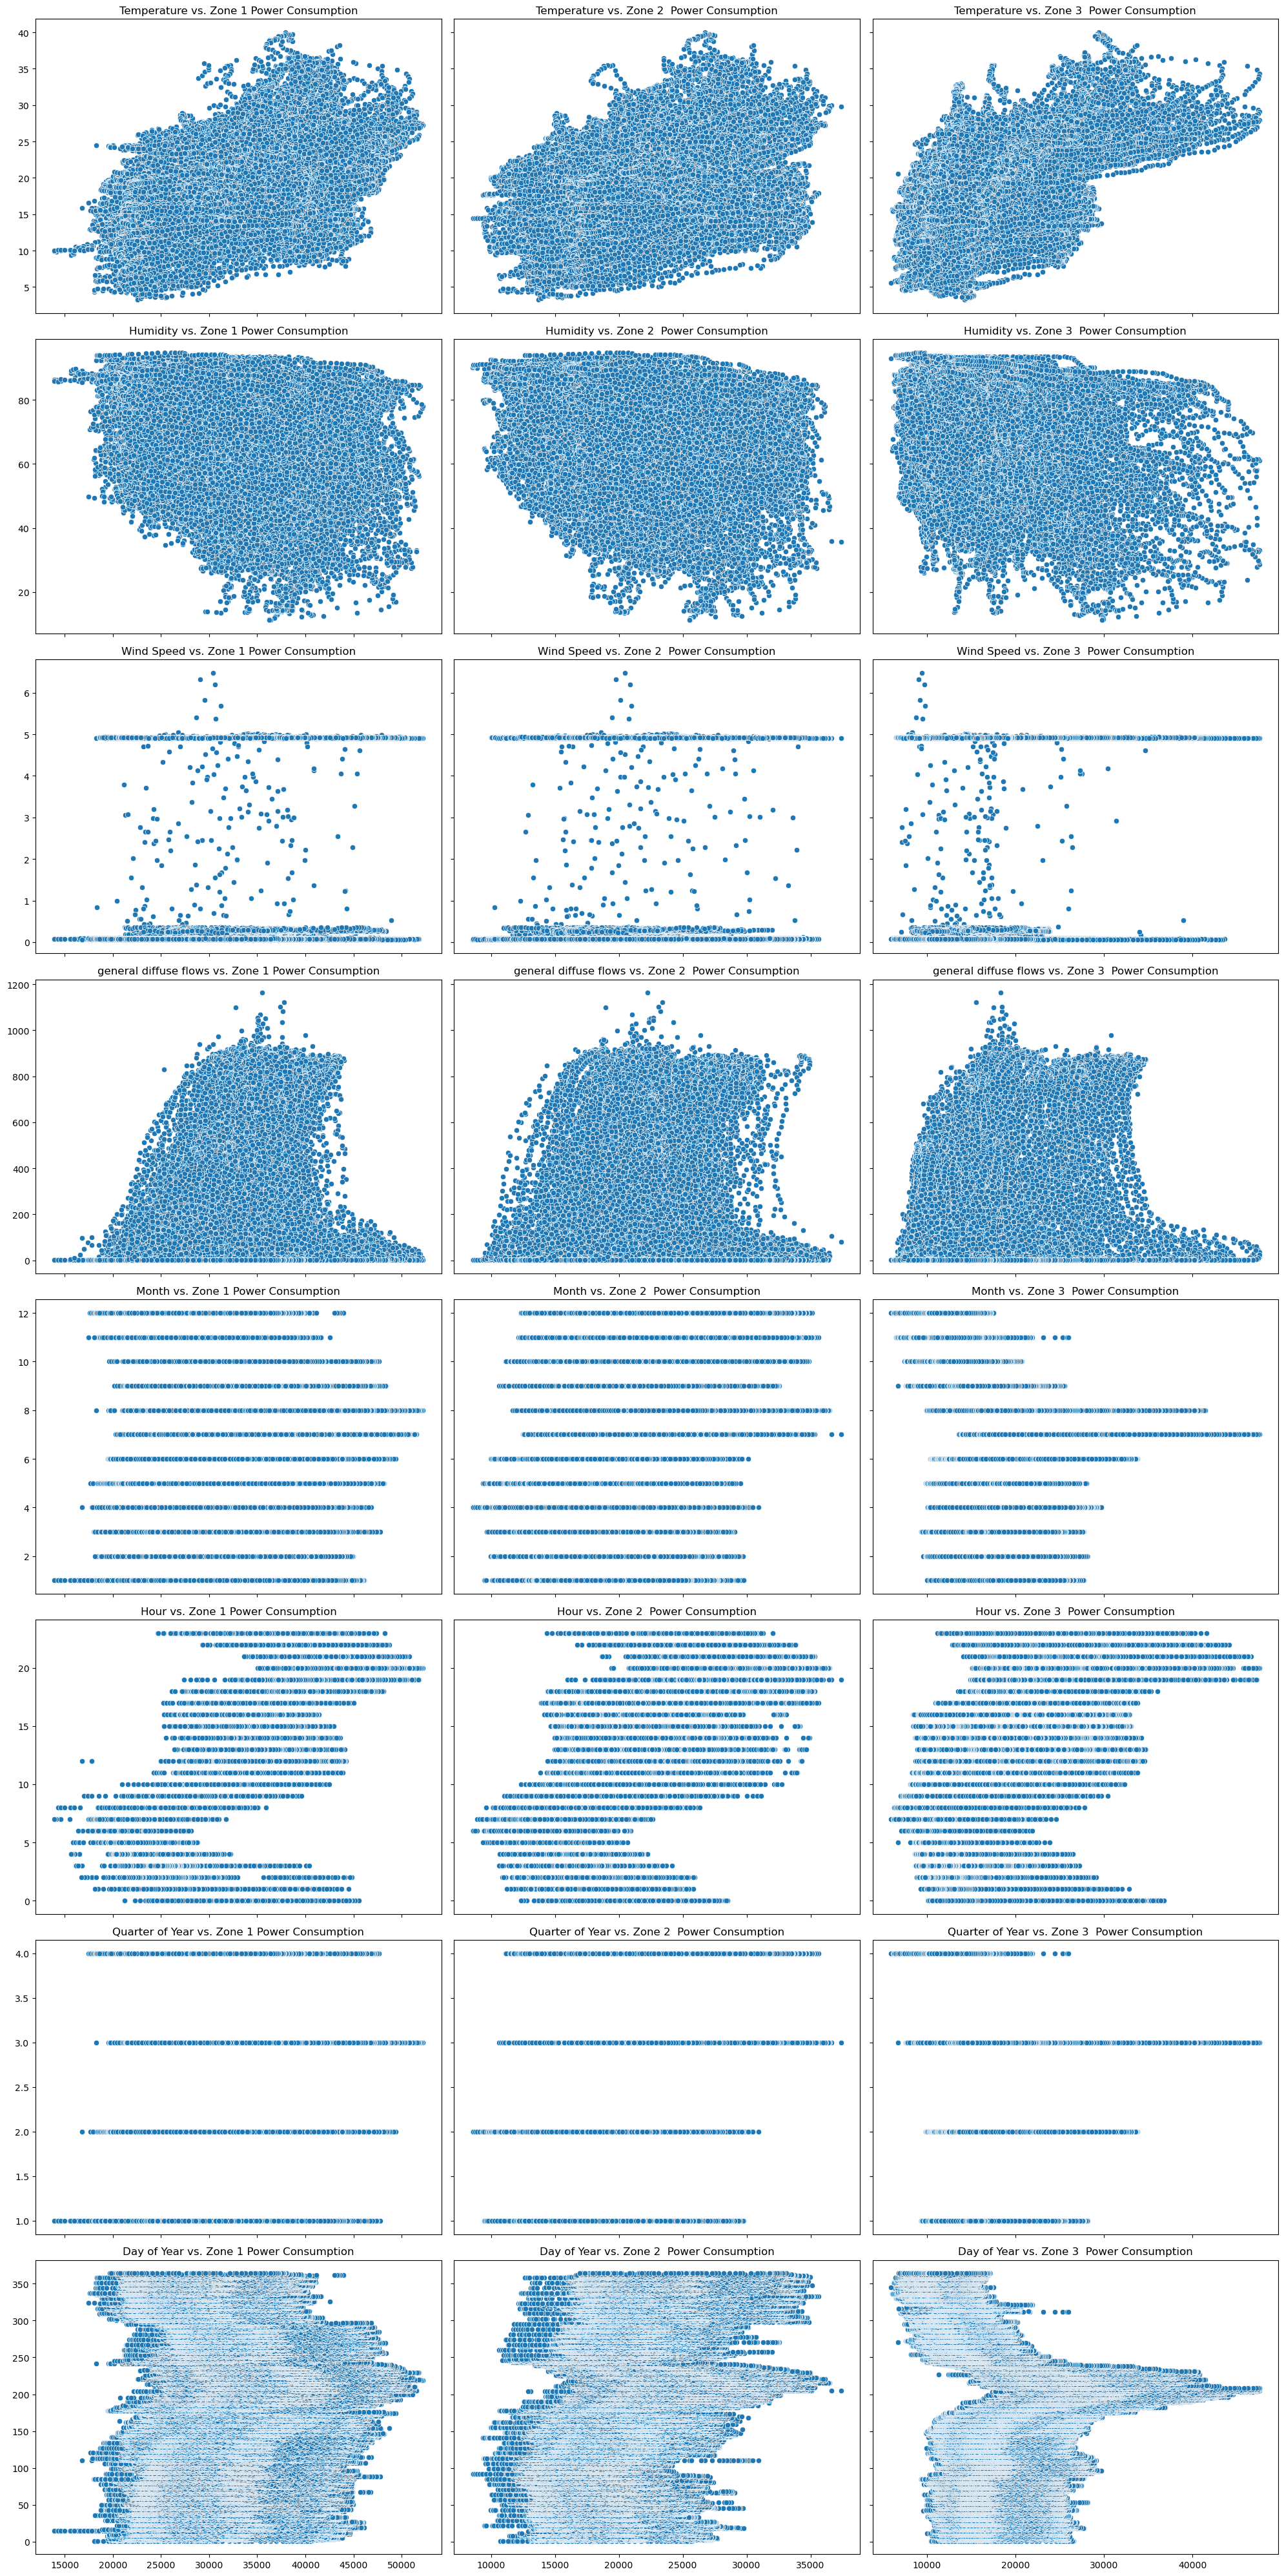

In [17]:
# scatter plot of some features and the target variables

import matplotlib.pyplot as plt
import seaborn as sns

# Define your features and targets
features = ['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows','Month', 'Hour', 'Quarter of Year','Day of Year']
targets = ['Zone 1 Power Consumption','Zone 2  Power Consumption', 'Zone 3  Power Consumption']

# Prepare the subplot grid
fig, axes = plt.subplots(nrows=len(features), ncols=len(targets), figsize=(20,40), sharex='col', sharey='row')

# Loop over each feature
for i, feature in enumerate(features):
    # Loop over each target variable
    for j, target in enumerate(targets):
        ax = axes[i][j]
        sns.scatterplot(data=df, x=target, y=feature, ax=ax)
        ax.set_title(f'{feature} vs. {target}')
        ax.set_xlabel('')
        ax.set_ylabel('')

# Adjust layout for better readability
plt.tight_layout()
plt.show()


##### **general interpretation  :**
- The scatter plots illustrate the relationships between Temperature, Humidity, Wind Speed,the  other features  and the power consumption in each of the three zones in Tetouan city.

*Temperature vs Power Consumption*
- There is a visible trend where power consumption increases with temperature in all zones. This relationship is particularly pronounced in Zone 3, suggesting that higher temperatures lead to increased energy demand, likely for cooling systems.

Humidity vs Power Consumption
- The correlation appears to be somewhat negative across all zones, indicating that higher humidity might slightly reduce power consumption. This could be due to less need for humidification or possibly lower activity or comfort levels during high humidity.

*Wind Speed vs Power Consumption*
- The relationship between wind speed and power consumption is less clear from the plots, suggesting a weak positive correlation, especially in Zone 3. This might indicate that certain wind conditions could either enhance or suppress power usage depending on other environmental factors or energy production from wind sources.

**Key Takeaways:**
- **Temperature** shows the strongest and most consistent positive correlation with power consumption across all zones. This feature should be emphasized in predictive modeling.
- **Humidity** presents a slight negative impact on power usage, which may be valuable in refining models, especially to account for variations in environmental comfort that influence energy needs.
- **Wind Speed** does not show a strong uniform correlation and may require further analysis to determine its impact, possibly in combination with other variables or specific to certain conditions or zones.


#### **data scaling**

In [18]:
#we will apply minmax scaler
scaler = MinMaxScaler()

scaler.fit(df)
df_scaled = scaler.transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

In [19]:
#verification
df_scaled.head()

Temperature  Humidity  Wind Speed  general diffuse flows  diffuse flows  \
0     0.090091  0.748382    0.005130               0.000040       0.000115   
1     0.086146  0.756770    0.005130               0.000057       0.000079   
2     0.083399  0.756770    0.004663               0.000050       0.000095   
3     0.078176  0.762761    0.005130               0.000075       0.000091   
4     0.072736  0.771148    0.004819               0.000038       0.000079   

   Day  Month  Hour  Minute  Day of Week  Quarter of Year  Day of Year  \
0  0.0    0.0   0.0     0.0          1.0              0.0          0.0   
1  0.0    0.0   0.0     0.2          1.0              0.0          0.0   
2  0.0    0.0   0.0     0.4          1.0              0.0          0.0   
3  0.0    0.0   0.0     0.6          1.0              0.0          0.0   
4  0.0    0.0   0.0     0.8          1.0              0.0          0.0   

   Zone 1 Power Consumption  Zone 2  Power Consumption  \
0                  0.526251                   0.262361   
1                  0.415545                   0.374886   
2                  0.397623                   0.362116   
3                  0.374149                   0.339738   
4                  0.350834                   0.322796   

   Zone 3  Power Consumption  
0                   0.343368  
1                   0.340731  
2                   0.329626  
3                   0.311165  
4                   0.300199

#### **split data into features and the different targets**

In [20]:
#split into independent and target features
X = df_scaled.drop(['Zone 1 Power Consumption','Zone 2  Power Consumption', 'Zone 3  Power Consumption'], axis=1)

y_zone1 = df_scaled['Zone 1 Power Consumption']
y_zone2= df_scaled['Zone 2  Power Consumption']
y_zone3= df_scaled['Zone 3  Power Consumption']

- Since we have three distinct targets, it is most appropriate to treat them separately. We will create three separate dataframes, one for each target.

In [21]:
# Create three DataFrames, each with features and one target
df_zone1 = X.copy()
df_zone1['Zone 1 Power Consumption']= y_zone1

df_zone2 = X.copy()
df_zone2['Zone 2  Power Consumption'] = y_zone2

df_zone3 = X.copy()
df_zone3['Zone 3  Power Consumption'] = y_zone3


In [22]:
#print the three datasets
df_zone1.head()

Temperature  Humidity  Wind Speed  general diffuse flows  diffuse flows  \
0     0.090091  0.748382    0.005130               0.000040       0.000115   
1     0.086146  0.756770    0.005130               0.000057       0.000079   
2     0.083399  0.756770    0.004663               0.000050       0.000095   
3     0.078176  0.762761    0.005130               0.000075       0.000091   
4     0.072736  0.771148    0.004819               0.000038       0.000079   

   Day  Month  Hour  Minute  Day of Week  Quarter of Year  Day of Year  \
0  0.0    0.0   0.0     0.0          1.0              0.0          0.0   
1  0.0    0.0   0.0     0.2          1.0              0.0          0.0   
2  0.0    0.0   0.0     0.4          1.0              0.0          0.0   
3  0.0    0.0   0.0     0.6          1.0              0.0          0.0   
4  0.0    0.0   0.0     0.8          1.0              0.0          0.0   

   Zone 1 Power Consumption  
0                  0.526251  
1                  0.415545  
2                  0.397623  
3                  0.374149  
4                  0.350834

In [23]:
df_zone2.head()

Temperature  Humidity  Wind Speed  general diffuse flows  diffuse flows  \
0     0.090091  0.748382    0.005130               0.000040       0.000115   
1     0.086146  0.756770    0.005130               0.000057       0.000079   
2     0.083399  0.756770    0.004663               0.000050       0.000095   
3     0.078176  0.762761    0.005130               0.000075       0.000091   
4     0.072736  0.771148    0.004819               0.000038       0.000079   

   Day  Month  Hour  Minute  Day of Week  Quarter of Year  Day of Year  \
0  0.0    0.0   0.0     0.0          1.0              0.0          0.0   
1  0.0    0.0   0.0     0.2          1.0              0.0          0.0   
2  0.0    0.0   0.0     0.4          1.0              0.0          0.0   
3  0.0    0.0   0.0     0.6          1.0              0.0          0.0   
4  0.0    0.0   0.0     0.8          1.0              0.0          0.0   

   Zone 2  Power Consumption  
0                   0.262361  
1                   0.374886  
2                   0.362116  
3                   0.339738  
4                   0.322796

In [24]:
df_zone3.head()

Temperature  Humidity  Wind Speed  general diffuse flows  diffuse flows  \
0     0.090091  0.748382    0.005130               0.000040       0.000115   
1     0.086146  0.756770    0.005130               0.000057       0.000079   
2     0.083399  0.756770    0.004663               0.000050       0.000095   
3     0.078176  0.762761    0.005130               0.000075       0.000091   
4     0.072736  0.771148    0.004819               0.000038       0.000079   

   Day  Month  Hour  Minute  Day of Week  Quarter of Year  Day of Year  \
0  0.0    0.0   0.0     0.0          1.0              0.0          0.0   
1  0.0    0.0   0.0     0.2          1.0              0.0          0.0   
2  0.0    0.0   0.0     0.4          1.0              0.0          0.0   
3  0.0    0.0   0.0     0.6          1.0              0.0          0.0   
4  0.0    0.0   0.0     0.8          1.0              0.0          0.0   

   Zone 3  Power Consumption  
0                   0.343368  
1                   0.340731  
2                   0.329626  
3                   0.311165  
4                   0.300199

#### **Feature selection**

- some techniques require to split the data into training and testing sets, thus we will do it from now

In [25]:
# Splitting the dataset into training and testing sets for Zone 1
X_train_zone1, X_test_zone1, y_train_zone1, y_test_zone1 = train_test_split(
    X, y_zone1, test_size=0.2, random_state=42)

# Splitting the dataset into training and testing sets for Zone 2
X_train_zone2, X_test_zone2, y_train_zone2, y_test_zone2 = train_test_split(
    X, y_zone2, test_size=0.2, random_state=42)

# Splitting the dataset into training and testing sets for Zone 3
X_train_zone3, X_test_zone3, y_train_zone3, y_test_zone3 = train_test_split(
    X, y_zone3, test_size=0.2, random_state=42)


##### *first technique:*
**apply RFE (backward elemination technique)**

In [26]:
# Initialize the estimator
estimator = DecisionTreeRegressor(random_state=42)

# Apply RFE for Zone 1
rfe_zone1 = RFE(estimator, n_features_to_select=9)  # Adjust the number of features as needed
rfe_zone1.fit(X_train_zone1, y_train_zone1)
X_train_zone1_rfe = rfe_zone1.transform(X_train_zone1)
X_test_zone1_rfe = rfe_zone1.transform(X_test_zone1)

# Apply RFE for Zone 2
rfe_zone2 = RFE(estimator, n_features_to_select=9)  # Adjust the number of features as needed
rfe_zone2.fit(X_train_zone2, y_train_zone2)
X_train_zone2_rfe = rfe_zone2.transform(X_train_zone2)
X_test_zone2_rfe = rfe_zone2.transform(X_test_zone2)

# Apply RFE for Zone 3
rfe_zone3 = RFE(estimator, n_features_to_select=9)  # Adjust the number of features as needed
rfe_zone3.fit(X_train_zone3, y_train_zone3)
X_train_zone3_rfe = rfe_zone3.transform(X_train_zone3)
X_test_zone3_rfe = rfe_zone3.transform(X_test_zone3)

# Identifying the selected features
selected_features_zone1 = X.columns[rfe_zone1.support_]
selected_features_zone2 = X.columns[rfe_zone2.support_]
selected_features_zone3 = X.columns[rfe_zone3.support_]

print("Selected features for Zone 1:", selected_features_zone1)
print("Selected features for Zone 2:", selected_features_zone2)
print("Selected features for Zone 3:", selected_features_zone3)

Selected features for Zone 1: Index(['Temperature', 'Humidity', 'general diffuse flows', 'diffuse flows',
       'Day', 'Hour', 'Minute', 'Day of Week', 'Day of Year'],
      dtype='object')
Selected features for Zone 2: Index(['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows', 'Day',
       'Hour', 'Minute', 'Day of Week', 'Day of Year'],
      dtype='object')
Selected features for Zone 3: Index(['Temperature', 'Humidity', 'general diffuse flows', 'diffuse flows',
       'Day', 'Hour', 'Minute', 'Day of Week', 'Day of Year'],
      dtype='object')


##### *second technique:*
**Feature Importance using Random Forest**

In [27]:
# Function to train RandomForestRegressor and extract feature importances for a given target
def apply_random_forest_feature_importance(X_train, y_train, X_columns):
    # Train the model
    rf = RandomForestRegressor(n_estimators=100, random_state=42)  # Use 100 trees in the forest
    rf.fit(X_train, y_train)

    # Extract feature importances
    importances = rf.feature_importances_

    # Sort the feature importances in descending order and get the indices
    indices = np.argsort(importances)[::-1]

    # Display the feature importances in descending order
    print("Feature ranking:")
    for f in range(X_train.shape[1]):
        print(f"{f + 1}. feature {X_columns[indices[f]]} ({importances[indices[f]]:.4f})")

# Apply to Zone 1
print("Zone 1 Power Consumption:")
apply_random_forest_feature_importance(X_train_zone1, y_train_zone1, X_train_zone1.columns)

# Apply to Zone 2
print("\nZone 2 Power Consumption:")
apply_random_forest_feature_importance(X_train_zone2, y_train_zone2, X_train_zone2.columns)

# Apply to Zone 3
print("\nZone 3 Power Consumption:")
apply_random_forest_feature_importance(X_train_zone3, y_train_zone3, X_train_zone3.columns)


Zone 1 Power Consumption:
Feature ranking:
1. feature Hour (0.7457)
2. feature Day of Year (0.0962)
3. feature Temperature (0.0834)
4. feature general diffuse flows (0.0207)
5. feature Day of Week (0.0151)
6. feature diffuse flows (0.0092)
7. feature Minute (0.0090)
8. feature Day (0.0077)
9. feature Humidity (0.0055)
10. feature Wind Speed (0.0033)
11. feature Month (0.0033)
12. feature Quarter of Year (0.0007)

Zone 2 Power Consumption:
Feature ranking:
1. feature Hour (0.5842)
2. feature Day of Year (0.2676)
3. feature general diffuse flows (0.0548)
4. feature Day of Week (0.0388)
5. feature Temperature (0.0137)
6. feature Day (0.0123)
7. feature diffuse flows (0.0079)
8. feature Humidity (0.0077)
9. feature Minute (0.0060)
10. feature Wind Speed (0.0051)
11. feature Month (0.0015)
12. feature Quarter of Year (0.0004)

Zone 3 Power Consumption:
Feature ranking:
1. feature Day of Year (0.4445)
2. feature Hour (0.3625)
3. feature Temperature (0.1070)
4. feature Month (0.0322)
5. featu

##### *third technique:*
**Feature Selection using Lasso Regression:**

In [28]:
# Function to apply Lasso regression and rank features by their coefficients
def rank_features_with_lasso(X_train, y_train, X_columns):
    # Scaling features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    # Using LassoCV for automatic alpha selection
    lasso = LassoCV(cv=5, random_state=42).fit(X_train_scaled, y_train)

    # Extracting coefficients and ranking them
    coefs = np.abs(lasso.coef_)
    indices = np.argsort(coefs)[::-1]

    # Getting the top 9 features based on coefficients
    top_features = X_columns[indices][:9]

    return top_features

# Apply the function to each zone
top_features_zone1 = rank_features_with_lasso(X_train_zone1, y_train_zone1, X_train_zone1.columns)
print("Top 9 features for Zone 1 by Lasso:", top_features_zone1)

top_features_zone2 = rank_features_with_lasso(X_train_zone2, y_train_zone2, X_train_zone2.columns)
print("\nTop 9 features for Zone 2 by Lasso:", top_features_zone2)

top_features_zone3 = rank_features_with_lasso(X_train_zone3, y_train_zone3, X_train_zone3.columns)
print("\nTop 9 features for Zone 3 by Lasso:", top_features_zone3)


Top 9 features for Zone 1 by Lasso: Index(['Hour', 'Temperature', 'Quarter of Year', 'diffuse flows',
       'Day of Week', 'Month', 'general diffuse flows', 'Wind Speed', 'Day'],
      dtype='object')

Top 9 features for Zone 2 by Lasso: Index(['Hour', 'Quarter of Year', 'Temperature', 'Day of Week', 'Day of Year',
       'Humidity', 'diffuse flows', 'Day', 'general diffuse flows'],
      dtype='object')


C:\Users\Morsi Store DZ\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.10176539440163879, tolerance: 0.08448129146234169
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Morsi Store DZ\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.12763233853297606, tolerance: 0.08437306024027322
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Morsi Store DZ\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.13055013846491192, tolerance: 0.08487402095999946
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Morsi Store DZ\anaconda3\lib\site-packages\skl


Top 9 features for Zone 3 by Lasso: Index(['Day of Year', 'Temperature', 'Hour', 'Quarter of Year',
       'general diffuse flows', 'diffuse flows', 'Wind Speed', 'Day',
       'Humidity'],
      dtype='object')


C:\Users\Morsi Store DZ\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.221e+00, tolerance: 1.061e-01
  model = cd_fast.enet_coordinate_descent(


1. **Recursive Feature Elimination (RFE)**:
   - **Method**: RFE is a backward elimination technique where features are recursively removed based on model weights until the desired number of features is reached.
   - **Interpretation**: RFE identified critical features like `Temperature`, `Humidity`, `Hour`, and `Day of Year` across all zones. These features are likely fundamental drivers of power consumption due to their direct influence on energy needs throughout the day and year.

2. **Random Forest Feature Importance**:
   - **Method**: This method utilizes a RandomForestRegressor to rank features based on how much they decrease the impurity of the split (i.e., Gini importance).
   - **Interpretation**: The `Hour` and `Day of Year` consistently appear as top features, indicating their strong influence on predicting power consumption, likely due to daily and seasonal patterns. Other environmental factors like `Temperature` also show significance.

3. **Lasso Regression (L1 Regularization)**:
   - **Method**: LassoCV applies L1 regularization to reduce some coefficients to zero, effectively performing feature selection. It's particularly useful for reducing the complexity of a model while maintaining accuracy.
   - **Interpretation**: Lasso highlighted `Hour`, `Temperature`, and `Day of Year` as significant across zones, aligning with the physical intuition that time of day and year significantly affect energy usage.

#### **Working with data after feature selection**

- now, according to the previous analysis on the features (visualization and feature selection), we modify the original dataframes to include only the important features

In [29]:
#NOTE: 'df_zone1', 'df_zone2', 'df_zone3' are the original dataframes


# Specified features to include for each zone, now including the target column explicitly
features_zone1 = ['Hour', 'Temperature', 'Day of Year', 'Humidity', 'general diffuse flows','diffuse flows', 'Day of Week', 'Minute', 'Zone 1 Power Consumption']
features_zone2 = ['Hour', 'Day of Year', 'general diffuse flows', 'Temperature', 'Humidity','Day of Week', 'diffuse flows', 'Minute', 'Zone 2  Power Consumption']
features_zone3 = ['Hour', 'Day of Year', 'Temperature', 'general diffuse flows', 'Quarter of Year','diffuse flows', 'Month', 'Day', 'Zone 3  Power Consumption']

# Modifying df_zone1 to include only the specified features and target
df_zone1_selected_features = df_zone1[features_zone1]

# Modifying df_zone2 to include only the specified features and target
df_zone2_selected_features = df_zone2[features_zone2]

# Modifying df_zone3 to include only the specified features and target
df_zone3_selected_features = df_zone3[features_zone3]


In [30]:
df_zone1_selected_features.head()

Hour  Temperature  Day of Year  Humidity  general diffuse flows  \
0   0.0     0.090091          0.0  0.748382               0.000040   
1   0.0     0.086146          0.0  0.756770               0.000057   
2   0.0     0.083399          0.0  0.756770               0.000050   
3   0.0     0.078176          0.0  0.762761               0.000075   
4   0.0     0.072736          0.0  0.771148               0.000038   

   diffuse flows  Day of Week  Minute  Zone 1 Power Consumption  
0       0.000115          1.0     0.0                  0.526251  
1       0.000079          1.0     0.2                  0.415545  
2       0.000095          1.0     0.4                  0.397623  
3       0.000091          1.0     0.6                  0.374149  
4       0.000079          1.0     0.8                  0.350834

In [31]:
df_zone2_selected_features.head()

Hour  Day of Year  general diffuse flows  Temperature  Humidity  \
0   0.0          0.0               0.000040     0.090091  0.748382   
1   0.0          0.0               0.000057     0.086146  0.756770   
2   0.0          0.0               0.000050     0.083399  0.756770   
3   0.0          0.0               0.000075     0.078176  0.762761   
4   0.0          0.0               0.000038     0.072736  0.771148   

   Day of Week  diffuse flows  Minute  Zone 2  Power Consumption  
0          1.0       0.000115     0.0                   0.262361  
1          1.0       0.000079     0.2                   0.374886  
2          1.0       0.000095     0.4                   0.362116  
3          1.0       0.000091     0.6                   0.339738  
4          1.0       0.000079     0.8                   0.322796

In [32]:
df_zone3_selected_features.head()

Hour  Day of Year  Temperature  general diffuse flows  Quarter of Year  \
0   0.0          0.0     0.090091               0.000040              0.0   
1   0.0          0.0     0.086146               0.000057              0.0   
2   0.0          0.0     0.083399               0.000050              0.0   
3   0.0          0.0     0.078176               0.000075              0.0   
4   0.0          0.0     0.072736               0.000038              0.0   

   diffuse flows  Month  Day  Zone 3  Power Consumption  
0       0.000115    0.0  0.0                   0.343368  
1       0.000079    0.0  0.0                   0.340731  
2       0.000095    0.0  0.0                   0.329626  
3       0.000091    0.0  0.0                   0.311165  
4       0.000079    0.0  0.0                   0.300199

- now we will split our new dataframes again into features and targets and into training and testing sets

In [33]:
# Splitting df_zone1_selected_features  into features and target
X_zone1_selected_features = df_zone1_selected_features.drop(['Zone 1 Power Consumption'], axis=1)
y_zone1 = df_zone1_selected_features['Zone 1 Power Consumption']

# Splitting df_zone2_selected_features  into features and target
X_zone2_selected_features = df_zone2_selected_features.drop(['Zone 2  Power Consumption'], axis=1)
y_zone2 = df_zone2_selected_features['Zone 2  Power Consumption']

# Splitting df_zone3_selected_features  into features and target
X_zone3_selected_features = df_zone3_selected_features.drop(['Zone 3  Power Consumption'], axis=1)
y_zone3 = df_zone3_selected_features['Zone 3  Power Consumption']

#### **Apply feature extraction (PCA)**

We trained our decision tree model on the original data and after feature selection to evaluate its impact. Now, we will train the decision tree regressor on the reduced data after applying PCA (feature extraction).


In [34]:
def apply_pca(X, y, n_components=0.95):
    """
    Applies PCA to the features X and returns the PCA-transformed features and the target y.

    Parameters:
    - X: Features data.
    - y: Target variable.
    - n_components: Number of components to keep. If 0 < n_components < 1, select the number of components such that the cumulative variance is greater than n_components.

    Returns:
    - X_pca: PCA-transformed features.
    - y: Target variable (unchanged).
    """
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)

    # Returning only the PCA-transformed features and the target variable
    return X_pca, y



## *Training a decision tree model*

In [35]:
def train_test_evaluate_decision_tree(X, y):
    # Splitting the dataset into training, validation, and testing sets
    X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

    # Define the model
    model = DecisionTreeRegressor(random_state=42)

    # Parameters to search
    param_grid = {
        'max_depth': [10, 20, 30, 40, 50],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    # Scorer - using mean_squared_error
    scorer = make_scorer(mean_squared_error, greater_is_better=False)

    # Setting up GridSearchCV: 5-fold cross-validation
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5, verbose=1)

    # Fitting the model
    grid_search.fit(X_train, y_train)

    # Best parameters and best score (cross-validation score)
    print("Best parameters:", grid_search.best_params_)
    best_mse = np.sqrt(-grid_search.best_score_)
    print("Cross-validation best RMSE:", best_mse)

    # Evaluating on training data
    y_train_pred = grid_search.predict(X_train)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_r_squared = r2_score(y_train, y_train_pred)
    print("Training MSE:", train_mse)
    print("Training RMSE:", np.sqrt(train_mse))
    print("Training R-squared:", train_r_squared)

    # Evaluating on validation data
    y_val_pred = grid_search.predict(X_val)
    val_mse = mean_squared_error(y_val, y_val_pred)
    val_rmse = np.sqrt(val_mse)
    val_r_squared = r2_score(y_val, y_val_pred)
    print("Validation MSE:", val_mse)
    print("Validation RMSE:", val_rmse)
    print("Validation R-squared:", val_r_squared)

    # Predicting on test data
    y_pred = grid_search.predict(X_test)

    # Evaluating the model on test data
    test_mse = mean_squared_error(y_test, y_pred)
    test_rmse_decision_tree = np.sqrt(test_mse)
    test_r_squared_decision_tree = r2_score(y_test, y_pred)
    print("Test MSE:", test_mse)
    print("Test RMSE:", test_rmse_decision_tree)
    print("Test R-squared:", test_r_squared_decision_tree)

    return test_rmse_decision_tree, test_r_squared_decision_tree

In [36]:
#apply it on the original dataset (before feature selection) => for zone 1
print("Decision Tree Regressor for Zone 1 on Features X:")
train_test_evaluate_decision_tree(X, y_zone1)


#apply it on the original dataset (before feature selection) => for zone 2
print("\nDecision Tree Regressor for Zone 2:")
train_test_evaluate_decision_tree(X, y_zone2)


#apply it on the original dataset (before feature selection) => for zone 3
print("\nDecision Tree Regressor for Zone 3:")
train_test_evaluate_decision_tree(X, y_zone3)

Decision Tree Regressor for Zone 1 on Features X:
Fitting 5 folds for each of 45 candidates, totalling 225 fits
Best parameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10}
Cross-validation best RMSE: 0.0306627460160086
Training MSE: 0.0002542413100782834
Training RMSE: 0.015944946223750128
Training R-squared: 0.9926720252527299
Validation MSE: 0.0008104085295010945
Validation RMSE: 0.02846767516853272
Validation R-squared: 0.9766540445014253
Test MSE: 0.0008142413573915058
Test RMSE: 0.028534914707976713
Test R-squared: 0.976335089684561

Decision Tree Regressor for Zone 2:
Fitting 5 folds for each of 45 candidates, totalling 225 fits
Best parameters: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 5}
Cross-validation best RMSE: 0.029219872546060965
Training MSE: 7.160658735842013e-05
Training RMSE: 0.008462067558133776
Training R-squared: 0.9977916830293025
Validation MSE: 0.0007216981071108285
Validation RMSE: 0.02686443945275666
Validation R-squa

(0.016805088054499664, 0.9887577227412453)

In [37]:
#apply it on the original dataset after feature selection

print("Decision Tree Regressor for Zone 1:")
zone1_rmse_decision_tree, zone1_r2_decision_tree = train_test_evaluate_decision_tree(X_zone1_selected_features, y_zone1)
print()

print("\nDecision Tree Regressor for Zone 2:")
zone2_rmse_decision_tree, zone2_r2_decision_tree = train_test_evaluate_decision_tree(X_zone2_selected_features, y_zone2)
print()

print("\nDecision Tree Regressor for Zone 3:")
zone3_rmse_decision_tree, zone3_r2_decision_tree = train_test_evaluate_decision_tree(X_zone3_selected_features, y_zone3)
print()

Decision Tree Regressor for Zone 1:
Fitting 5 folds for each of 45 candidates, totalling 225 fits
Best parameters: {'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 2}
Cross-validation best RMSE: 0.03064988930819765
Training MSE: 0.00022105350478680952
Training RMSE: 0.014867868199133645
Training R-squared: 0.9936285944232489
Validation MSE: 0.0008534087080002998
Validation RMSE: 0.029213159842788314
Validation R-squared: 0.9754153109280124
Test MSE: 0.0008277057444420877
Test RMSE: 0.028769875641755694
Test R-squared: 0.9759437640547438


Decision Tree Regressor for Zone 2:
Fitting 5 folds for each of 45 candidates, totalling 225 fits
Best parameters: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 10}
Cross-validation best RMSE: 0.029442404947182418
Training MSE: 0.00017915224917072222
Training RMSE: 0.013384776769551378
Training R-squared: 0.9944750201513994
Validation MSE: 0.0007410076956193741
Validation RMSE: 0.027221456530086226
Validation R-squared: 0.

- **general interpretations**
    - **Analysis:**
    
Decision Tree models trained on feature-selected subsets for Zone 1 and Zone 2 demonstrate superior performance compared to those trained on the full dataset. This is indicated by lower cross-validation and test Root Mean Squared Errors (RMSEs) and higher R-squared values, signifying improved fit and generalization on unseen data without inducing overfitting. Validation set results also show lower RMSE and high R-squared values, confirming that the feature selection process effectively enhances model performance. Conversely, for Zone 3, performance metrics between the full dataset and feature-selected subset are similar, implying that additional features in the full dataset do not significantly contribute to overfitting or noise, suggesting that feature selection complexity may not be necessary for this zone.


**Recommendations:**

For Zone 1 and Zone 2, it is advisable to utilize models trained on feature-selected subsets due to enhanced metrics, indicating that selected features adequately capture underlying patterns without unnecessary complexity or potential noise from less impactful features. The validation set results reinforce this by showing consistent performance improvements. As for Zone 3, both approaches are justifiable, with nearly identical performance metrics suggesting either model could be employed. However, opting for the simpler model with fewer features may be preferable for efficiency and interpretability unless specific features in the full dataset are crucial for further insights or operational considerations.

**NOTE:**

Initially, manually configured parameters for the Decision Tree yielded unsatisfactory results. Consequently, we opted to implement GridSearch with cross-validation to identify the optimal, best-performing parameters, which significantly improved our results. The use of a validation set in this process helped fine-tune the model and ensure that the final model generalizes well to unseen data.

In [38]:
# we apply the PCA (on the original data)
X_pca_zone1, y_zone1_pca = apply_pca(X, y_zone1)
X_pca_zone2, y_zone2_pca = apply_pca(X, y_zone2)
X_pca_zone3, y_zone3_pca = apply_pca(X, y_zone3)

#  print  the number of components selected
pca = PCA(n_components=0.95)
pca.fit(X)

n_components_selected_zone1 = pca.n_components_
n_components_selected_zone2 = pca.n_components_
n_components_selected_zone3 = pca.n_components_

print(f"Number of principal components selected: {n_components_selected_zone1}")
print(f"\nNumber of principal components selected: {n_components_selected_zone2}")
print(f"\nNumber of principal components selected: {n_components_selected_zone3}")

Number of principal components selected: 7

Number of principal components selected: 7

Number of principal components selected: 7


In [39]:
# apply the decision tree on the resulted data from PCA

print("\nDecision Tree Regressor for Zone 1:")
train_test_evaluate_decision_tree(X_pca_zone1, y_zone1)
print()

print("\nDecision Tree Regressor for Zone 1:")
train_test_evaluate_decision_tree(X_pca_zone2, y_zone2)
print()

print("\nDecision Tree Regressor for Zone 1:")
train_test_evaluate_decision_tree(X_pca_zone3, y_zone3)


Decision Tree Regressor for Zone 1:
Fitting 5 folds for each of 45 candidates, totalling 225 fits
Best parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}
Cross-validation best RMSE: 0.046858764155584466
Training MSE: 1.7942965112765589e-06
Training RMSE: 0.0013395135353092029
Training R-squared: 0.999948283150682
Validation MSE: 0.0017645861577282526
Validation RMSE: 0.04200697748860602
Validation R-squared: 0.9491664408602835
Test MSE: 0.0017038048981495924
Test RMSE: 0.04127717163456809
Test R-squared: 0.950481033978812


Decision Tree Regressor for Zone 1:
Fitting 5 folds for each of 45 candidates, totalling 225 fits
Best parameters: {'max_depth': 40, 'min_samples_leaf': 1, 'min_samples_split': 5}
Cross-validation best RMSE: 0.0425225872177667
Training MSE: 8.120316299563922e-05
Training RMSE: 0.009011279764586117
Training R-squared: 0.9974957286817762
Validation MSE: 0.0014673146334350004
Validation RMSE: 0.03830554311630368
Validation R-squared: 0.955279

(0.027125725646072768, 0.9707089165084762)

#### **general interpretations:**

#### Analysis

Applying PCA (Principal Component Analysis) to the feature set for Zones 1, 2, and 3 reduced the dimensionality to 7 principal components, capturing 95% of the variance in the data. The PCA approach, while reducing model complexity and improving training performance, does not enhance the model's ability to generalize as effectively as the full feature set . This could be due to the loss of some critical information that impacts the model's predictive accuracy on unseen data.

#### Zone 1:
- **Cross-Validation RMSE:** 0.0469
- **Validation RMSE:** 0.0420, R² = 0.9492
- **Test RMSE:** 0.0413, R² = 0.9505

#### Zone 2:
- **Cross-Validation RMSE:** 0.0425
- **Validation RMSE:** 0.0383, R² = 0.9553
- **Test RMSE:** 0.0383, R² = 0.9548

#### Zone 3:
- **Cross-Validation RMSE:** 0.0297
- **Validation RMSE:** 0.0264, R² = 0.9725
- **Test RMSE:** 0.0271, R² = 0.9707

The results indicate that while PCA improves training performance by simplifying the feature set, it does not translate to better generalization on validation and test sets. This suggests that PCA may discard some critical information necessary for accurate predictions on unseen data.

#### Recommendations

For practical applications where generalization is crucial, using the full dataset might be preferable for training decision tree models in Zones 1, 2, and 3. While PCA simplifies the model and may reduce overfitting risks, the loss of important features can lead to suboptimal performance on new data. Therefore, maintaining the full feature set ensures that all relevant information is utilized, enhancing the model's predictive accuracy and reliability in real-world scenarios.

## *Applying Random Forest model*

In [40]:
# Function to train, test, and evaluate a Random Forest Regressor model
def train_test_evaluate_random_forest(X, y, n_estimators=100, max_depth=20, min_samples_split=5, min_samples_leaf=1):
    """
    Trains, tests, and evaluates a Random Forest regressor model, printing the performance metrics.

    Parameters:
    - X: Feature set.
    - y: Target variable.
    - n_estimators: Number of trees in the forest.
    - max_depth: Maximum depth of the tree.
    - min_samples_split: Minimum number of samples required to split an internal node.
    - min_samples_leaf: Minimum number of samples required to be at a leaf node.
    """
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Instantiate and fit the model
    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    model.fit(X_train, y_train)

    # Making predictions
    y_train_pred = model.predict(X_train)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_r_squared = r2_score(y_train, y_train_pred)

    y_test_pred = model.predict(X_test)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse_random_forest = np.sqrt(test_mse)
    test_r_squared_random_forest = r2_score(y_test, y_test_pred)

    # Evaluating the model's performance
    print(f"Training MSE: {train_mse}")
    print(f"Training RMSE: {np.sqrt(train_mse)}")
    print(f"Training R-squared: {train_r_squared}")
    print(f"Test MSE: {test_mse}")
    print(f"Test RMSE: {test_rmse_random_forest}")
    print(f"Test R-squared: {test_r_squared_random_forest}")

    return test_rmse_random_forest, test_r_squared_random_forest


In [41]:
#zone 1:
print("Random forest for Zone 1 on the original data:")
train_test_evaluate_random_forest(X, y_zone1)
print()

print("Random Forest Regressor for Zone 1:")
zone1_rmse_rf, zone1_r2_rf = train_test_evaluate_random_forest(X_zone1_selected_features, y_zone1)
print()


print("\nRandom forest for Zone 1 after feature extraction-PCA:")
train_test_evaluate_random_forest(X_pca_zone1, y_zone1)
print()

Random forest for Zone 1 on the original data:
Training MSE: 9.226266663709316e-05
Training RMSE: 0.00960534573230413
Training R-squared: 0.9973414628720446
Test MSE: 0.00034816280089189675
Test RMSE: 0.01865912111788486
Test R-squared: 0.9898810820852014

Random Forest Regressor for Zone 1:
Training MSE: 0.00010077793358595118
Training RMSE: 0.010038821324535624
Training R-squared: 0.9970960965265537
Test MSE: 0.00037291712799225667
Test RMSE: 0.019311062321691594
Test R-squared: 0.9891616284177708


Random forest for Zone 1 after feature extraction-PCA:
Training MSE: 0.00018354828891617504
Training RMSE: 0.013547999443319114
Training R-squared: 0.994711079154305
Test MSE: 0.0006860093204455699
Test RMSE: 0.02619177963494596
Test R-squared: 0.9800619940309739



In [42]:
#zone 2:
print("Random forest for Zone 2 on the original data:")
train_test_evaluate_random_forest(X, y_zone2)
print()

print("\nRandom Forest Regressor for Zone 2:")
zone2_rmse_rf, zone2_r2_rf = train_test_evaluate_random_forest(X_zone2_selected_features, y_zone2)
print()

print("\nRandom forest for Zone 2 after feature extraction-PCA:")
train_test_evaluate_random_forest(X_pca_zone1, y_zone2)

Random forest for Zone 2 on the original data:
Training MSE: 7.334688552764229e-05
Training RMSE: 0.008564279626894622
Training R-squared: 0.9977450416536252
Test MSE: 0.00030818859192345034
Test RMSE: 0.01755530096362493
Test R-squared: 0.9904966990747662


Random Forest Regressor for Zone 2:
Training MSE: 7.709495670384752e-05
Training RMSE: 0.008780373380662551
Training R-squared: 0.9976298118886421
Test MSE: 0.00032485417475843165
Test RMSE: 0.018023711459031727
Test R-squared: 0.9899827992974034


Random forest for Zone 2 after feature extraction-PCA:
Training MSE: 0.00013099658345549838
Training RMSE: 0.011445373888846899
Training R-squared: 0.9959726737258907
Test MSE: 0.0005905730243887575
Test RMSE: 0.024301708260711992
Test R-squared: 0.9817890950016547


(0.024301708260711992, 0.9817890950016547)

In [43]:
#zone 3:
print("Random forest for Zone 3 on the original data:")
train_test_evaluate_random_forest(X, y_zone3)
print()

print("\nRandom Forest Regressor for Zone 3:")
zone3_rmse_rf, zone3_r2_rf = train_test_evaluate_random_forest(X_zone3_selected_features, y_zone3)
print()

print("\nRandom forest for Zone 3 after feature extraction-PCA:")
train_test_evaluate_random_forest(X_pca_zone3, y_zone3)

Random forest for Zone 3 on the original data:
Training MSE: 2.4140887194974586e-05
Training RMSE: 0.004913337683792412
Training R-squared: 0.9990457443459617
Test MSE: 0.00010622901061331774
Test RMSE: 0.010306745878953149
Test R-squared: 0.9957712126804483


Random Forest Regressor for Zone 3:
Training MSE: 5.6035587849756104e-05
Training RMSE: 0.007485692209125093
Training R-squared: 0.9977849912432333
Test MSE: 0.0002135584073830909
Test RMSE: 0.014613637719031182
Test R-squared: 0.99149862095193


Random forest for Zone 3 after feature extraction-PCA:
Training MSE: 7.0444413268551e-05
Training RMSE: 0.008393117017446558
Training R-squared: 0.9972154304390721
Test MSE: 0.0003104749010788235
Test RMSE: 0.01762029798496108
Test R-squared: 0.9876405483102881


(0.01762029798496108, 0.9876405483102881)

#### **general interpretations**

#### Zone 1:
- **Original Data**: The model performs well with an RMSE of 0.0187 and an R-squared of 0.9899 on the test set.
- **Feature-Selected Data**: The RMSE and R-squared are slightly worse than the original data (RMSE: 0.0193, R-squared: 0.9892).
- **PCA-Transformed Data**: The RMSE increases to 0.0262 and R-squared drops to 0.9801, indicating reduced performance compared to both the original and feature-selected datasets.

#### Zone 2:
- **Original Data**: Good performance with an RMSE of 0.0176 and R-squared of 0.9905.
- **Feature-Selected Data**: Slightly higher RMSE (0.0180) and lower R-squared (0.9900), but still comparable to the original data.
- **PCA-Transformed Data**: Similar to Zone 1, the PCA model performs worse (RMSE: 0.0243, R-squared: 0.9818).

#### Zone 3:
- **Original Data**: The best performance with an RMSE of 0.0103 and R-squared of 0.9958.
- **Feature-Selected Data**: Lower performance compared to the original data (RMSE: 0.0146, R-squared: 0.9915).
- **PCA-Transformed Data**: RMSE and R-squared are worse than the original but comparable to feature-selected data (RMSE: 0.0176, R-squared: 0.9876).

### General Observations:
1. **Feature Selection**:
   - In Zones 1 and 2, feature selection yields comparable or slightly worse results compared to the original dataset but helps mitigate overfitting, as indicated by the lower discrepancy between training and testing RMSE.
   - For Zone 3, the feature-selected model does not outperform the original model, suggesting both datasets are effective, though the simpler model might be preferred for interpretability.

2. **PCA**:
   - PCA transformation leads to a noticeable decline in model performance across all zones. This could be due to PCA reducing the dimensionality at the cost of losing some information critical for accurate predictions.
   - The lower R-squared and higher RMSE values indicate that the PCA model, while potentially offering computational benefits, does not retain as much predictive power as the original or feature-selected datasets.

3. **Overfitting**:
   - The training RMSE is consistently lower than the testing RMSE across all zones and datasets, indicating some level of overfitting. Feature selection helps in Zones 1 and 2 by reducing this gap.
   - In Zone 3, the small discrepancy between training and testing RMSE suggests a well-fitting model with minimal overfitting.

### Recommendations:
- **Zones 1 and 2**: Continue using feature-selected datasets due to their superior generalization capabilities.
- **Zone 3**: Either the original or feature-selected dataset is suitable, but the simpler feature-selected model is preferable for efficiency and ease of interpretation.
- **PCA**: Given the reduced performance, PCA may not be the best approach for these datasets. Focus on feature selection and other dimensionality reduction techniques that better preserve predictive features.

## *K-Nearest Neighbors*

**The target variable of this data is Power Consumption, we can start with plotting a histogram that will give us a quick and useful overview of the power consumption ranges that we can expect:**
**Note that the dataset is already scaled**

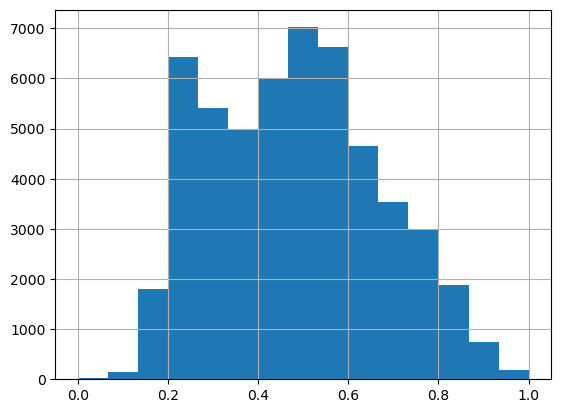

In [44]:
df_scaled["Zone 1 Power Consumption"].hist(bins=15)
plt.show()

The histogram for Zone 1 appears to be approximately symmetric with a slight skew to the left. This suggests that the power consumption data is fairly evenly distributed around the mean, with a slight tendency towards lower values. Also, the highest frequencies are around the 0.4 mark, indicating that this is the most common range for power consumption in this zone.



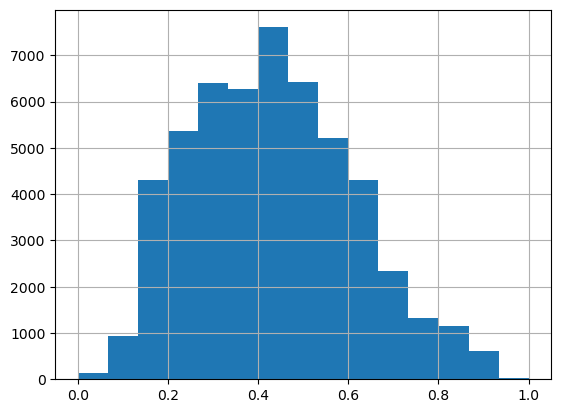

In [45]:
df_scaled["Zone 2  Power Consumption"].hist(bins=15)
plt.show()

The histogram for Zone 2 also appears approximately symmetric but with a more pronounced peak in the center. This indicates a more normal distribution of power consumption data.
Overall, It indicates a more concentrated distribution of power consumption around the mean, suggesting a typical usage pattern centered around 0.5 on the scaled range.

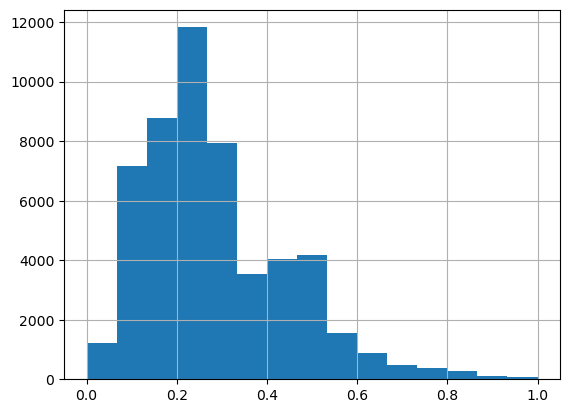

In [46]:
df_scaled["Zone 3  Power Consumption"].hist(bins=15)
plt.show()

 The histogram appears to be right-skewed. This means that most of the data points are concentrated on the left side, with fewer data points on the right side. It indicates that Zone 3 generally experiences lower power consumption values, with occasional higher consumption events.

### First Let's try fitting KNN on the fulll dataset:

In [47]:
#split into independent and target features
X_full = df_scaled.drop(['Zone 1 Power Consumption','Zone 2  Power Consumption', 'Zone 3  Power Consumption'], axis=1)
y_zone1_full = df_scaled['Zone 1 Power Consumption']
y_zone2_full = df_scaled['Zone 2  Power Consumption']
y_zone3_full = df_scaled['Zone 3  Power Consumption']
X_train_1_full, X_test_1_full, y_train_1_full, y_test_1_full = train_test_split(X_full, y_zone1_full, test_size=0.2, random_state=42)
X_train_2_full, X_test_2_full, y_train_2_full, y_test_2_full = train_test_split(X_full, y_zone2_full, test_size=0.2, random_state=42)
X_train_3_full, X_test_3_full, y_train_3_full, y_test_3_full = train_test_split(X_full, y_zone3_full, test_size=0.2, random_state=42)

The first step we undertook in each zone is to plot the MSE values to the different values of kneighbors, then fitting the model of each zone to the best parameter.

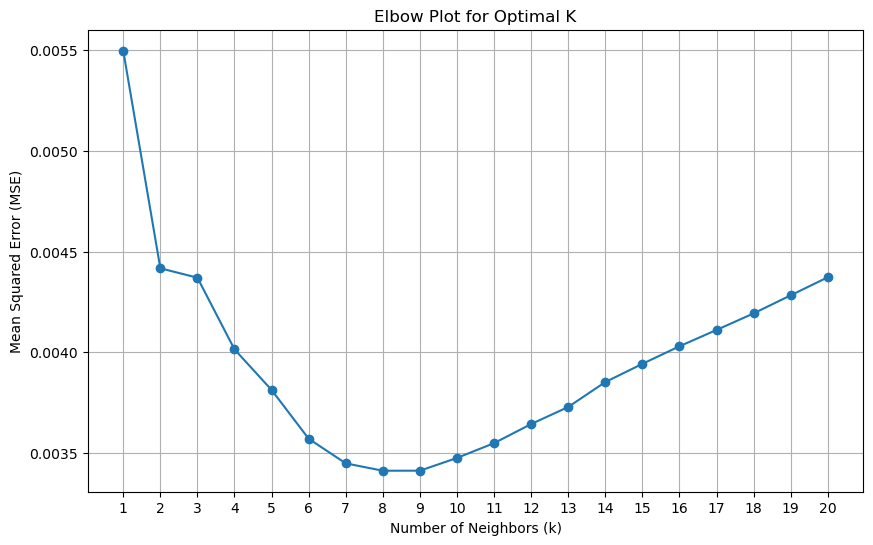

In [48]:


# Define a range of k values to test
k_values = range(1, 21)  # Test k from 1 to 20

# Initialize empty lists to store MSE values
mse_values = []

# Iterate over each value of k
for k in k_values:
    # Initialize and train the KNN model
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train_1_full, y_train_1_full)

    # Make predictions on the test set
    y_pred_1_full = knn_model.predict(X_test_1_full)

    # Calculate MSE and append to the list
    mse = mean_squared_error(y_test_1_full, y_pred_1_full)
    mse_values.append(mse)

# Plot the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(k_values, mse_values, marker='o', linestyle='-')
plt.title('Elbow Plot for Optimal K')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [49]:

# Initialize the KNN regressor with optimal value of K from the graph
k = 8
knn_model = KNeighborsRegressor(n_neighbors=k)

# Train the KNN model
knn_model.fit(X_train_1_full, y_train_1_full)

# Predict on the test set
y_pred_1_full = knn_model.predict(X_test_1_full)

# Evaluate the model using MSE and RMSE
mse = mean_squared_error(y_test_1_full, y_pred_1_full)
print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Calculate R2 score
r2score = r2_score(y_test_1_full, y_pred_1_full)

print("R2 Score:", r2score)

Mean Squared Error: 0.003411469208820661
Root Mean Squared Error: 0.058407783803365296
R2 Score: 0.9008498989424274


#### zone 2

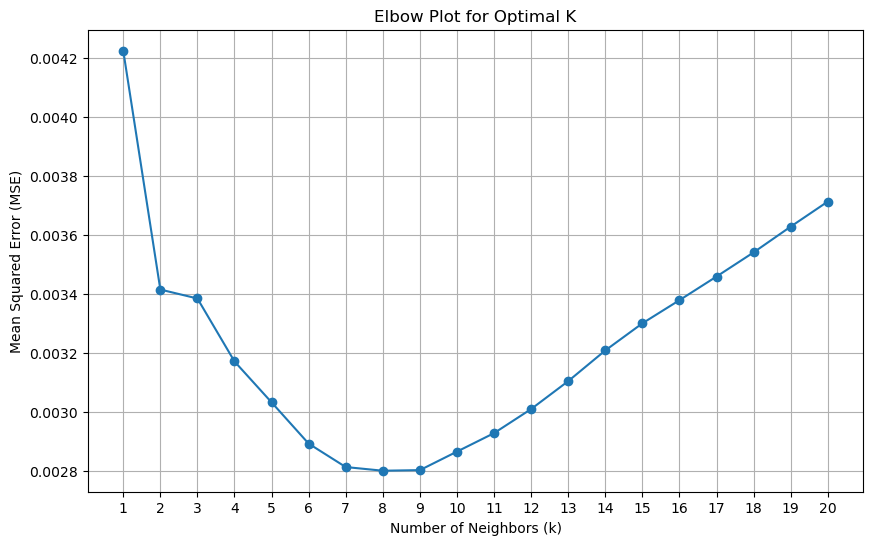

In [50]:

# Define a range of k values to test
k_values = range(1, 21)  # Test k from 1 to 20

# Initialize empty lists to store MSE values
mse_values = []

# Iterate over each value of k
for k in k_values:
    # Initialize and train the KNN model
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train_2_full, y_train_2_full)

    # Make predictions on the test set
    y_pred_2_full = knn_model.predict(X_test_2_full)

    # Calculate MSE and append to the list
    mse = mean_squared_error(y_test_2_full, y_pred_2_full)
    mse_values.append(mse)

# Plot the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(k_values, mse_values, marker='o', linestyle='-')
plt.title('Elbow Plot for Optimal K')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [51]:

# Initialize the KNN regressor with optimal value of K from the graph
k = 8
knn_model = KNeighborsRegressor(n_neighbors=k)

# Train the KNN model
knn_model.fit(X_train_2_full, y_train_2_full)

# Predict on the test set
y_pred_1_full = knn_model.predict(X_test_2_full)

# Evaluate the model using MSE and RMSE
mse = mean_squared_error(y_test_2_full, y_pred_2_full)
print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Calculate R2 score
r2score = r2_score(y_test_2_full, y_pred_2_full)

print("R2 Score:", r2score)

Mean Squared Error: 0.0037132357620717027
Root Mean Squared Error: 0.060936325472346155
R2 Score: 0.8854986921057997


#### zone 3:

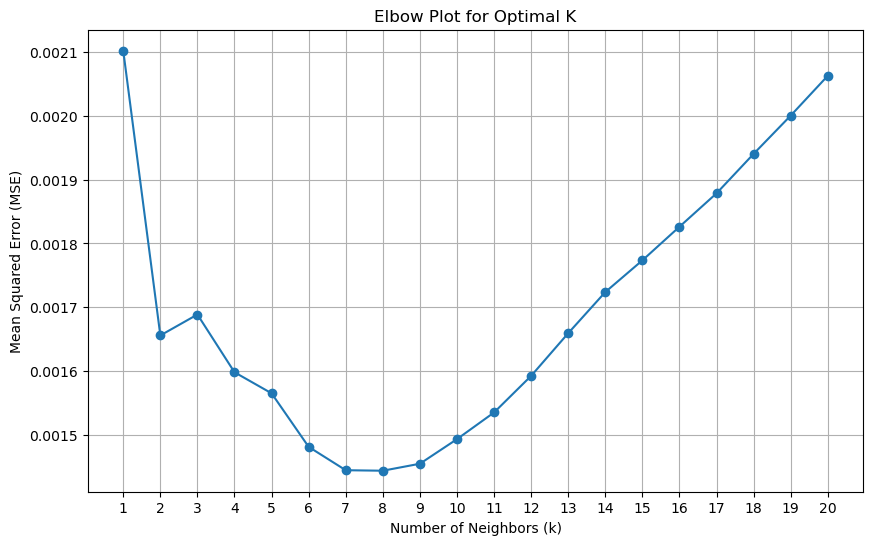

In [52]:

# Define a range of k values to test
k_values = range(1, 21)  # Test k from 1 to 20

# Initialize empty lists to store MSE values
mse_values = []

# Iterate over each value of k
for k in k_values:
    # Initialize and train the KNN model
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train_3_full, y_train_3_full)

    # Make predictions on the test set
    y_pred_3_full = knn_model.predict(X_test_3_full)

    # Calculate MSE and append to the list
    mse = mean_squared_error(y_test_3_full, y_pred_3_full)
    mse_values.append(mse)

# Plot the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(k_values, mse_values, marker='o', linestyle='-')
plt.title('Elbow Plot for Optimal K')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [53]:

# Initialize the KNN regressor with optimal value of K from the graph
k = 8
knn_model = KNeighborsRegressor(n_neighbors=k)

# Train the KNN model
knn_model.fit(X_train_3_full, y_train_3_full)

# Predict on the test set
y_pred_3_full = knn_model.predict(X_test_3_full)

# Evaluate the model using MSE and RMSE
mse = mean_squared_error(y_test_3_full, y_pred_3_full)
print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Calculate R2 score
r2score = r2_score(y_test_3_full, y_pred_3_full)

print("R2 Score:", r2score)

Mean Squared Error: 0.001444025328907709
Root Mean Squared Error: 0.03800033327363997
R2 Score: 0.9425159288904192


 The results we are able to see at this step are quite good, however, having employed feature engineering earlier and constated features having higher correlation with the target and more predictive of it, we shall proceed to try re-training the knn model with those selected features and see the difference from these results.

#### Note : the features selected to be the most predictive of the target differ from one zone to the other.

###  Fitting KNN on Selected  Descriptive Features

In [54]:
X = df_scaled[['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows','diffuse flows', 'Day', 'Hour', 'Day of Week', 'Day of Year']]
y = df_scaled['Zone 1 Power Consumption']

# Split the data into training and testing sets
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.2, random_state=42)


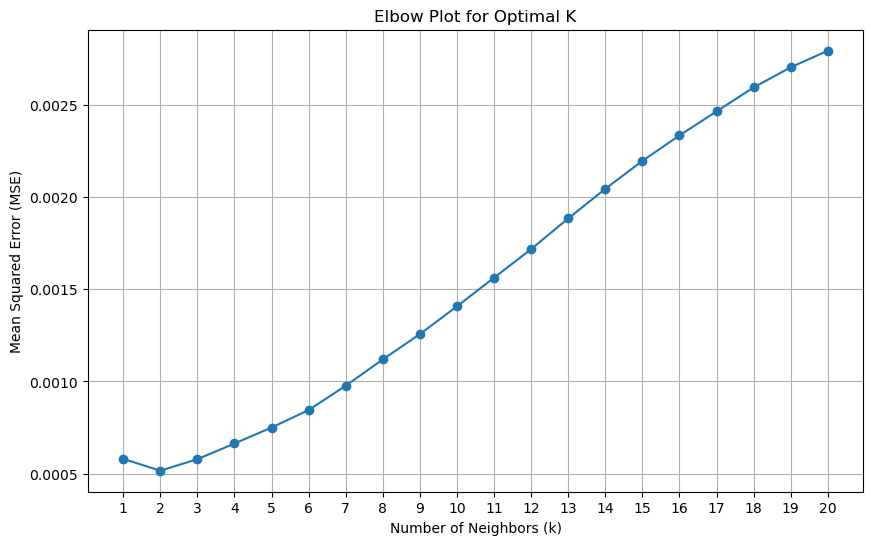

In [55]:

# Define a range of k values to test
k_values = range(1, 21)  # Test k from 1 to 20

# Initialize empty lists to store MSE values
mse_values = []

# Iterate over each value of k
for k in k_values:
    # Initialize and train the KNN model
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train_1, y_train_1)

    # Make predictions on the test set
    y_pred_1 = knn_model.predict(X_test_1)

    # Calculate MSE and append to the list
    mse = mean_squared_error(y_test_1, y_pred_1)
    mse_values.append(mse)

# Plot the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(k_values, mse_values, marker='o', linestyle='-')
plt.title('Elbow Plot for Optimal K')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(k_values)
plt.grid(True)
plt.show()


In [56]:

# Initialize the KNN regressor with optimal value of K from the graph
k = 2
knn_model = KNeighborsRegressor(n_neighbors=k)

# Train the KNN model
knn_model.fit(X_train_1, y_train_1)

# Predict on the test set
y_pred_1 = knn_model.predict(X_test_1)

# Evaluate the model using MSE and RMSE
mse = mean_squared_error(y_test_1, y_pred_1)
print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Calculate R2 score
r2score = r2_score(y_test_1, y_pred_1)

print("R2 Score:", r2score)

Mean Squared Error: 0.0005154943187836006
Root Mean Squared Error: 0.022704499967706855
R2 Score: 0.9850178000522926


In [57]:
#train r2score and test r2score
y_train_1_pred = knn_model.predict(X_train_1)
train_1_r2 = r2_score(y_train_1, y_train_1_pred)
print("R2 Score train:", train_1_r2)

print("R2 Score test:", r2score)

R2 Score train: 0.9957725149199539
R2 Score test: 0.9850178000522926


#### Zone 2 :

In [58]:
X = df_scaled[['Temperature', 'Humidity', 'general diffuse flows', 'diffuse flows', 'Day', 'Month', 'Hour', 'Day of Week', 'Day of Year']]
y = df_scaled['Zone 2  Power Consumption']

# Split the data into training and testing sets
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.2, random_state=42)

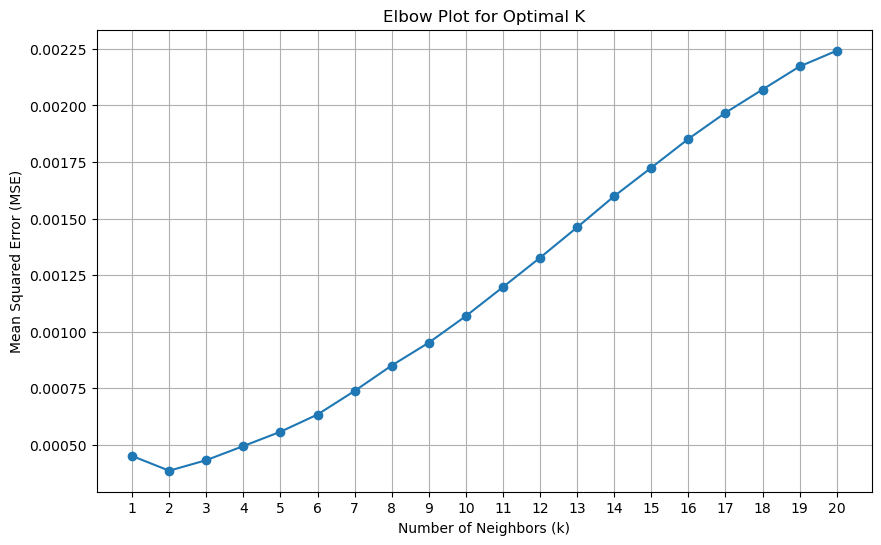

In [59]:

k_values = range(1, 21)  # Test k from 1 to 20

# Initialize empty lists to store MSE values
mse_values = []

# Iterate over each value of k
for k in k_values:
    # Initialize and train the KNN model
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train_2, y_train_2)

    # Make predictions on the test set
    y_pred_2 = knn_model.predict(X_test_2)

    # Calculate MSE and append to the list
    mse = mean_squared_error(y_test_2, y_pred_2)
    mse_values.append(mse)

# Plot the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(k_values, mse_values, marker='o', linestyle='-')
plt.title('Elbow Plot for Optimal K')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(k_values)
plt.grid(True)
plt.show()


In [60]:

# Initialize the KNN regressor with optimal value of K from the graph
k = 2
knn_model = KNeighborsRegressor(n_neighbors=k)

# Train the KNN model
knn_model.fit(X_train_2, y_train_2)

# Predict on the test set
y_pred_2 = knn_model.predict(X_test_2)

# Evaluate the model using MSE and RMSE
mse = mean_squared_error(y_test_2, y_pred_2)
print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)
r2score = r2_score(y_test_2, y_pred_2)

print("R2 Score:", r2score)

Mean Squared Error: 0.0003850723315967968
Root Mean Squared Error: 0.019623259963543183
R2 Score: 0.9881259127007053


In [61]:
#train r2score and test r2score
y_train_2_pred = knn_model.predict(X_train_2)
train_2_r2 = r2_score(y_train_2, y_train_2_pred)
print("R2 Score train:", train_2_r2)

print("R2 Score test:", r2score)

R2 Score train: 0.9966261921796109
R2 Score test: 0.9881259127007053


#### Zone 3 :

In [62]:
X = df_scaled[['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows','Day', 'Month', 'Hour', 'Quarter of Year', 'Day of Year']]
y = df_scaled['Zone 3  Power Consumption']
# Split the data into training and testing sets
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, y, test_size=0.2, random_state=42)

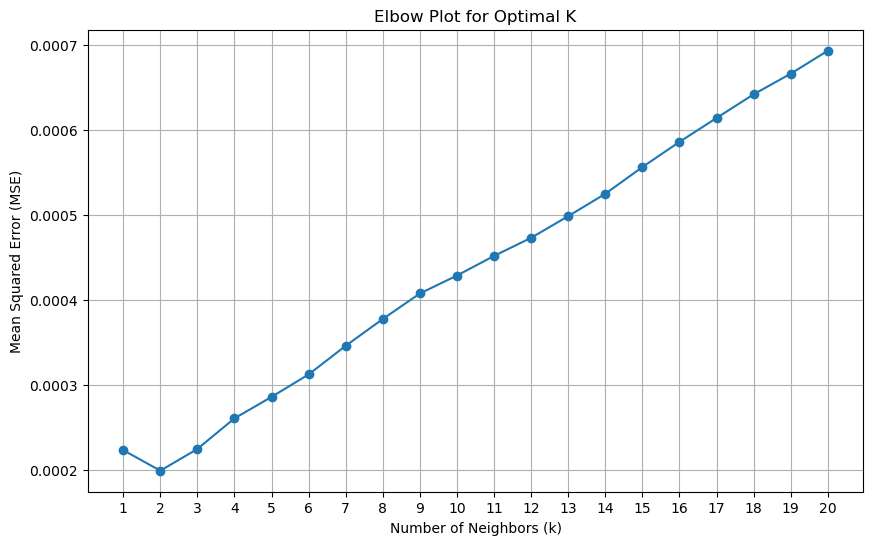

In [63]:

k_values = range(1, 21)  # Test k from 1 to 20

# Initialize empty lists to store MSE values
mse_values = []

# Iterate over each value of k
for k in k_values:
    # Initialize and train the KNN model
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train_3, y_train_3)

    # Make predictions on the test set
    y_pred_3 = knn_model.predict(X_test_3)

    # Calculate MSE and append to the list
    mse = mean_squared_error(y_test_3, y_pred_3)
    mse_values.append(mse)

# Plot the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(k_values, mse_values, marker='o', linestyle='-')
plt.title('Elbow Plot for Optimal K')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(k_values)
plt.grid(True)
plt.show()


In [64]:

# Initialize the KNN regressor with optimal value of K from the graph
k = 2
knn_model = KNeighborsRegressor(n_neighbors=k)

# Train the KNN model
knn_model.fit(X_train_3, y_train_3)

# Predict on the test set
y_pred_3 = knn_model.predict(X_test_3)

# Evaluate the model using MSE and RMSE
mse = mean_squared_error(y_test_3, y_pred_3)
print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)
r2score = r2_score(y_test_3, y_pred_3)

print("R2 Score:", r2score)

Mean Squared Error: 0.0001993606988523869
Root Mean Squared Error: 0.014119514823547829
R2 Score: 0.9920638063890784


In [65]:
#train r2score and test r2score
y_train_3_pred = knn_model.predict(X_train_3)
train_3_r2 = r2_score(y_train_3, y_train_3_pred)
print("R2 Score train:", train_3_r2)

print("R2 Score test:", r2score)

R2 Score train: 0.9978104328816325
R2 Score test: 0.9920638063890784


 We notice that for the three zones, an improvement in R2 score and reduction in loss, compared to training the knn model on the full dataset. We also notice the optimal number of neighbors getting reduced from 8 to 2, and as known, a model with less parameters can work better in most cases on the dataset.
 
So, the use of feature engineering was a crucial step to simplify the model and reduce the loss for the three zones.

Printing both train and test r2 score is useful to detect signs of overfitting, not the case in here.

### Weighted KNN with GridSearch

#### zone 1 :

In [66]:
param_grid = {'n_neighbors': range(1, 21), 'weights': ['uniform', 'distance']}

# Initialize the KNN regressor
knn_model = KNeighborsRegressor()

# Initialize GridSearchCV
grid_search_weighted = GridSearchCV(estimator=knn_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Perform grid search
grid_search_weighted.fit(X_train_1, y_train_1)

# Get the best hyperparameters
best_params_weighted = grid_search_weighted.best_params_
print("Best hyperparameters:", best_params_weighted)

# Get the best MSE score
best_mse_weighted = -grid_search_weighted.best_score_
print("Best Mean Squared Error:", best_mse_weighted)

# Get the best KNN model
best_knn_model_weighted = grid_search_weighted.best_estimator_

y_pred_weighted_1 = best_knn_model_weighted.predict(X_test_1)

r2score = r2_score(y_test_1, y_pred_weighted_1)
print("R2 Score test:", r2score)

y_pred_train_weighted_1 = best_knn_model_weighted.predict(X_train_1)
r2score_tr = r2_score(y_train_1, y_pred_train_weighted_1)
print("R2 Score train:", r2score_tr)

Best hyperparameters: {'n_neighbors': 2, 'weights': 'distance'}
Best Mean Squared Error: 0.0006045987738112392
R2 Score test: 0.9864281326129013
R2 Score train: 1.0


#### zone 2 :

In [67]:

# Define the range of k values to test
param_grid = {'n_neighbors': range(1, 21), 'weights': ['uniform', 'distance']}

# Initialize the KNN regressor
knn_model = KNeighborsRegressor()

# Initialize GridSearchCV
grid_search_weighted = GridSearchCV(estimator=knn_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Perform grid search
grid_search_weighted.fit(X_train_2, y_train_2)

# Get the best hyperparameters
best_params_weighted = grid_search_weighted.best_params_
print("Best hyperparameters:", best_params_weighted)

# Get the best MSE score
best_mse_weighted = -grid_search_weighted.best_score_
print("Best Mean Squared Error:", best_mse_weighted)

# Get the best KNN model
best_knn_model_weighted = grid_search_weighted.best_estimator_

y_pred_weighted_2 = best_knn_model_weighted.predict(X_test_2)


r2score = r2_score(y_test_2, y_pred_weighted_2)
print("R2 Score test:", r2score)

y_pred_train_weighted_2 = best_knn_model_weighted.predict(X_train_2)
r2score_tr = r2_score(y_train_2, y_pred_train_weighted_2)
print("R2 Score train:", r2score_tr)

Best hyperparameters: {'n_neighbors': 2, 'weights': 'distance'}
Best Mean Squared Error: 0.00044723745791042433
R2 Score test: 0.9891349942552096
R2 Score train: 1.0


#### Zone 3 :

In [68]:

# Define the range of k values to test
param_grid = {'n_neighbors': range(1, 21), 'weights': ['uniform', 'distance']}

# Initialize the KNN regressor
knn_model = KNeighborsRegressor()

# Initialize GridSearchCV
grid_search_weighted = GridSearchCV(estimator=knn_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Perform grid search
grid_search_weighted.fit(X_train_3, y_train_3)

# Get the best hyperparameters
best_params_weighted = grid_search_weighted.best_params_
print("Best hyperparameters:", best_params_weighted)

# Get the best MSE score
best_mse_weighted = -grid_search_weighted.best_score_
print("Best Mean Squared Error:", best_mse_weighted)

# Get the best KNN model
best_knn_model_weighted = grid_search_weighted.best_estimator_

y_pred_weighted_3 = best_knn_model_weighted.predict(X_test_3)

r2score = r2_score(y_test_3, y_pred_weighted_3)
print("R2 Score test:", r2score)

y_pred_train_weighted_3 = best_knn_model_weighted.predict(X_train_3)
r2score_tr = r2_score(y_train_3, y_pred_train_weighted_3)
print("R2 Score train:", r2score_tr)

Best hyperparameters: {'n_neighbors': 2, 'weights': 'distance'}
Best Mean Squared Error: 0.00023569624206246927
R2 Score test: 0.992850758240615
R2 Score train: 1.0


The results of applying Grid Search to check if weighted KNN will have a better performance on our data, show the same number of neighbors as Simple KNN but a preference for the weighted knn, knowing that the letter can offer several advantages over the standard KNN algorithm, potentially leading to improved performance in certain scenarios since neighbors closer to the query point have a higher influence on the prediction than those farther away.

### Further Tuning : Applying Bagging to the model

#### Zone 1

In [69]:

# initialized the regressor based on previously got best parameters with gridsearch
base_knn = KNeighborsRegressor(n_neighbors=2, weights='distance')

# Initializing the BaggingRegressor with the base KNN regressor
bagging_model = BaggingRegressor(base_estimator=base_knn, n_estimators=10, random_state=42)

# Fitting the BaggingRegressor on the training data
bagging_model.fit(X_train_1, y_train_1)

# Predict on the test set
y_pred_bagging_1 = bagging_model.predict(X_test_1)

# Evaluate the BaggingRegressor performance using Mean Squared Error
mse_bagging = mean_squared_error(y_test_1, y_pred_bagging_1)
print("Mean Squared Error with Bagging:", mse_bagging)


r2score = r2_score(y_test_1, y_pred_bagging_1)
print("R2 Score test:", r2score)

y_pred_train_bagging_1 = bagging_model.predict(X_train_1)
r2score_tr = r2_score(y_train_1, y_pred_train_bagging_1)
print("R2 Score train:", r2score_tr)

Mean Squared Error with Bagging: 0.0004950785862153016
R2 Score test: 0.985611157876563
R2 Score train: 0.9975263355757218


#### Zone 2

In [70]:

# initialized the regressor based on previously got best parameters with gridsearch
base_knn = KNeighborsRegressor(n_neighbors=2, weights='distance')

# Initializing the BaggingRegressor with the base KNN regressor
bagging_model = BaggingRegressor(base_estimator=base_knn, n_estimators=10, random_state=42)

# Fit the BaggingRegressor on the training data
bagging_model.fit(X_train_2, y_train_2)

# Predict on the test set
y_pred_bagging_2 = bagging_model.predict(X_test_2)

# Evaluate the BaggingRegressor performance using Mean Squared Error
mse_bagging = mean_squared_error(y_test_2, y_pred_bagging_2)
print("Mean Squared Error with Bagging:", mse_bagging)

r2score = r2_score(y_test_2, y_pred_bagging_2)
print("R2 Score test:", r2score)

y_pred_train_bagging_2 = bagging_model.predict(X_train_2)
r2score_tr = r2_score(y_train_2, y_pred_train_bagging_2)
print("R2 Score train:", r2score_tr)


Mean Squared Error with Bagging: 0.00037508842000026757
R2 Score test: 0.9884337765178589
R2 Score train: 0.9980095394585455


#### Zone 3

In [71]:

# initialized the regressor based on previously got best parameters with gridsearch
base_knn = KNeighborsRegressor(n_neighbors=2, weights='distance')

# Initialize the BaggingRegressor with the base KNN regressor
bagging_model = BaggingRegressor(base_estimator=base_knn, n_estimators=10, random_state=42)

# Fit the BaggingRegressor on the training data
bagging_model.fit(X_train_3, y_train_3)

# Predict on the test set
y_pred_bagging_3 = bagging_model.predict(X_test_3)

# Evaluate the BaggingRegressor performance using Mean Squared Error
mse_bagging = mean_squared_error(y_test_3, y_pred_bagging_3)
print("Mean Squared Error with Bagging:", mse_bagging)

r2score = r2_score(y_test_3, y_pred_bagging_3)
print("R2 Score test:", r2score)

y_pred_train_bagging_3 = bagging_model.predict(X_train_3)
r2score_tr = r2_score(y_train_3, y_pred_train_bagging_3)
print("R2 Score train:", r2score_tr)


Mean Squared Error with Bagging: 0.00019408157349835444
R2 Score test: 0.9922739589474668
R2 Score train: 0.9987018836464312


 Bagging results were close to the ones in the previous step, no major difference since the results are already good for these features of the dataset. Bagging was used because as known KNN can suffer from high variance, especially with small datasets. Bagging (Bootstrap Aggregating) helps by averaging the predictions of multiple KNN models, each trained on a different subset of the data. This reduces the variance and helps in producing a more stable model. It also buils robustness to noise and reduces overfitting.

 Due to no major difference and for model simplicity, we won't work with bagging along with KNN for this dataset in the rest of the modeling.

### Comparaison between weighted(without bagging) and non weighted Knn :

#### zone 1 :

Mean Squared Error (KNN): 0.0005154943187836006
Mean Squared Error (Weighted KNN): 0.0004669688402072308
Root Mean Squared Error (KNN): 0.022704499967706855
Root Mean Squared Error (Weighted KNN): 0.021609461821323336
R2 Score (KNN): 0.9850178000522926
R2 Score (Weighted KNN): 0.9864281326129013


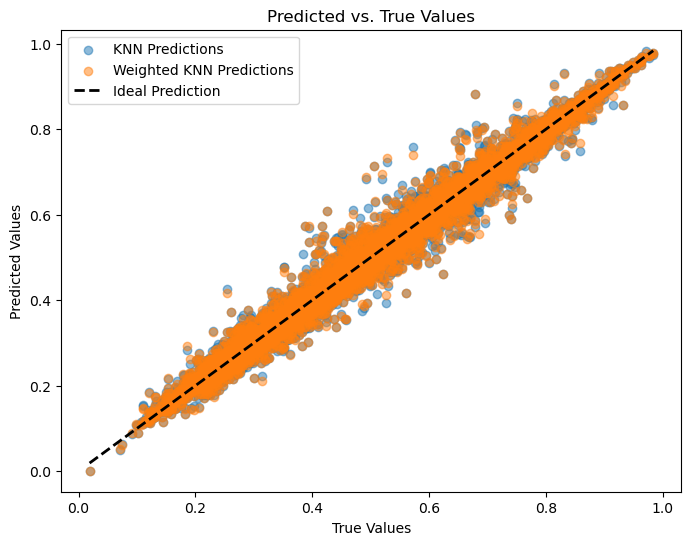

In [72]:

#  Mean Squared Error (MSE) for the standard KNN model
mse_knn = mean_squared_error(y_test_1, y_pred_1)
print("Mean Squared Error (KNN):", mse_knn)

#  Mean Squared Error (MSE) for the weighted KNN model
mse_weighted_knn = mean_squared_error(y_test_1, y_pred_weighted_1)
print("Mean Squared Error (Weighted KNN):", mse_weighted_knn)

#  Root Mean Squared Error (RMSE) for the standard KNN model
rmse_knn = np.sqrt(mse_knn)
print("Root Mean Squared Error (KNN):", rmse_knn)

# Root Mean Squared Error (RMSE) for the weighted KNN model
rmse_weighted_knn = np.sqrt(mse_weighted_knn)
print("Root Mean Squared Error (Weighted KNN):", rmse_weighted_knn)

r2score = r2_score(y_test_1,  y_pred_1)
print("R2 Score (KNN):", r2score)

r2score = r2_score(y_test_1, y_pred_weighted_1)
print("R2 Score (Weighted KNN):", r2score)

plt.figure(figsize=(8, 6))
plt.scatter(y_test_1, y_pred_1, label='KNN Predictions', alpha=0.5)
plt.scatter(y_test_1, y_pred_weighted_1, label='Weighted KNN Predictions', alpha=0.5)
plt.plot([y_test_1.min(), y_test_1.max()], [y_test_1.min(), y_test_1.max()], 'k--', lw=2, label='Ideal Prediction')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. True Values')
plt.legend()
plt.show()


#### zone 2 :

Mean Squared Error (KNN): 0.0003850723315967968
Mean Squared Error (Weighted KNN): 0.00035234818386484023
Root Mean Squared Error (KNN): 0.019623259963543183
Root Mean Squared Error (Weighted KNN): 0.018770939876970472
R2 Score (KNN): 0.9881259127007053
R2 Score (Weighted KNN): 0.9891349942552096


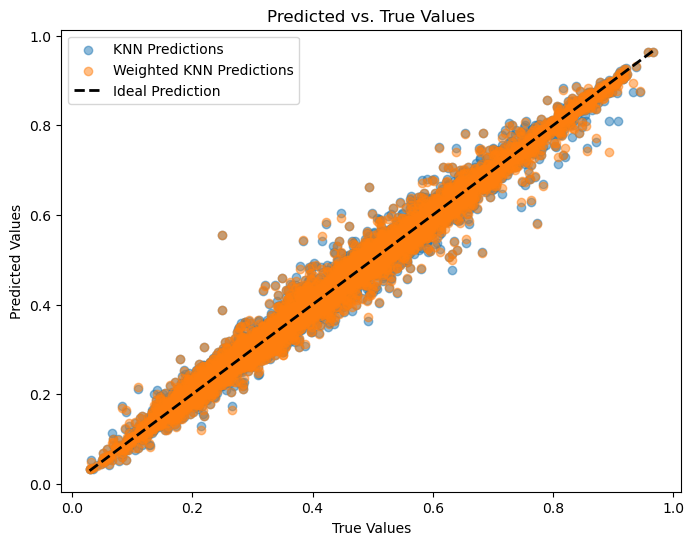

In [73]:

#  Mean Squared Error (MSE) for the standard KNN model
mse_knn = mean_squared_error(y_test_2, y_pred_2)
print("Mean Squared Error (KNN):", mse_knn)

#  Mean Squared Error (MSE) for the weighted KNN model
mse_weighted_knn = mean_squared_error(y_test_2, y_pred_weighted_2)
print("Mean Squared Error (Weighted KNN):", mse_weighted_knn)

#  Root Mean Squared Error (RMSE) for the standard KNN model
rmse_knn = np.sqrt(mse_knn)
print("Root Mean Squared Error (KNN):", rmse_knn)

#  Root Mean Squared Error (RMSE) for the weighted KNN model
rmse_weighted_knn = np.sqrt(mse_weighted_knn)
print("Root Mean Squared Error (Weighted KNN):", rmse_weighted_knn)

r2score = r2_score(y_test_2, y_pred_2)
print("R2 Score (KNN):", r2score)

r2score = r2_score(y_test_2, y_pred_weighted_2)
print("R2 Score (Weighted KNN):", r2score)

plt.figure(figsize=(8, 6))
plt.scatter(y_test_2, y_pred_2, label='KNN Predictions', alpha=0.5)
plt.scatter(y_test_2, y_pred_weighted_2, label='Weighted KNN Predictions', alpha=0.5)
plt.plot([y_test_2.min(), y_test_2.max()], [y_test_2.min(), y_test_2.max()], 'k--', lw=2, label='Ideal Prediction')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. True Values')
plt.legend()
plt.show()


#### zone 3 :

Mean Squared Error (KNN): 0.0001993606988523869
Mean Squared Error (Weighted KNN): 0.00017959211976056674
Root Mean Squared Error (KNN): 0.014119514823547829
Root Mean Squared Error (Weighted KNN): 0.013401198444936436
R2 Score (KNN): 0.9920638063890784
 R2 Score (Weighted KNN): 0.992850758240615


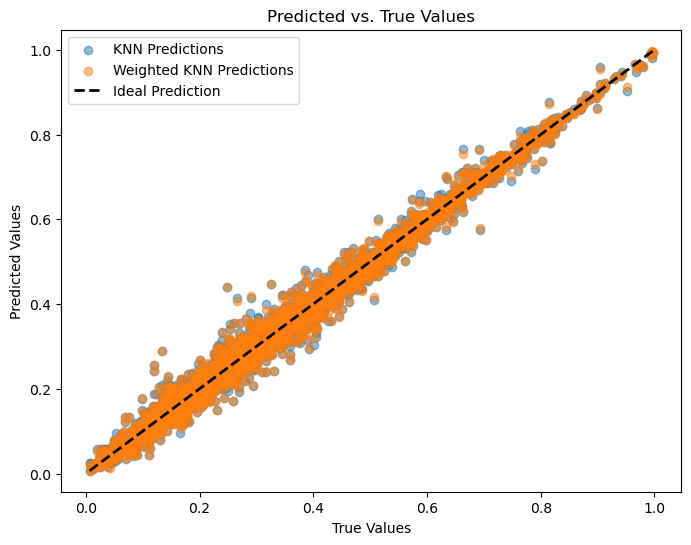

In [74]:


#  Mean Squared Error (MSE) for the standard KNN model
mse_knn = mean_squared_error(y_test_3, y_pred_3)
print("Mean Squared Error (KNN):", mse_knn)

#  Mean Squared Error (MSE) for the weighted KNN model
mse_weighted_knn = mean_squared_error(y_test_3, y_pred_weighted_3)
print("Mean Squared Error (Weighted KNN):", mse_weighted_knn)

#  Root Mean Squared Error (RMSE) for the standard KNN model
rmse_knn = np.sqrt(mse_knn)
print("Root Mean Squared Error (KNN):", rmse_knn)

#  Root Mean Squared Error (RMSE) for the weighted KNN model
rmse_weighted_knn = np.sqrt(mse_weighted_knn)
print("Root Mean Squared Error (Weighted KNN):", rmse_weighted_knn)


r2score = r2_score(y_test_3, y_pred_3)
print("R2 Score (KNN):", r2score)

r2score = r2_score(y_test_3, y_pred_weighted_3)
print(" R2 Score (Weighted KNN):", r2score)

plt.figure(figsize=(8, 6))
plt.scatter(y_test_3, y_pred_3, label='KNN Predictions', alpha=0.5)
plt.scatter(y_test_3, y_pred_weighted_3, label='Weighted KNN Predictions', alpha=0.5)
plt.plot([y_test_3.min(), y_test_3.max()], [y_test_3.min(), y_test_3.max()], 'k--', lw=2, label='Ideal Prediction')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. True Values')
plt.legend()
plt.show()


The results above highlights a diferrence only strating from 10 ^-4 digits, which is slight but might be important in a bigger dataset, so the weighted knn with euclidean(default) distance is the chosen up to this step.

### Further Tuning : Trying different distance metrics

To make the process faster, we will apply Grid Search Again, extending the parameters to include p; whcih precise the power of MinKowski distance, changing the distance used each time. 'Default is p=2 for euclidean'.

#### zone 1 :

In [75]:
# here we will control the distance via the parameter p, which is the power of the Minkowski distance
param_grid = {'n_neighbors': [2, 3, 4, 5], 'weights': ['uniform', 'distance'], 'p': [1, 2, 3, 4]}
# Initialize the KNN regressor
knn = KNeighborsRegressor()

# Perform grid search to find the best parameters
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_1, y_train_1)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Predict on the test set using the best estimator
y_pred_tuned_1 = best_estimator.predict(X_test_1)

# Evaluate the performance of the tuned model
mse_tuned = mean_squared_error(y_test_1, y_pred_tuned_1)
rmse_weighted_knn_zone_1 = np.sqrt(mse_tuned)
print("Mean Squared Error (Tuned):", mse_tuned)
print("Root Mean Squared Error (Tuned):", rmse_weighted_knn_zone_1)

knn_r2_test_zone1 = r2_score(y_test_1, y_pred_tuned_1)
print("R2 Score test:", knn_r2_test_zone1)
#train r2 score
y_pred_train_tuned_1 = best_estimator.predict(X_train_1)
r2score_tr = r2_score(y_train_1, y_pred_train_tuned_1)
print("R2 Score train:", r2score_tr)

Best Parameters: {'n_neighbors': 2, 'p': 1, 'weights': 'distance'}
Mean Squared Error (Tuned): 0.0004399867931345085
Root Mean Squared Error (Tuned): 0.020975862154736537
R2 Score test: 0.9872123321850632
R2 Score train: 1.0


#### zone 2 :

In [76]:
# here we will control the distance via the parameter p, which is the power of the Minkowski distance
param_grid = {'n_neighbors': [2, 3, 4], 'weights': ['uniform', 'distance'], 'p': [1, 2, 3, 4]}
# Initialize the KNN regressor
knn = KNeighborsRegressor()

# Perform grid search to find the best parameters
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_2, y_train_2)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Predict on the test set using the best estimator
y_pred_tuned_2 = best_estimator.predict(X_test_2)

# Evaluate the performance of the tuned model
mse_tuned = mean_squared_error(y_test_2, y_pred_tuned_2)
rmse_weighted_knn_zone_2 = np.sqrt(mse_tuned)
print("Mean Squared Error (Tuned):", mse_tuned)
print("Root Mean Squared Error (Tuned):", rmse_weighted_knn_zone_2)

knn_r2_test_zone2 = r2_score(y_test_2, y_pred_tuned_2)
print("R2 Score test:", knn_r2_test_zone2)
#train r2 score
y_pred_train_tuned_2 = best_estimator.predict(X_train_2)
r2score_tr = r2_score(y_train_2, y_pred_train_tuned_2)
print("R2 Score train:", r2score_tr)


Best Parameters: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Mean Squared Error (Tuned): 0.0003367025638900007
Root Mean Squared Error (Tuned): 0.018349456773703157
R2 Score test: 0.9896174424660754
R2 Score train: 1.0


#### zone 3 :

In [77]:
# here we will control the distance via the parameter p, which is the power of the Minkowski distance
param_grid = {'n_neighbors': [2, 3, 4], 'weights': ['uniform', 'distance'], 'p': [1, 2, 3, 4]}
# Initialize the KNN regressor
knn = KNeighborsRegressor()

# Perform grid search to find the best parameters
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_3, y_train_3)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Predict on the test set using the best estimator
y_pred_tuned_3 = best_estimator.predict(X_test_3)

# Evaluate the performance of the tuned model
mse_tuned = mean_squared_error(y_test_3, y_pred_tuned_3)
rmse_weighted_knn_zone_3 = np.sqrt(mse_tuned)
print("Mean Squared Error (Tuned):", mse_tuned)
print("Root Mean Squared Error (Tuned):", rmse_weighted_knn_zone_3)

knn_r2_test_zone3 = r2_score(y_test_3, y_pred_tuned_3)
print("R2 Score test:", knn_r2_test_zone3)
#train r2 score
y_pred_train_tuned_3 = best_estimator.predict(X_train_3)
r2score_tr = r2_score(y_train_3, y_pred_train_tuned_3)
print("R2 Score train:", r2score_tr)


Best Parameters: {'n_neighbors': 2, 'p': 1, 'weights': 'distance'}
Mean Squared Error (Tuned): 0.000168609403529452
Root Mean Squared Error (Tuned): 0.01298496836844249
R2 Score test: 0.9932879605722965
R2 Score train: 1.0



The output is indicating the same number of neighbors as before except for zone 2, in which we got 3 neighbors, weighted knn is still preferred as well. As a new information, since p=1 in best parameters, the optimal distance metric is the Manhattan distance.

**Manhattan distance showed even slight imprvement in loss and r2 score**

### Comparaison between weighted Knn(euclidian distance) and weighted Knn(manhattan distance  :

#### zone 1 :

Mean Squared Error (weighted KNN 'euclidean'): 0.0004669688402072308
Mean Squared Error (weighted KNN 'manhattan'): 0.0004399867931345085
Root Mean Squared Error (weighted KNN 'euclidean'): 0.021609461821323336
Root Mean Squared Error (weighted KNN 'manhattan'): 0.020975862154736537
 R2 Score (weighted KNN 'euclidean) : 0.9864281326129013
 R2 Score (weighted KNN 'manhattan') : 0.9872123321850632


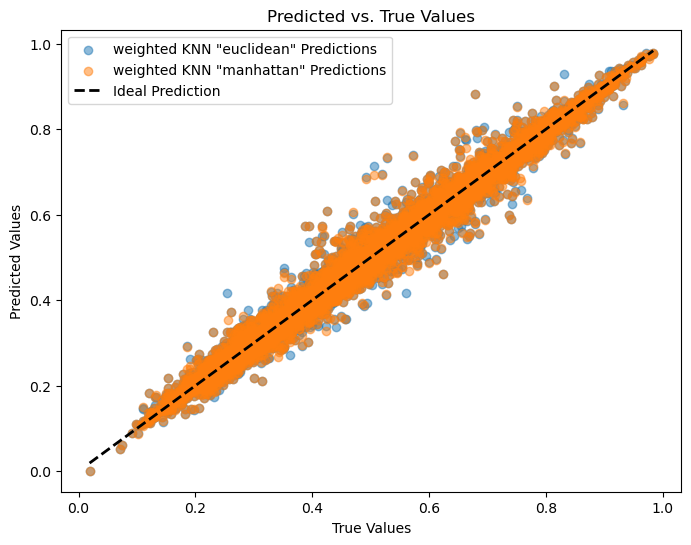

In [78]:
# Mean Squared Error (MSE) for the weighted KNN model and using euclidean distance as metric
mse_knn = mean_squared_error(y_test_1,  y_pred_weighted_1)
print("Mean Squared Error (weighted KNN 'euclidean'):", mse_knn)

#  Mean Squared Error (MSE) for the weighted KNN model
mse_weighted_knn = mean_squared_error(y_test_1,y_pred_tuned_1)
print("Mean Squared Error (weighted KNN 'manhattan'):", mse_weighted_knn)

#  Root Mean Squared Error (RMSE) for the standard KNN model
rmse_knn = np.sqrt(mse_knn)
print("Root Mean Squared Error (weighted KNN 'euclidean'):", rmse_knn)

#  Root Mean Squared Error (RMSE) for the weighted KNN model
rmse_weighted_knn = np.sqrt(mse_weighted_knn)
print("Root Mean Squared Error (weighted KNN 'manhattan'):", rmse_weighted_knn)

r2score = r2_score(y_test_1,  y_pred_weighted_1)
print(" R2 Score (weighted KNN 'euclidean) :", r2score)

r2score = r2_score(y_test_1, y_pred_tuned_1 )
print(" R2 Score (weighted KNN 'manhattan') :", r2score)

plt.figure(figsize=(8, 6))
plt.scatter(y_test_1, y_pred_weighted_1, label='weighted KNN "euclidean" Predictions', alpha=0.5)
plt.scatter(y_test_1, y_pred_tuned_1, label='weighted KNN "manhattan" Predictions', alpha=0.5)
plt.plot([y_test_1.min(), y_test_1.max()], [y_test_1.min(), y_test_1.max()], 'k--', lw=2, label='Ideal Prediction')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. True Values')
plt.legend()
plt.show()


#### zone 2 :

Mean Squared Error (weighted KNN 'euclidean'): 0.00035234818386484023
Mean Squared Error (weighted KNN 'manhattan'): 0.0003367025638900007
Root Mean Squared Error (weighted KNN 'euclidean'): 0.018770939876970472
Root Mean Squared Error (weighted KNN 'manhattan'): 0.018349456773703157
 R2 Score (weighted KNN 'euclidean'): 0.9891349942552096
 R2 Score (weighted KNN 'manhattan'): 0.9896174424660754


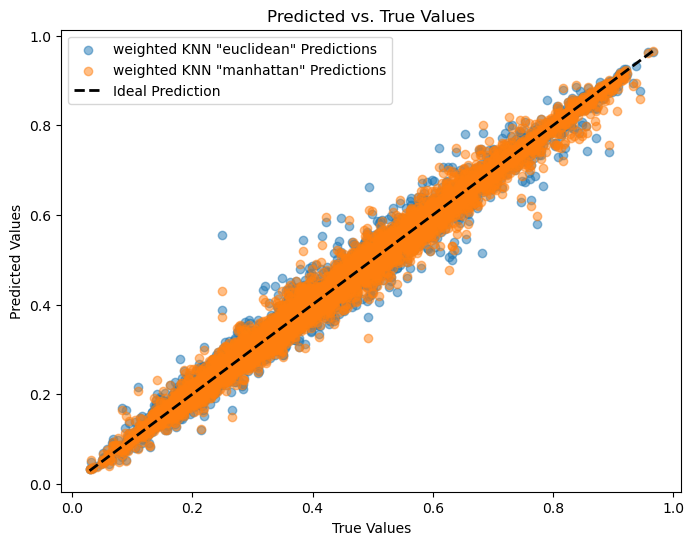

In [79]:

# Mean Squared Error (MSE) for the weighted KNN model and using euclidean distance as metric
mse_knn = mean_squared_error(y_test_2,  y_pred_weighted_2)
print("Mean Squared Error (weighted KNN 'euclidean'):", mse_knn)

#  Mean Squared Error (MSE) for the weighted KNN model
mse_weighted_knn = mean_squared_error(y_test_2, y_pred_tuned_2)#this si from weighted knn with bagging
print("Mean Squared Error (weighted KNN 'manhattan'):", mse_weighted_knn)

#  Root Mean Squared Error (RMSE) for the standard KNN model
rmse_knn = np.sqrt(mse_knn)
print("Root Mean Squared Error (weighted KNN 'euclidean'):", rmse_knn)

#  Root Mean Squared Error (RMSE) for the weighted KNN model
rmse_weighted_knn = np.sqrt(mse_weighted_knn)
print("Root Mean Squared Error (weighted KNN 'manhattan'):", rmse_weighted_knn)

r2score = r2_score(y_test_2,  y_pred_weighted_2)
print(" R2 Score (weighted KNN 'euclidean'):", r2score)

r2score = r2_score(y_test_2, y_pred_tuned_2 )
print(" R2 Score (weighted KNN 'manhattan'):", r2score)


plt.figure(figsize=(8, 6))
plt.scatter(y_test_2, y_pred_weighted_2, label='weighted KNN "euclidean" Predictions', alpha=0.5)
plt.scatter(y_test_2, y_pred_tuned_2, label='weighted KNN "manhattan" Predictions', alpha=0.5)
plt.plot([y_test_2.min(), y_test_2.max()], [y_test_2.min(), y_test_2.max()], 'k--', lw=2, label='Ideal Prediction')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. True Values')
plt.legend()
plt.show()


#### zone 3 :

Mean Squared Error (weighted KNN 'euclidean'): 0.00017959211976056674
Mean Squared Error (weighted KNN 'manhattan'): 0.000168609403529452
Root Mean Squared Error (weighted KNN 'euclidean'): 0.013401198444936436
Root Mean Squared Error (weighted KNN 'manhattan'): 0.01298496836844249
 R2 Score (weighted KNN 'euclidean'): 0.992850758240615
 R2 Score: (weighted KNN 'manhattan') 0.9932879605722965


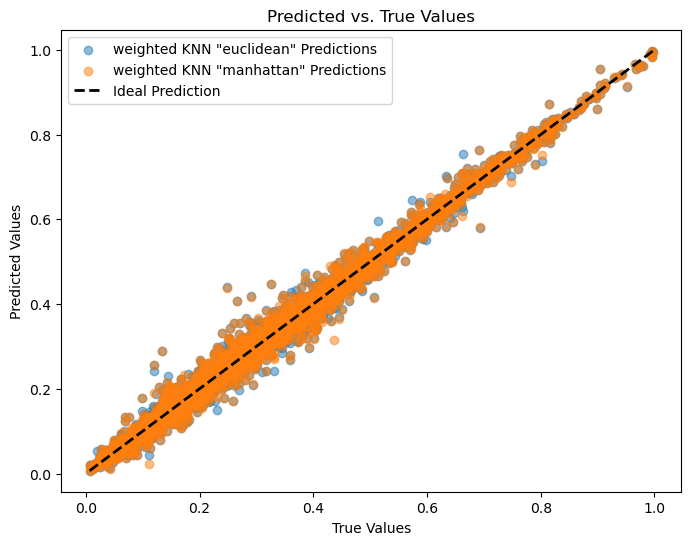

In [80]:
# Mean Squared Error (MSE) for the weighted KNN model and using euclidean distance as metric
mse_knn = mean_squared_error(y_test_3,  y_pred_weighted_3)
print("Mean Squared Error (weighted KNN 'euclidean'):", mse_knn)

#  Mean Squared Error (MSE) for the weighted KNN model
mse_weighted_knn = mean_squared_error(y_test_3,y_pred_tuned_3)#this si from weighted knn with bagging
print("Mean Squared Error (weighted KNN 'manhattan'):", mse_weighted_knn)

#  Root Mean Squared Error (RMSE) for the standard KNN model
rmse_knn = np.sqrt(mse_knn)
print("Root Mean Squared Error (weighted KNN 'euclidean'):", rmse_knn)

#  Root Mean Squared Error (RMSE) for the weighted KNN model
rmse_weighted_knn = np.sqrt(mse_weighted_knn)
print("Root Mean Squared Error (weighted KNN 'manhattan'):", rmse_weighted_knn)

r2score = r2_score(y_test_3,  y_pred_weighted_3)
print(" R2 Score (weighted KNN 'euclidean'):", r2score)

r2score = r2_score(y_test_3, y_pred_tuned_3 )
print(" R2 Score: (weighted KNN 'manhattan')", r2score)

plt.figure(figsize=(8, 6))
plt.scatter(y_test_3, y_pred_weighted_3, label='weighted KNN "euclidean" Predictions', alpha=0.5)
plt.scatter(y_test_3, y_pred_tuned_3, label='weighted KNN "manhattan" Predictions', alpha=0.5)
plt.plot([y_test_3.min(), y_test_3.max()], [y_test_3.min(), y_test_3.max()], 'k--', lw=2, label='Ideal Prediction')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. True Values')
plt.legend()
plt.show()


 **Final Result of KNN training : The best model that works on this data set is a model appllied on feautures chosen after feature selection, The variation is a "weighted Knn with Manhattan distance" and the number of neighbors is 2, 3, 2, for zones 1, 2, 3 respectivelly.**

As mentionned before, these results differences are small in each tuning, yet for a bigger dataset these improvements could contribute great to the performance.

## *Support Vector Machine*

We will use the SVR library in this case to deal with the task of regression that we have:

### **Zone 1**

Here, we experiment first with the differnt possibilities we have for the kernel. We found that 'rbf' (Radial Basis Function) worked best in our case here:

In [81]:
svm_zone1 = SVR(kernel='rbf')

svm_zone1.fit(X_train_zone1, y_train_zone1)

y_train_pred_svm_zone1 = svm_zone1.predict(X_train_zone1)
y_test_pred_svm_zone1 = svm_zone1.predict(X_test_zone1)

mse_train_svm_zone1 = mean_squared_error(y_train_zone1, y_train_pred_svm_zone1)
rmse_train_svm_zone1 = np.sqrt(mse_train_svm_zone1)
r2_train_svm_zone1 = r2_score(y_train_zone1, y_train_pred_svm_zone1)

mse_test_svm_zone1 = mean_squared_error(y_test_zone1, y_test_pred_svm_zone1)
rmse_test_svm_zone1 = np.sqrt(mse_test_svm_zone1)
r2_test_svm_zone1 = r2_score(y_test_zone1, y_test_pred_svm_zone1)

print("Train Set Metrics for Zone 1 with SVM (RBF kernel):")
print("MSE:", mse_train_svm_zone1)
print("RMSE:", rmse_train_svm_zone1)
print("R-squared:", r2_train_svm_zone1)

print("\nTest Set Metrics for Zone 1 with SVM (RBF kernel):")
print("MSE:", mse_test_svm_zone1)
print("RMSE:", rmse_test_svm_zone1)
print("R-squared:", r2_test_svm_zone1)


Train Set Metrics for Zone 1 with SVM (RBF kernel):
MSE: 0.0039730327775182464
RMSE: 0.0630319980447887
R-squared: 0.8855175605192251

Test Set Metrics for Zone 1 with SVM (RBF kernel):
MSE: 0.003870526046161155
RMSE: 0.06221355194940372
R-squared: 0.8875079840584251


Now, to improve the performance further, we try different values for the parameter gamma (since it is the one related to the kernel rbf), until we find the value that improves the performance best. Here we found gamma=1.5

In [82]:
svm_zone1 = SVR(kernel='rbf', gamma=1.5)

svm_zone1.fit(X_train_zone1, y_train_zone1)

y_train_pred_svm_zone1 = svm_zone1.predict(X_train_zone1)
y_test_pred_svm_zone1 = svm_zone1.predict(X_test_zone1)

mse_train_svm_zone1 = mean_squared_error(y_train_zone1, y_train_pred_svm_zone1)
rmse_train_svm_zone1 = np.sqrt(mse_train_svm_zone1)
r2_train_svm_zone1 = r2_score(y_train_zone1, y_train_pred_svm_zone1)

mse_test_svm_zone1 = mean_squared_error(y_test_zone1, y_test_pred_svm_zone1)
rmse_test_svm_zone1 = np.sqrt(mse_test_svm_zone1)
r2_test_svm_zone1 = r2_score(y_test_zone1, y_test_pred_svm_zone1)

print("Train Set Metrics for Zone 1 with SVM (RBF kernel):")
print("MSE:", mse_train_svm_zone1)
print("RMSE:", rmse_train_svm_zone1)
print("R-squared:", r2_train_svm_zone1)

print("\nTest Set Metrics for Zone 1 with SVM (RBF kernel):")
print("MSE:", mse_test_svm_zone1)
print("RMSE:", rmse_test_svm_zone1)
print("R-squared:", r2_test_svm_zone1)


Train Set Metrics for Zone 1 with SVM (RBF kernel):
MSE: 0.0033888442792109645
RMSE: 0.05821378083590658
R-squared: 0.902350878578233

Test Set Metrics for Zone 1 with SVM (RBF kernel):
MSE: 0.0033730176253710447
RMSE: 0.058077686122736026
R-squared: 0.901967446295631


### **Zone 2**

We treat zone 2 the same way we treated the previous zone.

In [83]:
# Initialize SVR with the RBF kernel
svm_zone2 = SVR(kernel='rbf')

# Train the SVR model on the training data for Zone 2
svm_zone2.fit(X_train_zone2, y_train_zone2)

# Use the trained model to predict on the train and test sets for Zone 2
y_train_pred_svm_zone2 = svm_zone2.predict(X_train_zone2)
y_test_pred_svm_zone2 = svm_zone2.predict(X_test_zone2)

# Calculate the metrics for the train set
mse_train_svm_zone2 = mean_squared_error(y_train_zone2, y_train_pred_svm_zone2)
rmse_train_svm_zone2 = np.sqrt(mse_train_svm_zone2)
r2_train_svm_zone2 = r2_score(y_train_zone2, y_train_pred_svm_zone2)

# Calculate the metrics for the test set
mse_test_svm_zone2 = mean_squared_error(y_test_zone2, y_test_pred_svm_zone2)
rmse_test_svm_zone2 = np.sqrt(mse_test_svm_zone2)
r2_test_svm_zone2 = r2_score(y_test_zone2, y_test_pred_svm_zone2)

# Print the evaluation metrics
print("Train Set Metrics for Zone 2 with SVM (RBF kernel):")
print("MSE:", mse_train_svm_zone2)
print("RMSE:", rmse_train_svm_zone2)
print("R-squared:", r2_train_svm_zone2)

print("\nTest Set Metrics for Zone 2 with SVM (RBF kernel):")
print("MSE:", mse_test_svm_zone2)
print("RMSE:", rmse_test_svm_zone2)
print("R-squared:", r2_test_svm_zone2)

Train Set Metrics for Zone 2 with SVM (RBF kernel):
MSE: 0.0035899550979298107
RMSE: 0.05991623400990595
R-squared: 0.8896313162726346

Test Set Metrics for Zone 2 with SVM (RBF kernel):
MSE: 0.0035902549288520805
RMSE: 0.05991873604184321
R-squared: 0.8892909280832181


In [84]:
# Initialize SVR with the RBF kernel
svm_zone2 = SVR(kernel='rbf', gamma=1.9)

# Train the SVR model on the training data for Zone 2
svm_zone2.fit(X_train_zone2, y_train_zone2)

# Use the trained model to predict on the train and test sets for Zone 2
y_train_pred_svm_zone2 = svm_zone2.predict(X_train_zone2)
y_test_pred_svm_zone2 = svm_zone2.predict(X_test_zone2)

# Calculate the metrics for the train set
mse_train_svm_zone2 = mean_squared_error(y_train_zone2, y_train_pred_svm_zone2)
rmse_train_svm_zone2 = np.sqrt(mse_train_svm_zone2)
r2_train_svm_zone2 = r2_score(y_train_zone2, y_train_pred_svm_zone2)

# Calculate the metrics for the test set
mse_test_svm_zone2 = mean_squared_error(y_test_zone2, y_test_pred_svm_zone2)
rmse_test_svm_zone2 = np.sqrt(mse_test_svm_zone2)
r2_test_svm_zone2 = r2_score(y_test_zone2, y_test_pred_svm_zone2)

# Print the evaluation metrics
print("Train Set Metrics for Zone 2 with SVM (RBF kernel):")
print("MSE:", mse_train_svm_zone2)
print("RMSE:", rmse_train_svm_zone2)
print("R-squared:", r2_train_svm_zone2)

print("\nTest Set Metrics for Zone 2 with SVM (RBF kernel):")
print("MSE:", mse_test_svm_zone2)
print("RMSE:", rmse_test_svm_zone2)
print("R-squared:", r2_test_svm_zone2)

Train Set Metrics for Zone 2 with SVM (RBF kernel):
MSE: 0.003006991020369471
RMSE: 0.05483603760639048
R-squared: 0.9075538184058161

Test Set Metrics for Zone 2 with SVM (RBF kernel):
MSE: 0.0030565673689415787
RMSE: 0.05528623127815441
R-squared: 0.9057477133594978


### **Zone 3**

We treat zone 3 the same way we treated the previous zone.

In [85]:
# Initialize SVR with the RBF kernel
svm_zone3 = SVR(kernel='rbf')

# Train the SVR model on the training data for Zone 3
svm_zone3.fit(X_train_zone3, y_train_zone3)

# Use the trained model to predict on the train and test sets for Zone 3
y_train_pred_svm_zone3 = svm_zone3.predict(X_train_zone3)
y_test_pred_svm_zone3 = svm_zone3.predict(X_test_zone3)

# Calculate the metrics for the train set
mse_train_svm_zone3 = mean_squared_error(y_train_zone3, y_train_pred_svm_zone3)
rmse_train_svm_zone3 = np.sqrt(mse_train_svm_zone3)
r2_train_svm_zone3 = r2_score(y_train_zone3, y_train_pred_svm_zone3)

# Calculate the metrics for the test set
mse_test_svm_zone3 = mean_squared_error(y_test_zone3, y_test_pred_svm_zone3)
rmse_test_svm_zone3 = np.sqrt(mse_test_svm_zone3)
r2_test_svm_zone3 = r2_score(y_test_zone3, y_test_pred_svm_zone3)

# Print the evaluation metrics
print("Train Set Metrics for Zone 3 with SVM (RBF kernel):")
print("MSE:", mse_train_svm_zone3)
print("RMSE:", rmse_train_svm_zone3)
print("R-squared:", r2_train_svm_zone3)

print("\nTest Set Metrics for Zone 3 with SVM (RBF kernel):")
print("MSE:", mse_test_svm_zone3)
print("RMSE:", rmse_test_svm_zone3)
print("R-squared:", r2_test_svm_zone3)


Train Set Metrics for Zone 3 with SVM (RBF kernel):
MSE: 0.0028656629636556624
RMSE: 0.05353188735376012
R-squared: 0.8867243335528433

Test Set Metrics for Zone 3 with SVM (RBF kernel):
MSE: 0.0028371504326629594
RMSE: 0.05326490807898723
R-squared: 0.8870581048996276


In [86]:
# Initialize SVR with the RBF kernel
svm_zone3 = SVR(kernel='rbf', gamma=1.5)

# Train the SVR model on the training data for Zone 3
svm_zone3.fit(X_train_zone3, y_train_zone3)

# Use the trained model to predict on the train and test sets for Zone 3
y_train_pred_svm_zone3 = svm_zone3.predict(X_train_zone3)
y_test_pred_svm_zone3 = svm_zone3.predict(X_test_zone3)

# Calculate the metrics for the train set
mse_train_svm_zone3 = mean_squared_error(y_train_zone3, y_train_pred_svm_zone3)
rmse_train_svm_zone3 = np.sqrt(mse_train_svm_zone3)
r2_train_svm_zone3 = r2_score(y_train_zone3, y_train_pred_svm_zone3)

# Calculate the metrics for the test set
mse_test_svm_zone3 = mean_squared_error(y_test_zone3, y_test_pred_svm_zone3)
rmse_test_svm_zone3 = np.sqrt(mse_test_svm_zone3)
r2_test_svm_zone3 = r2_score(y_test_zone3, y_test_pred_svm_zone3)

# Print the evaluation metrics
print("Train Set Metrics for Zone 3 with SVM (RBF kernel):")
print("MSE:", mse_train_svm_zone3)
print("RMSE:", rmse_train_svm_zone3)
print("R-squared:", r2_train_svm_zone3)

print("\nTest Set Metrics for Zone 3 with SVM (RBF kernel):")
print("MSE:", mse_test_svm_zone3)
print("RMSE:", rmse_test_svm_zone3)
print("R-squared:", r2_test_svm_zone3)


Train Set Metrics for Zone 3 with SVM (RBF kernel):
MSE: 0.002628612558947201
RMSE: 0.05126999667395348
R-squared: 0.8960946059524505

Test Set Metrics for Zone 3 with SVM (RBF kernel):
MSE: 0.0026381967873428686
RMSE: 0.05136337982787804
R-squared: 0.8949780944359201


### **Interpreting the results**

The results from the SVM model with the best parameters for the three zones indicate that the model performs well on both the training and test sets. The low MSE (Mean Squared Error) and RMSE (Root Mean Squared Error) values across all zones suggest that the predictions are close to the actual values. The R-squared values are quite high (around 0.89 to 0.91) for both the training and test sets. This indicates that the model explains a large portion of the variability in the target features, demonstrating good predictive power and generalizability. The consistency between the training and test set metrics suggests that the model does not suffer significantly from overfitting, making it reliable for making predictions on new data.

## *Artificial Neural Networks*

We will work on full daatset, for maximum pattern capturing by the ANNs

In [87]:
#split into independent and target features
X = df_scaled.drop(['Zone 1 Power Consumption','Zone 2  Power Consumption', 'Zone 3  Power Consumption'], axis=1)
y_zone1 = df_scaled['Zone 1 Power Consumption']
y_zone2= df_scaled['Zone 2  Power Consumption']
y_zone3= df_scaled['Zone 3  Power Consumption']

# Splitting the dataset into training, validation, and testing sets for Zone 1
X_train_zone1, X_temp_zone1, y_train_zone1, y_temp_zone1 = train_test_split(
    X, y_zone1, test_size=0.3, random_state=42)

X_val_zone1, X_test_zone1, y_val_zone1, y_test_zone1 = train_test_split(
    X_temp_zone1, y_temp_zone1, test_size=0.5, random_state=42)

# Splitting the dataset into training, validation, and testing sets for Zone 2
X_train_zone2, X_temp_zone2, y_train_zone2, y_temp_zone2 = train_test_split(
    X, y_zone2, test_size=0.3, random_state=42)

X_val_zone2, X_test_zone2, y_val_zone2, y_test_zone2 = train_test_split(
    X_temp_zone2, y_temp_zone2, test_size=0.5, random_state=42)

# Splitting the dataset into training, validation, and testing sets for Zone 3
X_train_zone3, X_temp_zone3, y_train_zone3, y_temp_zone3 = train_test_split(
    X, y_zone3, test_size=0.3, random_state=42)

X_val_zone3, X_test_zone3, y_val_zone3, y_test_zone3 = train_test_split(
    X_temp_zone3, y_temp_zone3, test_size=0.5, random_state=42)

In [88]:
# Define the model
model1 = Sequential()

# Add input layer and first hidden layer
model1.add(Dense(units=64, activation='relu', input_shape=(12,)))

# Add additional hidden layers (optional)
model1.add(Dense(units=32, activation='relu'))

# Add output layer
model1.add(Dense(units=1, activation='linear'))  # it's a regression task

# Compile the model
model1.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

# Print model summary
model1.summary()


C:\Users\Morsi Store DZ\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

#### zone 1 :

In [89]:
# Fit the model
history = model1.fit(X_train_zone1, y_train_zone1, epochs=100, batch_size=32, validation_data=(X_val_zone1, y_val_zone1))


# Evaluate model performance on test data
loss, mae = model1.evaluate(X_test_zone1, y_test_zone1)

print("Test Loss:", loss)
print("Mean Absolute Error:", mae)



Epoch 1/100
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 2s 936us/step - loss: 0.0208 - mean_absolute_error: 0.1031 - val_loss: 0.0077 - val_mean_absolute_error: 0.0660
Epoch 2/100
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0072 - mean_absolute_error: 0.0649 - val_loss: 0.0060 - val_mean_absolute_error: 0.0597
Epoch 3/100
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0056 - mean_absolute_error: 0.0569 - val_loss: 0.0047 - val_mean_absolute_error: 0.0512
Epoch 4/100
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0048 - mean_absolute_error: 0.0526 - val_loss: 0.0043 - val_mean_absolute_error: 0.0486
Epoch 5/100
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0039 - mean_absolute_error: 0.0473 - val_loss: 0.0034 - val_mean_absolute_error: 0.0443
Epoch 6/100
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0033 - mean_absolute_error: 0.0432 - val_loss: 0.0030 - val_mean_absolute_error: 0.0408
Epoch 7/100
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0031 - mean_abs

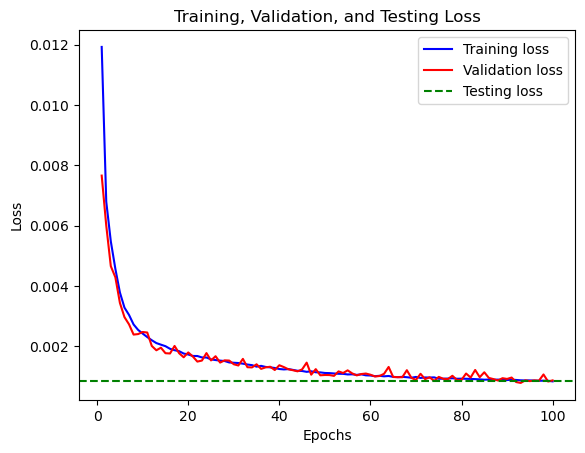

In [90]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot training, validation, and testing loss
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.axhline(y=loss, color='g', linestyle='--', label='Testing loss')  # Horizontal line for testing loss
plt.title('Training, Validation, and Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [91]:
# Make predictions on the test data
y_pred_1 = model1.predict(X_test_zone1)

# Calculate R2 score
ann_r2score_zone1_test = r2_score(y_test_zone1, y_pred_1)
mse = mean_squared_error(y_test_zone1, y_pred_1)
mae = mean_absolute_error(y_test_zone1, y_pred_1)
mae=  tf.reduce_mean(mae).numpy()
mse=  tf.reduce_mean(mse).numpy()

y_pred_train_1 = model1.predict(X_train_zone1)
r2score_train = r2_score(y_train_zone1, y_pred_train_1)

ann_rmse_zone1_test = np.sqrt(mse)
print("Root Mean Squared Error (Test):", ann_rmse_zone1_test)

print("Mean Squared Error:", loss)
print("Mean Absolute Error:", mae)
print("R2 Score (train):", r2score_train)
print("R2 Score (test):", ann_r2score_zone1_test)

246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 1s 504us/step
Root Mean Squared Error (Test): 0.02942099934556408
Mean Squared Error: 0.0008655951241962612
Mean Absolute Error: 0.02191734196123683
R2 Score (train): 0.9761290435633746
R2 Score (test): 0.9751415793011504


### Attempting to change the activation function

In [92]:
#changing activation functions
# Define the model
model2 = Sequential()

# Add input layer and first hidden layer
model2.add(Dense(units=64, activation='sigmoid', input_shape=(12,)))

# Add additional hidden layers (optional)
model2.add(Dense(units=32, activation='sigmoid'))

# Add output layer
model2.add(Dense(units=1, activation='linear'))  # it's a regression task

# Compile the model
model2.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

# Print model summary
model2.summary()

C:\Users\Morsi Store DZ\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

In [93]:
# Fit the model
history = model2.fit(X_train_zone1, y_train_zone1, epochs=100, batch_size=32, validation_data=(X_val_zone1, y_val_zone1))


# Evaluate model performance on test data
loss, mae = model2.evaluate(X_test_zone1, y_test_zone1)

print("Test Loss:", loss)
print("Mean Absolute Error:", mae)



Epoch 1/100
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 1s 858us/step - loss: 0.0273 - mean_absolute_error: 0.1290 - val_loss: 0.0149 - val_mean_absolute_error: 0.0949
Epoch 2/100
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 1s 799us/step - loss: 0.0130 - mean_absolute_error: 0.0906 - val_loss: 0.0150 - val_mean_absolute_error: 0.0956
Epoch 3/100
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0127 - mean_absolute_error: 0.0898 - val_loss: 0.0130 - val_mean_absolute_error: 0.0896
Epoch 4/100
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0130 - mean_absolute_error: 0.0907 - val_loss: 0.0134 - val_mean_absolute_error: 0.0908
Epoch 5/100
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0128 - mean_absolute_error: 0.0900 - val_loss: 0.0124 - val_mean_absolute_error: 0.0878
Epoch 6/100
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0128 - mean_absolute_error: 0.0902 - val_loss: 0.0122 - val_mean_absolute_error: 0.0883
Epoch 7/100
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0128 - mean_a

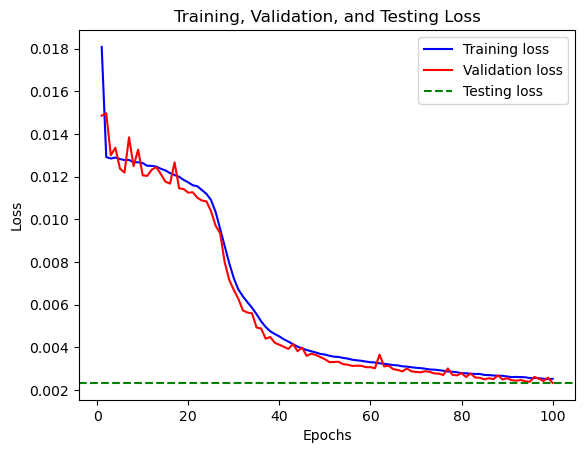

In [94]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot training, validation, and testing loss
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.axhline(y=loss, color='g', linestyle='--', label='Testing loss')  # Horizontal line for testing loss
plt.title('Training, Validation, and Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [95]:
# Make predictions on the test data
y_pred_1_model_2 = model2.predict(X_test_zone1)

# Calculate R2 score
r2score = r2_score(y_test_zone1, y_pred_1_model_2)

print("Test Loss:", loss)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2score)

246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step
Test Loss: 0.002321577165275812
Mean Absolute Error: 0.036133550107479095
R2 Score: 0.9333282466306864


We notice a drop in the R2 score, when we changed the activation to sigmoid, suggesting that in our case, and like most available examples in the literature, Relu is the better option.

#### zone 2 :

In [96]:
# Fit the model
history_z2 = model1.fit(X_train_zone2, y_train_zone2, epochs=100, batch_size=32, validation_data=(X_val_zone2, y_val_zone2))


# Evaluate model performance on test data
loss, mae = model1.evaluate(X_test_zone2, y_test_zone2)

print("Test Loss:", loss)
print("Mean Absolute Error:", mae)

Epoch 1/100
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 1s 916us/step - loss: 0.0030 - mean_absolute_error: 0.0405 - val_loss: 0.0016 - val_mean_absolute_error: 0.0302
Epoch 2/100
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0016 - mean_absolute_error: 0.0296 - val_loss: 0.0013 - val_mean_absolute_error: 0.0272
Epoch 3/100
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0014 - mean_absolute_error: 0.0277 - val_loss: 0.0013 - val_mean_absolute_error: 0.0275
Epoch 4/100
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 1s 997us/step - loss: 0.0014 - mean_absolute_error: 0.0274 - val_loss: 0.0012 - val_mean_absolute_error: 0.0259
Epoch 5/100
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 1s 887us/step - loss: 0.0013 - mean_absolute_error: 0.0268 - val_loss: 0.0012 - val_mean_absolute_error: 0.0254
Epoch 6/100
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 1s 897us/step - loss: 0.0012 - mean_absolute_error: 0.0258 - val_loss: 0.0012 - val_mean_absolute_error: 0.0258
Epoch 7/100
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0011 - me

In [97]:
y_pred_2_model_1 = model1.predict(X_test_zone2)
y_train_2_pred = model1.predict(X_train_zone2)

mae = mean_absolute_error(y_test_zone2, y_pred_2_model_1 )
mae=  tf.reduce_mean(mae).numpy()
mse = mean_squared_error(y_test_zone2, y_pred_2_model_1 )
mse =  tf.reduce_mean(mse).numpy()
ann_r2score_zone2_test = r2_score(y_test_zone2, y_pred_2_model_1 )

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R2 Score (test):", ann_r2score_zone2_test )

r2_score_train = r2_score(y_train_2_pred, y_train_zone2)
print("R2 Score (train):", r2_score_train)

ann_rmse_zone2_test = np.sqrt(mse)
print("Root Mean Squared Error (Test):", ann_rmse_zone2_test)

246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 611us/step
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 1s 872us/step
Mean Absolute Error: 0.020642316290959518
Mean Squared Error: 0.000727465283921225
R2 Score (test): 0.9780346845572814
R2 Score (train): 0.9779358130270749
Root Mean Squared Error (Test): 0.026971564358064682


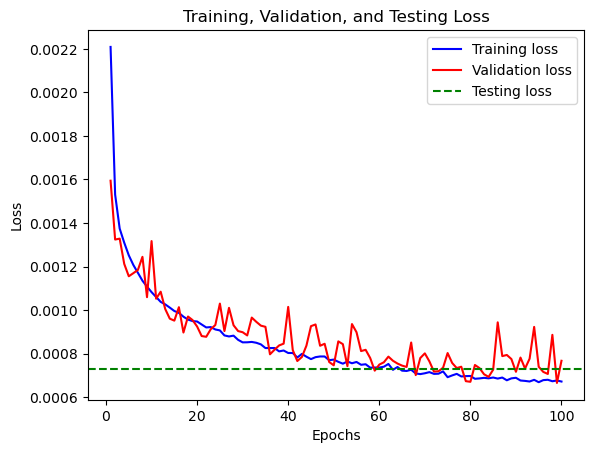

In [98]:
train_loss = history_z2.history['loss']
val_loss = history_z2.history['val_loss']

# Plot training, validation, and testing loss
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.axhline(y=loss, color='g', linestyle='--', label='Testing loss')  # Horizontal line for testing loss
plt.title('Training, Validation, and Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### zone 3 :

In [99]:
# Fit the model
history_z3 = model1.fit(X_train_zone3, y_train_zone3, epochs=100, batch_size=32, validation_data=(X_val_zone3, y_val_zone3))


# Evaluate model performance on test data
loss, mae = model1.evaluate(X_test_zone3, y_test_zone3)

print("Test Loss:", loss)
print("Mean Absolute Error:", mae)

Epoch 1/100
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 1s 765us/step - loss: 0.0032 - mean_absolute_error: 0.0373 - val_loss: 9.2799e-04 - val_mean_absolute_error: 0.0226
Epoch 2/100
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 1s 843us/step - loss: 8.7862e-04 - mean_absolute_error: 0.0221 - val_loss: 7.1110e-04 - val_mean_absolute_error: 0.0198
Epoch 3/100
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 6.9181e-04 - mean_absolute_error: 0.0196 - val_loss: 6.2318e-04 - val_mean_absolute_error: 0.0187
Epoch 4/100
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 6.0812e-04 - mean_absolute_error: 0.0184 - val_loss: 5.8541e-04 - val_mean_absolute_error: 0.0177
Epoch 5/100
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 5.7724e-04 - mean_absolute_error: 0.0180 - val_loss: 6.2309e-04 - val_mean_absolute_error: 0.0187
Epoch 6/100
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 5.5726e-04 - mean_absolute_error: 0.0176 - val_loss: 5.3788e-04 - val_mean_absolute_error: 0.0169
Epoch 7/100
1147/1147 ━━━━━━━━━━━━

In [100]:
y_pred_3_model_1 = model1.predict(X_test_zone3)
y_train_3_pred = model1.predict(X_train_zone3)

mae = mean_absolute_error(y_test_zone3, y_pred_3_model_1 )
mae=  tf.reduce_mean(mae).numpy()
mse = mean_squared_error(y_test_zone3, y_pred_3_model_1 )
mse =  tf.reduce_mean(mse).numpy()
ann_r2score_zone3_test = r2_score(y_test_zone3, y_pred_3_model_1 )

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R2 Score (test):", ann_r2score_zone3_test)

r2_score_train = r2_score(y_train_3_pred, y_train_zone3)
print("R2 Score (train):", r2_score_train)

ann_rmse_zone3_test = np.sqrt(mse)
print("Root Mean Squared Error (Test):", ann_rmse_zone3_test)

246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 1s 710us/step
Mean Absolute Error: 0.012311193399229196
Mean Squared Error: 0.0002856796229721198
R2 Score (test): 0.9887565093973426
R2 Score (train): 0.9897481440963212
Root Mean Squared Error (Test): 0.016902059725729283


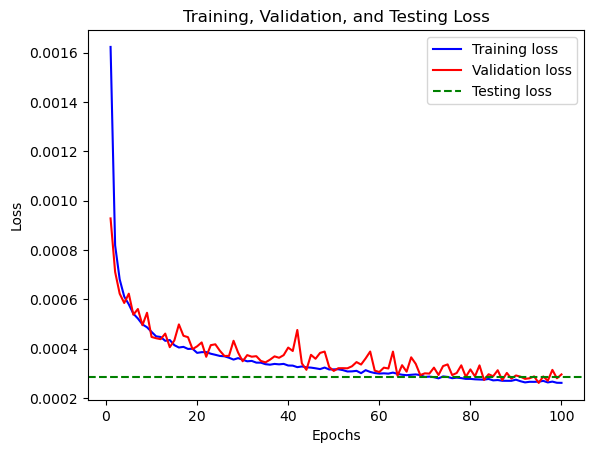

In [101]:
train_loss = history_z3.history['loss']
val_loss = history_z3.history['val_loss']

# Plot training, validation, and testing loss
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.axhline(y=loss, color='g', linestyle='--', label='Testing loss')  # Horizontal line for testing loss
plt.title('Training, Validation, and Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

The Artificial Neural Network (ANN) models, utilizing ReLU activation functions, 2 hidden layers with 64 and 32 neurons, have demonstrated robust performance across the three zones, indicating a good capture of the different patterns in the dataset.

The low RMSE indicates that the model's predictions are very close to the actual values, suggesting high accuracy in estimating power consumption. Similarly, the high R squared score indicates that the model explains a very high pourcentage of the variance in the training data for the three zones.

## Ensemble Learning

#### zone 1 :

In [102]:

# Train multiple instances of the model
num_models = 5
models = []

for i in range(num_models):
    # Create and compile a new instance of the model
    model = Sequential()

# Add input layer and first hidden layer
    model.add(Dense(units=64, activation='relu', input_shape=(12,)))

# Add additional hidden layers (optional)
    model.add(Dense(units=32, activation='relu'))

# Add output layer
    model.add(Dense(units=1, activation='linear'))  # it's a regression task
  # Replace create_model() with your model creation code
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

    # Train the model
    model.fit(X_train_zone1, y_train_zone1, epochs=100, batch_size=32, verbose=0)  # Training without printing progress

    # Add the trained model to the list
    models.append(model)

# Make predictions using each model
all_predictions = []

for model in models:
    predictions = model.predict(X_val_zone1)  # Replace X_val with your validation set data
    all_predictions.append(predictions)

# Combine predictions by averaging
ensemble_predictions = np.mean(all_predictions, axis=0)

ensemble_loss, ensemble_mae = mean_squared_error(y_val_zone1, ensemble_predictions), mean_absolute_error(y_val_zone1, ensemble_predictions)

ensemble_loss = tf.reduce_mean(ensemble_loss).numpy()
ensemble_mae = tf.reduce_mean(ensemble_mae).numpy()

print("Ensemble Loss:", ensemble_loss)
print("Ensemble Mean Absolute Error:", ensemble_mae)


C:\Users\Morsi Store DZ\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step
Ensemble Loss: 0.0006354671646124627
Ensemble Mean Absolute Error: 0.017905084873742635


In [103]:

# Make predictions using each model on the test set
test_predictions = []

for model in models:
    predictions = model.predict(X_test_zone1)  # Replace X_test with your test set data
    test_predictions.append(predictions)

# Combine predictions by averaging
ensemble_test_predictions = np.mean(test_predictions, axis=0)

# Evaluate the performance of the ensemble predictions on the test set
ensemble_test_mse, ensemble_test_mae = mean_squared_error(y_test_zone1, ensemble_test_predictions), mean_absolute_error(y_test_zone1, ensemble_test_predictions)

ensemble_test_mse_mean = tf.reduce_mean(ensemble_test_mse).numpy()
ensemble_test_mae_mean = tf.reduce_mean(ensemble_test_mae).numpy()

train_predictions = []

for model in models:
    predictions = model.predict(X_train_zone1)  # Replace X_test with your test set data
    train_predictions.append(predictions)

ensemble_train_predictions = np.mean(train_predictions, axis=0)

print("Ensemble Test Loss (Mean):", ensemble_test_mse_mean)
print("Ensemble Test Mean Absolute Error (Mean):", ensemble_test_mae_mean)

# Calculate R2 score
r2score = r2_score(y_test_zone1, ensemble_test_predictions)
print(" Ensemble R2 Score(test):", r2score)

#mse_ensemble = mean_squared_error(y_test_zone1, ensemble_test_predictions)

rmse_zone1_test = np.sqrt(ensemble_test_mse_mean)
print("Root Mean Squared Error (Test):", rmse_zone1_test)

# Calculate R2 score
r2score_tr = r2_score(y_train_zone1, ensemble_train_predictions)
print(" Ensemble R2 Score(train):", r2score_tr)

246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 891us/step
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 1s 567us/step
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 1s 538us/step
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 1s 566us/step
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 1s 596us/step
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 1s 567us/step
Ensemble Test Loss (Mean): 0.0006190894195575515
Ensemble Test Mean Absolute Error (Mean): 0.017911933352375942
 Ensemble R2 Score(test): 0.9822208057562379
Root Mean Squared Error (Test): 0.024881507582088982
 Ensemble R2 Score(train): 0.9831042042824387


### Parameter Testing : Regularization, Dropout Layer, Learning rate

In [104]:

# Train multiple instances of the model
num_models = 5
models = []

for i in range(num_models):
    # Create a new instance of the model
    model = Sequential()

    # Add input layer and first hidden layer
    model.add(Dense(units=64, activation='relu', input_shape=(12,)))

    # Add additional hidden layers with dropout regularization
    model.add(Dense(units=32, activation='relu', kernel_regularizer=regularizers.l2(0.05)))
    model.add(Dropout(0.05))  # Dropout layer with 5% dropout rate
    optimizer = Adam(learning_rate=0.001) #manual tuning to the learnig rate
    # Add output layer
    model.add(Dense(units=1, activation='linear'))  # it's a regression task

    # Compile the model
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mean_absolute_error'])

    # Train the model
    model.fit(X_train_zone1, y_train_zone1, epochs=100, batch_size=64, verbose=0)  # Training without printing progress

    # Add the trained model to the list
    models.append(model)

# Make predictions using each model
all_predictions = []

for model in models:
    predictions = model.predict(X_val_zone1)  # Replace X_val with your validation set data
    all_predictions.append(predictions)

# Combine predictions by averaging
ensemble_predictions = np.mean(all_predictions, axis=0)

ensemble_val_loss, ensemble_val_mae = mean_squared_error(y_val_zone1, ensemble_predictions), mean_absolute_error(y_val_zone1, ensemble_predictions)

# Calculate the mean of ensemble test loss and mean absolute error
ensemble_val_loss_mean = tf.reduce_mean(ensemble_val_loss).numpy()
ensemble_val_mae_mean = tf.reduce_mean(ensemble_val_mae).numpy()

print("Ensemble Validation Loss:", ensemble_val_loss_mean)
print("Ensemble Validation Mean Absolute Error:", ensemble_val_mae_mean)

C:\Users\Morsi Store DZ\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step
Ensemble Validation Loss: 0.0024471653929051015
Ensemble Validation Mean Absolute Error: 0.0375048389271286


In [105]:


# Make predictions using each model on the test set
test_predictions = []

for model in models:
    predictions = model.predict(X_test_zone1)  # Replace X_test with your test set data
    test_predictions.append(predictions)

# Combine predictions by averaging
ensemble_test_predictions = np.mean(test_predictions, axis=0)

# Evaluate the performance of the ensemble predictions on the test set
ensemble_test_loss, ensemble_test_mae = mean_squared_error(y_test_zone1, ensemble_test_predictions), mean_absolute_error(y_test_zone1, ensemble_test_predictions)
# Calculate the mean of ensemble test loss and mean absolute error
ensemble_test_loss_mean = tf.reduce_mean(ensemble_test_loss).numpy()
ensemble_test_mae_mean = tf.reduce_mean(ensemble_test_mae).numpy()
# Calculate R2 score
r2score = r2_score(y_test_zone1, ensemble_test_predictions)

print(" Ensemble R2 Score:", r2score)
print("Ensemble Test Loss (Mean):", ensemble_test_loss_mean)
print("Ensemble Test Mean Absolute Error (Mean):", ensemble_test_mae_mean)

246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step
 Ensemble R2 Score: 0.9284985993385537
Ensemble Test Loss (Mean): 0.002489750661708281
Ensemble Test Mean Absolute Error (Mean): 0.037814076549166666


Dropout and regularization are powerful techniques to prevent overfitting and improve model generalization, In our case we have notices a drop in the R squared (in performnace) after many attempts of different values for these two.

The idea behind them is that they reduce the model caapacity to  learn complex patterns to avoid overfitting for instance. In our case, the models were not overfitting on the data and both metrics were close and good in both train and test, so we will not need to opt for these regularization techniques with this dataset.

So we go back ahgain to the default ensemble models of Artificial neural netwoks and extend them to both zones 2 and 3.

#### zone 2 :

In [106]:
# Train multiple instances of the model
num_models = 5
models = []

for i in range(num_models):
    # Create and compile a new instance of the model
    model = Sequential()

# Add input layer and first hidden layer
    model.add(Dense(units=64, activation='relu', input_shape=(12,)))

# Add additional hidden layers (optional)
    model.add(Dense(units=32, activation='relu'))

# Add output layer
    model.add(Dense(units=1, activation='linear'))  # it's a regression task
  # Replace create_model() with your model creation code
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

    # Train the model
    model.fit(X_train_zone2, y_train_zone2, epochs=100, batch_size=32, verbose=0)  # Training without printing progress

    # Add the trained model to the list
    models.append(model)

# Make predictions using each model
all_predictions = []

for model in models:
    predictions = model.predict(X_val_zone2)  # Replace X_val with your validation set data
    all_predictions.append(predictions)

# Combine predictions by averaging
ensemble_predictions = np.mean(all_predictions, axis=0)

ensemble_loss, ensemble_mae = mean_squared_error(y_val_zone2, ensemble_predictions), mean_absolute_error(y_val_zone2, ensemble_predictions)

ensemble_loss = tf.reduce_mean(ensemble_loss).numpy()
ensemble_mae = tf.reduce_mean(ensemble_mae).numpy()

print("Ensemble Loss:", ensemble_loss)
print("Ensemble Mean Absolute Error:", ensemble_mae)


C:\Users\Morsi Store DZ\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step
Ensemble Loss: 0.0006159440019978145
Ensemble Mean Absolute Error: 0.017930399584316678


In [107]:

# Make predictions using each model on the test set
test_predictions = []

for model in models:
    predictions = model.predict(X_test_zone2)  # Replace X_test with your test set data
    test_predictions.append(predictions)

# Combine predictions by averaging
ensemble_test_predictions = np.mean(test_predictions, axis=0)

# Evaluate the performance of the ensemble predictions on the test set
ensemble_test_loss, ensemble_test_mae = mean_squared_error(y_test_zone2, ensemble_test_predictions), mean_absolute_error(y_test_zone2, ensemble_test_predictions)

ensemble_test_loss_mean = tf.reduce_mean(ensemble_test_loss).numpy()
ensemble_test_mae_mean = tf.reduce_mean(ensemble_test_mae).numpy()

train_predictions = []

for model in models:
    predictions = model.predict(X_train_zone2)  # Replace X_test with your test set data
    train_predictions.append(predictions)

ensemble_train_predictions = np.mean(train_predictions, axis=0)


print("Ensemble Test Loss (Mean):", ensemble_test_loss_mean)
print("Ensemble Test Mean Absolute Error (Mean):", ensemble_test_mae_mean)

r2score = r2_score(y_test_zone2, ensemble_test_predictions)

print(" Ensemble R2 Score(test):", r2score)

# Calculate R2 score
r2score_tr = r2_score(y_train_zone2, ensemble_train_predictions)
print(" Ensemble R2 Score(train):", r2score_tr)

246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 1s 480us/step
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 1s 452us/step
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 1s 538us/step
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 1s 422us/step
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step
Ensemble Test Loss (Mean): 0.0006205120989710449
Ensemble Test Mean Absolute Error (Mean): 0.018114352864289703
 Ensemble R2 Score(test): 0.9812640626416499
 Ensemble R2 Score(train): 0.9821816969156895


#### zone 3 :

In [108]:

# Train multiple instances of the model
num_models = 5
models = []

for i in range(num_models):
    # Create and compile a new instance of the model
    model = Sequential()

# Add input layer and first hidden layer
    model.add(Dense(units=64, activation='relu', input_shape=(12,)))

# Add additional hidden layers (optional)
    model.add(Dense(units=32, activation='relu'))

# Add output layer
    model.add(Dense(units=1, activation='linear'))  # it's a regression task
  # Replace create_model() with your model creation code
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

    # Train the model
    model.fit(X_train_zone3, y_train_zone3, epochs=100, batch_size=32, verbose=0)  # Training without printing progress

    # Add the trained model to the list
    models.append(model)

# Make predictions using each model
all_predictions = []

for model in models:
    predictions = model.predict(X_val_zone3)  # Replace X_val with your validation set data
    all_predictions.append(predictions)

# Combine predictions by averaging
ensemble_predictions = np.mean(all_predictions, axis=0)

ensemble_loss, ensemble_mae = mean_squared_error(y_val_zone3, ensemble_predictions), mean_absolute_error(y_val_zone3, ensemble_predictions)

ensemble_loss = tf.reduce_mean(ensemble_loss).numpy()
ensemble_mae = tf.reduce_mean(ensemble_mae).numpy()

print("Ensemble Loss:", ensemble_loss)
print("Ensemble Mean Absolute Error:", ensemble_mae)


C:\Users\Morsi Store DZ\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step
Ensemble Loss: 0.0002411610589382604
Ensemble Mean Absolute Error: 0.010938449985550434


In [109]:

# Make predictions using each model on the test set
test_predictions = []

for model in models:
    predictions = model.predict(X_test_zone3)  # Replace X_test with your test set data
    test_predictions.append(predictions)

# Combine predictions by averaging
ensemble_test_predictions = np.mean(test_predictions, axis=0)

# Evaluate the performance of the ensemble predictions on the test set
ensemble_test_loss, ensemble_test_mae = mean_squared_error(y_test_zone3, ensemble_test_predictions), mean_absolute_error(y_test_zone3, ensemble_test_predictions)

ensemble_test_loss_mean = tf.reduce_mean(ensemble_test_loss).numpy()
ensemble_test_mae_mean = tf.reduce_mean(ensemble_test_mae).numpy()

train_predictions = []

for model in models:
    predictions = model.predict(X_train_zone3)  # Replace X_test with your test set data
    train_predictions.append(predictions)


print("Ensemble Test Loss (Mean):", ensemble_test_loss_mean)
print("Ensemble Test Mean Absolute Error (Mean):", ensemble_test_mae_mean)

r2score = r2_score(y_test_zone3, ensemble_test_predictions)

print(" Ensemble R2 Score(train):", r2score)

ensemble_train_predictions = np.mean(train_predictions, axis=0)

# Calculate R2 score
r2score = r2_score(y_train_zone3, ensemble_train_predictions)
print(" Ensemble R2 Score(test):", r2score)


246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 611us/step
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 1s 642us/step
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 1s 585us/step
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 1s 625us/step
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 1s 640us/step
Ensemble Test Loss (Mean): 0.00023511011453670493
Ensemble Test Mean Absolute Error (Mean): 0.010749329891722163
 Ensemble R2 Score(train): 0.9907467731303988
 Ensemble R2 Score(test): 0.991382783199915


When ensemble Artificial Neural Networks (ANNs) were applied to predict power consumption across the three zones, the results showed slight variations in performance:

Zones 1 and 3: The ensemble ANNs yielded slightly better results compared to a single ANN(The two values of metics differ by a factor of ten to the negative four), indicating that combining the predictions of multiple models helped a little more in capturing the variability and complexity of power consumption patterns more effectively in these zones.

Zone 2: The ensemble approach resulted in slightly lower performance compared to a single ANN(The two values of metics differ by a factor of ten to the negative four).

The small differences in performance across the three zones indicate that while the ensemble method provides some benefit, the overall gains are not substantial enough to warrant the additional computational cost and complexity. This suggests that a single ANN model performs reasonably well across all zones.


## *Comparative Analysis*

In [110]:
# Function to plot the RMSE and R-squared comparison
def plot_model_comparison(zones, model_names, rmse_dict, r2_dict):
    """
    Plots the RMSE and R-squared comparison for multiple models across different zones,
    and displays the RMSE and R-squared values on the bars.

    Parameters:
    zones (list of str): The names of the zones.
    model_names (list of str): The names of the models.
    rmse_dict (dict): A dictionary where keys are model names and values are lists of RMSE values for each zone.
    r2_dict (dict): A dictionary where keys are model names and values are lists of R-squared values for each zone.
    """
    x = np.arange(len(zones))  # the label locations
    width = 0.8 / len(model_names)  # the width of the bars

    fig, ax = plt.subplots(2, 1, figsize=(10, 12))

    # RMSE Comparison
    for i, model_name in enumerate(model_names):
        bars = ax[0].bar(x - width * len(model_names) / 2 + i * width, rmse_dict[model_name], width, label=model_name)
        for bar, value in zip(bars, rmse_dict[model_name]):
            ax[0].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.4f}', ha='center', va='bottom')
    ax[0].set_ylabel('Test RMSE')
    ax[0].set_title(f'Test RMSE by Model and Zone: {", ".join(model_names)}')
    ax[0].set_xticks(x)
    ax[0].set_xticklabels(zones)
    ax[0].legend()

    # R-squared Comparison
    for i, model_name in enumerate(model_names):
        bars = ax[1].bar(x - width * len(model_names) / 2 + i * width, r2_dict[model_name], width, label=model_name)
        for bar, value in zip(bars, r2_dict[model_name]):
            ax[1].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.4f}', ha='center', va='bottom')
    ax[1].set_ylabel('Test R-squared')
    ax[1].set_title(f'Test R-squared by Model and Zone: {", ".join(model_names)}')
    ax[1].set_xticks(x)
    ax[1].set_xticklabels(zones)
    ax[1].legend()

    plt.show()

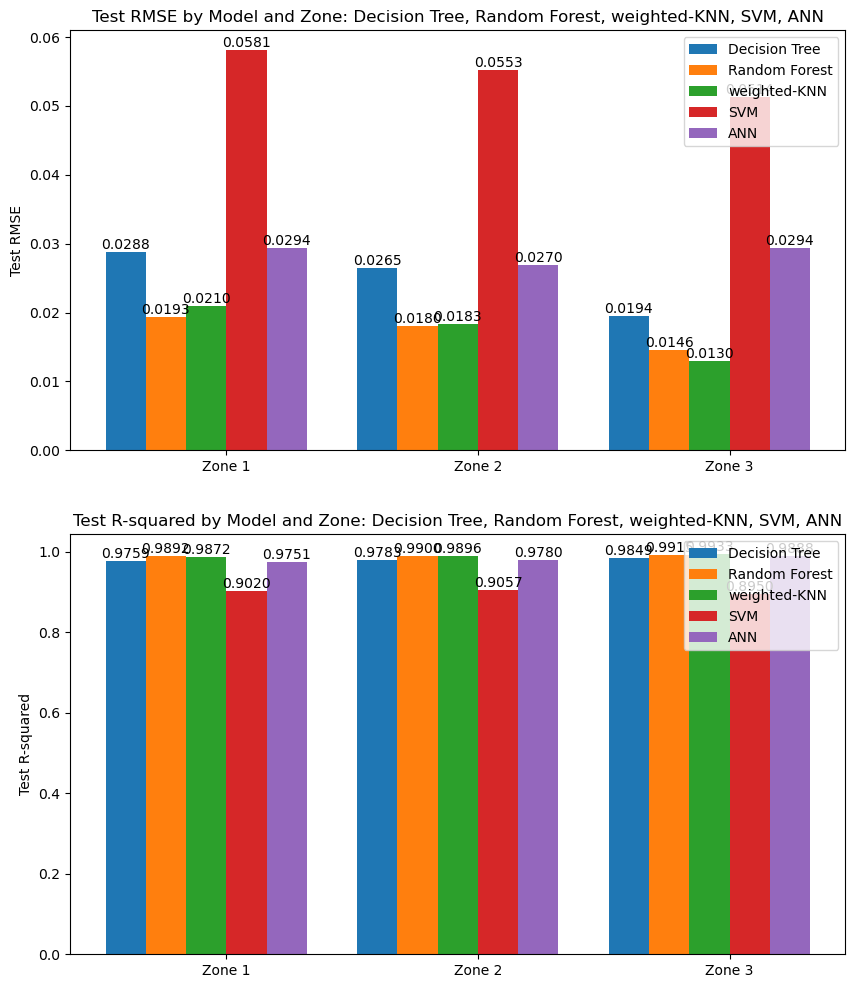

In [111]:
# Data for plotting
zones = ['Zone 1', 'Zone 2', 'Zone 3']
model_names = ['Decision Tree', 'Random Forest','weighted-KNN','SVM','ANN']

# Creating dictionaries for RMSE and R-squared values
rmse_dict = {
    'Decision Tree': [zone1_rmse_decision_tree, zone2_rmse_decision_tree, zone3_rmse_decision_tree],
    'Random Forest': [zone1_rmse_rf, zone2_rmse_rf, zone3_rmse_rf],
    'weighted-KNN':[rmse_weighted_knn_zone_1, rmse_weighted_knn_zone_2, rmse_weighted_knn_zone_3],
    'SVM':[rmse_test_svm_zone1, rmse_test_svm_zone2, rmse_test_svm_zone3],
    'ANN':[ann_rmse_zone1_test, ann_rmse_zone2_test, ann_rmse_zone1_test]
}


r2_dict = {
    'Decision Tree': [ zone1_r2_decision_tree ,  zone2_r2_decision_tree ,  zone3_r2_decision_tree ],
    'Random Forest': [zone1_r2_rf, zone2_r2_rf, zone3_r2_rf],
    'weighted-KNN':[knn_r2_test_zone1, knn_r2_test_zone2, knn_r2_test_zone3],
    'SVM':[r2_test_svm_zone1, r2_test_svm_zone2, r2_test_svm_zone3],
    'ANN':[ann_r2score_zone1_test, ann_r2score_zone2_test, ann_r2score_zone3_test]
}

# Plotting the comparison
plot_model_comparison(zones, model_names, rmse_dict, r2_dict)

**general interpretations**
  - *RMSE*:
-  Random Forest consistently achieves the lowest RMSE across all three zones, indicating it has the best predictive accuracy among the five models.
- weighted-KNN also performs well , particularly in Zone 3 where it achieves the lowest RMSE of all models.
- SVM performs the worst in terms of RMSE in all zones, indicating it is not well-suited for this particular regression task.
- Decision Tree and ANN perform moderately well, with ANN generally outperforming the Decision Tree in all zones except Zone 1.
  - *R-squared (R²)*:
- Random Forest has an R² of 0.9892, 0.9900, 0.9911 (the highest ones) respectively for all zones. indicating it explains 99% of the variance in power consumption data confirming its superior predictive capability.
- weighted-KNN also shows high R² values, especially in Zone 3 where it outperforms even the Random Forest model slightly.
- SVM has the lowest R² values, reinforcing its poor performance observed with RMSE.
- Decision Tree and ANN perform reasonably well, with ANN showing slightly higher R² values than the Decision Tree.


# **Part 2: Classification**

Since one of the models we need to train is a classifier: Naive Bayes model. We will need to treat our data differently compared to how we did it with previous models.

We first need to categorize our target feature values so that we can classify the different data items into: **low**, **medium**, or **high** power consumption. This way, we can use this algorithm and evaluate its performance on this data we have.

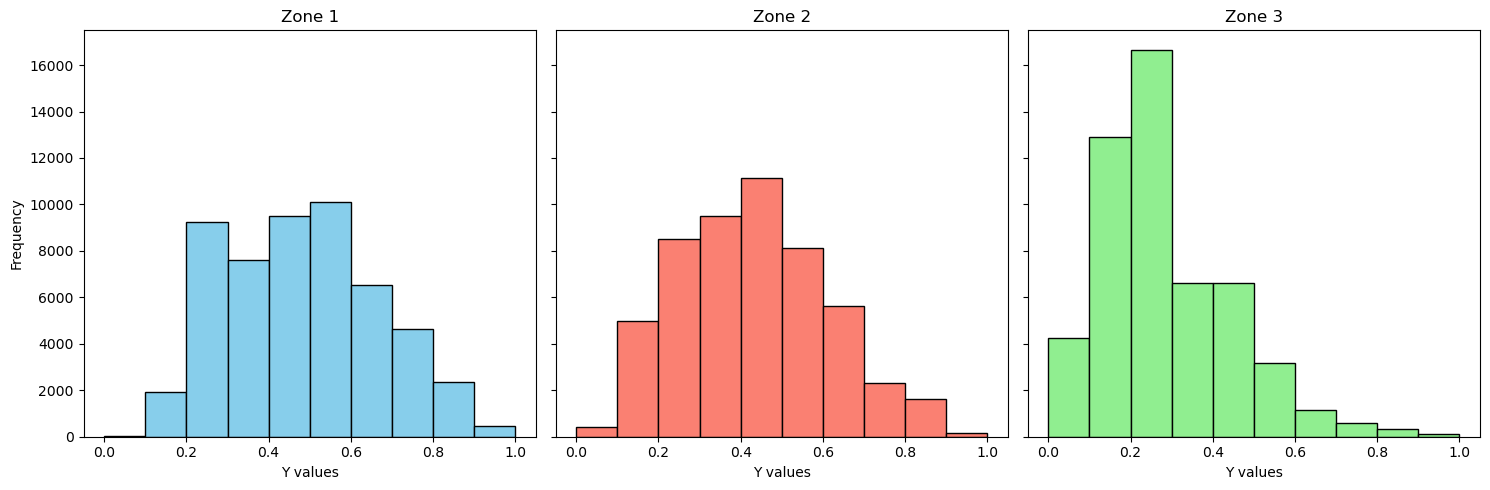

In [112]:
import matplotlib.pyplot as plt

# Define figure and axes
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Plot the shape of the data for Zone 1 before binning
axes[0].hist(y_zone1, color='skyblue', edgecolor='black')
axes[0].set_title('Zone 1')
axes[0].set_xlabel('Y values')
axes[0].set_ylabel('Frequency')

# Plot the shape of the data for Zone 2 before binning
axes[1].hist(y_zone2, color='salmon', edgecolor='black')
axes[1].set_title('Zone 2')
axes[1].set_xlabel('Y values')

# Plot the shape of the data for Zone 3 before binning
axes[2].hist(y_zone3, color='lightgreen', edgecolor='black')
axes[2].set_title('Zone 3')
axes[2].set_xlabel('Y values')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

From the distribution of the target features for the three zones, we can confirm that it is appropriate to split our data into three bins. This binning preserves the overall distribution of the data. Specifically, we observe a higher concentration of data items around the medium values, while there are relatively fewer data items around the high values.

In [113]:
# Define the number of bins
num_bins = 3

# Define bin labels
bin_labels = ['low', 'medium', 'high']

# Apply binning to target feature for Zone 1
y_zone1_binned = pd.cut(y_zone1, bins=num_bins, labels=bin_labels, include_lowest=True)

# Apply binning to target feature for Zone 2
y_zone2_binned = pd.cut(y_zone2, bins=num_bins, labels=bin_labels, include_lowest=True)

# Apply binning to target feature for Zone 3
y_zone3_binned = pd.cut(y_zone3, bins=num_bins, labels=bin_labels, include_lowest=True)


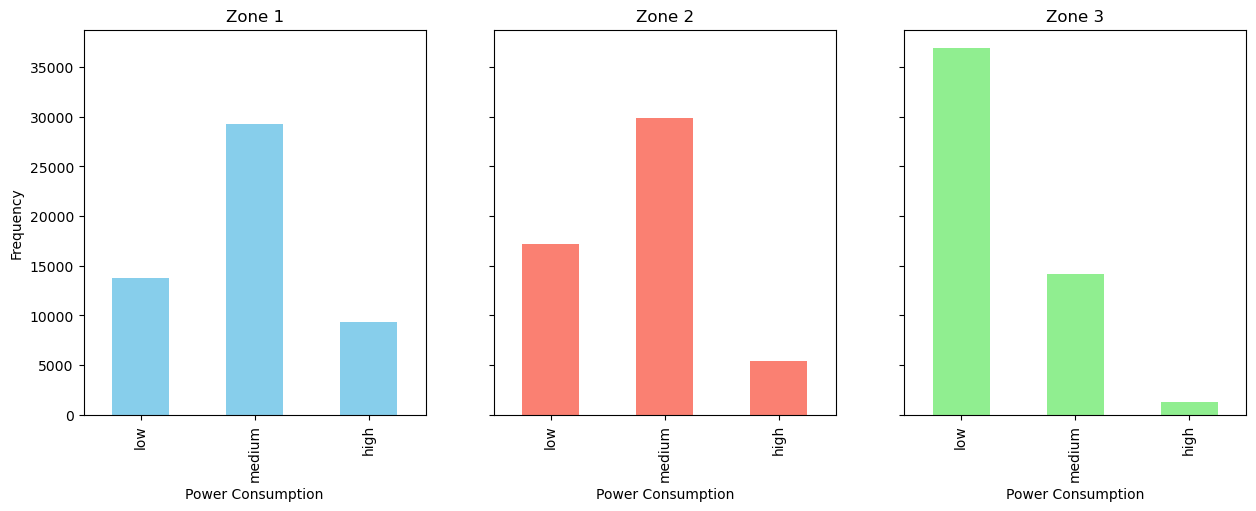

In [114]:

# Create figure and axes
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Plot Zone 1
y_zone1_counts = y_zone1_binned.value_counts()[bin_labels]
y_zone1_counts.plot(kind='bar', color='skyblue', ax=axes[0])
axes[0].set_title('Zone 1')
axes[0].set_xlabel('Power Consumption')
axes[0].set_ylabel('Frequency')

# Plot Zone 2
y_zone2_counts = y_zone2_binned.value_counts()[bin_labels]
y_zone2_counts.plot(kind='bar', color='salmon', ax=axes[1])
axes[1].set_title('Zone 2')
axes[1].set_xlabel('Power Consumption')

# Plot Zone 3
y_zone3_counts = y_zone3_binned.value_counts()[bin_labels]
y_zone3_counts.plot(kind='bar', color='lightgreen', ax=axes[2])
axes[2].set_title('Zone 3')
axes[2].set_xlabel('Power Consumption')

plt.show()


## Gaussian Naive Bayes

First, we will try to fit the model of gaussian naive bayes since all the descriptive features we have are of a continuous nature.
For each zone, we will try to train the model on all the columns, then on the columns we got from feature selection, then finally using the features we got from applying pca. We do all this because we know that this classifier is sensitive to the correlated features. We finally pick the model that performed best and we try to improve it further.

### **Zone 1**


#### Using all columns

In [115]:
# Split the data into train and test sets for Zone 1 with all columns
X_zone1_train_all_columns, X_zone1_test_all_columns, y_zone1_train_all_columns, y_zone1_test_all_columns = train_test_split(
    X,
    y_zone1_binned,
    test_size=0.2,
    random_state=42
)


In [116]:
from sklearn.metrics import accuracy_score

# Define the parameter grid to search for Zone 1 with all columns
param_grid_all_columns = {
    'var_smoothing': [1e-11, 1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 0.01, 0.05, 0.1]  # Example values for var_smoothing
}

# Initialize the Naive Bayes model for Zone 1 with all columns
nb_model_zone1_all_columns = GaussianNB()

# Initialize GridSearchCV for Zone 1 with all columns
grid_search_zone1_all_columns = GridSearchCV(estimator=nb_model_zone1_all_columns, param_grid=param_grid_all_columns, cv=5, scoring='accuracy')

# Perform grid search for Zone 1 with all columns
grid_search_zone1_all_columns.fit(X_zone1_train_all_columns, y_zone1_train_all_columns)

# Get the best hyperparameters for Zone 1 with all columns
best_params_zone1_all_columns = grid_search_zone1_all_columns.best_params_

# Print the best hyperparameters for Zone 1 with all columns
print("Best Hyperparameters for Zone 1 with all columns:", best_params_zone1_all_columns)

# Calculate train accuracy using the best model for Zone 1 with all columns
y_zone1_train_pred_all_columns = grid_search_zone1_all_columns.predict(X_zone1_train_all_columns)
train_accuracy_zone1_all_columns = accuracy_score(y_zone1_train_all_columns, y_zone1_train_pred_all_columns)
print("Train Accuracy with Best Hyperparameters for Zone 1 with all columns:", train_accuracy_zone1_all_columns)

# Use the best model to predict on the test set for Zone 1 with all columns
best_nb_model_zone1_all_columns = grid_search_zone1_all_columns.best_estimator_
y_zone1_pred_all_columns = best_nb_model_zone1_all_columns.predict(X_zone1_test_all_columns)

# Calculate accuracy using the best model for Zone 1 with all columns
accuracy_zone1_all_columns = accuracy_score(y_zone1_test_all_columns, y_zone1_pred_all_columns)
print("Test Accuracy with Best Hyperparameters for Zone 1 with all columns:", accuracy_zone1_all_columns)


Best Hyperparameters for Zone 1 with all columns: {'var_smoothing': 0.01}
Train Accuracy with Best Hyperparameters for Zone 1 with all columns: 0.7599923685967758
Test Accuracy with Best Hyperparameters for Zone 1 with all columns: 0.7585845097291111


#### Using columns after feature selection

In [117]:
# Split the data into train and test sets for Zone 1 with selected features
X_zone1_train_selected_features, X_zone1_test_selected_features, y_zone1_train_selected_features, y_zone1_test_selected_features = train_test_split(
    X_zone1_selected_features,
    y_zone1_binned,
    test_size=0.2,
    random_state=42
)


In [118]:
# Define the parameter grid to search for Zone 1 with selected features
param_grid_selected_features = {
    'var_smoothing': [1e-11, 1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 0.01, 0.05, 0.1]  # Example values for var_smoothing
}

# Initialize the Naive Bayes model for Zone 1 with selected features
nb_model_zone1_selected_features = GaussianNB()

# Initialize GridSearchCV for Zone 1 with selected features
grid_search_zone1_selected_features = GridSearchCV(estimator=nb_model_zone1_selected_features, param_grid=param_grid_selected_features, cv=5, scoring='accuracy')

# Perform grid search for Zone 1 with selected features
grid_search_zone1_selected_features.fit(X_zone1_train_selected_features, y_zone1_train_selected_features)

# Get the best hyperparameters for Zone 1 with selected features
best_params_zone1_selected_features = grid_search_zone1_selected_features.best_params_

# Print the best hyperparameters for Zone 1 with selected features
print("Best Hyperparameters for Zone 1 with selected features:", best_params_zone1_selected_features)

# Use the best model to predict on the test set for Zone 1 with selected features
best_nb_model_zone1_selected_features = grid_search_zone1_selected_features.best_estimator_
y_zone1_pred_selected_features = best_nb_model_zone1_selected_features.predict(X_zone1_test_selected_features)

# Calculate accuracy using the best model for Zone 1 with selected features
accuracy_zone1_selected_features = accuracy_score(y_zone1_test_selected_features, y_zone1_pred_selected_features)
print("Test Accuracy with Best Hyperparameters for Zone 1 with selected features:", accuracy_zone1_selected_features)

# Calculate train accuracy using the best model for Zone 1 with selected features
y_zone1_train_pred_selected_features = best_nb_model_zone1_selected_features.predict(X_zone1_train_selected_features)
train_accuracy_zone1_selected_features = accuracy_score(y_zone1_train_selected_features, y_zone1_train_pred_selected_features)
print("Train Accuracy with Best Hyperparameters for Zone 1 with selected features:", train_accuracy_zone1_selected_features)


Best Hyperparameters for Zone 1 with selected features: {'var_smoothing': 0.1}
Test Accuracy with Best Hyperparameters for Zone 1 with selected features: 0.7414154902708889
Train Accuracy with Best Hyperparameters for Zone 1 with selected features: 0.7440618143661166


#### Using columns after applying PCA

In [119]:
X_zone1_train_pca, X_zone1_test_pca, y_zone1_train_pca, y_zone1_test_pca = train_test_split(
    X_pca_zone1,
    y_zone1_binned,
    test_size=0.2,
    random_state=42
)

In [120]:
# Define the parameter grid to search for Zone 1 after applying PCA
param_grid_pca = {
    'var_smoothing': [1e-11, 1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 0.01, 0.05, 0.1]  # Example values for var_smoothing
}

# Initialize the Naive Bayes model for Zone 1 after applying PCA
nb_model_zone1_pca = GaussianNB()

# Initialize GridSearchCV for Zone 1 after applying PCA
grid_search_zone1_pca = GridSearchCV(estimator=nb_model_zone1_pca, param_grid=param_grid_pca, cv=5, scoring='accuracy')

# Perform grid search for Zone 1 after applying PCA
grid_search_zone1_pca.fit(X_zone1_train_pca, y_zone1_train_pca)

# Get the best hyperparameters for Zone 1 after applying PCA
best_params_zone1_pca = grid_search_zone1_pca.best_params_

# Print the best hyperparameters for Zone 1 after applying PCA
print("Best Hyperparameters for Zone 1 after applying PCA:", best_params_zone1_pca)

# Use the best model to predict on the test set for Zone 1 after applying PCA
best_nb_model_zone1_pca = grid_search_zone1_pca.best_estimator_
y_zone1_pred_pca = best_nb_model_zone1_pca.predict(X_zone1_test_pca)

# Calculate accuracy using the best model for Zone 1 after applying PCA
accuracy_zone1_pca = accuracy_score(y_zone1_test_pca, y_zone1_pred_pca)
print("Test Accuracy with Best Hyperparameters for Zone 1 after applying PCA:", accuracy_zone1_pca)

# Calculate train accuracy using the best model for Zone 1 after applying PCA
y_zone1_train_pred_pca = best_nb_model_zone1_pca.predict(X_zone1_train_pca)
train_accuracy_zone1_pca = accuracy_score(y_zone1_train_pca, y_zone1_train_pred_pca)
print("Train Accuracy with Best Hyperparameters for Zone 1 after applying PCA:", train_accuracy_zone1_pca)


Best Hyperparameters for Zone 1 after applying PCA: {'var_smoothing': 0.01}
Test Accuracy with Best Hyperparameters for Zone 1 after applying PCA: 0.7342617321632965
Train Accuracy with Best Hyperparameters for Zone 1 after applying PCA: 0.7365973480873795


#### Further Evaluation and improvements

Thus, we conclude that it is best for this model to use all the columns. Now we perceed with further considerations with the evaluation of this model, and we try more techniques to improve its performance.

In [121]:
# Calculate accuracy for Zone 1
accuracy_zone1 = accuracy_score(y_zone1_test_all_columns, y_zone1_pred_all_columns)
print("Accuracy for Zone 1:", accuracy_zone1)

# Calculate precision for Zone 1
precision_zone1 = precision_score(y_zone1_test_all_columns, y_zone1_pred_all_columns, average='weighted')
print("Precision for Zone 1:", precision_zone1)

# Calculate recall for Zone 1
recall_zone1 = recall_score(y_zone1_test_all_columns, y_zone1_pred_all_columns, average='weighted')
print("Recall for Zone 1:", recall_zone1)

# Calculate F1-score for Zone 1
f1_score_zone1 = f1_score(y_zone1_test_all_columns, y_zone1_pred_all_columns, average='weighted')
print("F1-score for Zone 1:", f1_score_zone1)


Accuracy for Zone 1: 0.7585845097291111
Precision for Zone 1: 0.7840306096327814
Recall for Zone 1: 0.7585845097291111
F1-score for Zone 1: 0.7581260155241262


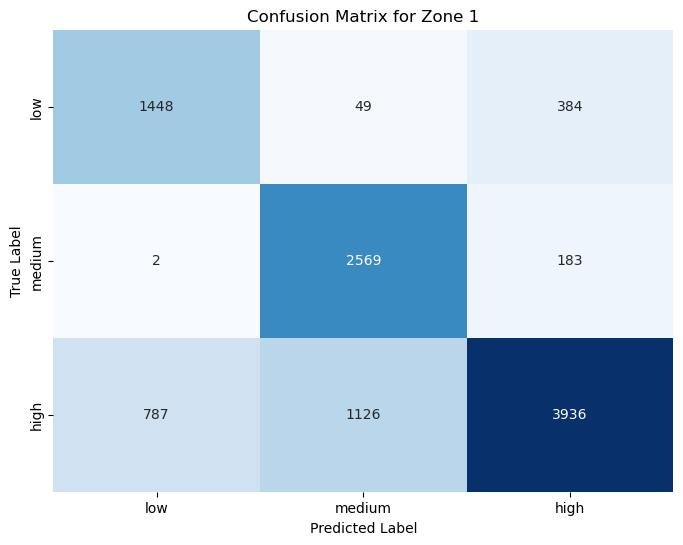

In [122]:
# Compute the confusion matrix for Zone 1
cm_zone1 = confusion_matrix(y_zone1_test_all_columns, y_zone1_pred_all_columns)

# Plot confusion matrix for Zone 1 with label names
plt.figure(figsize=(8, 6))
sns.heatmap(cm_zone1, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=bin_labels, yticklabels=bin_labels)
plt.title("Confusion Matrix for Zone 1")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

##### Undersampling

We noticed in the distribution of the values of the target feature, that some imbalance is present among the classes. This might be affecting the performance of our model. Thus, we try exploring undersampling the majority class to see if this can improve our Naive Bayes model performance.

In [123]:
# Combine the features and target into a single DataFrame
df_train_zone1 = pd.concat([X_zone1_train_all_columns, y_zone1_train_all_columns], axis=1)

# Define the target feature name
target_feature = 'Zone 1 Power Consumption'

# Define the majority and minority classes
majority_class = "medium"
minority_classes = df_train_zone1[target_feature].value_counts().index[df_train_zone1[target_feature].value_counts().index != majority_class]

# Separate majority and minority classes
df_majority = df_train_zone1[df_train_zone1[target_feature] == majority_class]
df_minority = df_train_zone1[df_train_zone1[target_feature].isin(minority_classes)]

# Downsample majority class
df_majority_downsampled = resample(df_majority,
                                   replace=False,    # sample without replacement
                                   n_samples=23200,  # match minority class count
                                   random_state=42)  # reproducible results

# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_minority, df_majority_downsampled])

# Separate features and target variable
X_downsampled_train_zone1 = df_downsampled.drop(columns=[target_feature])
y_downsampled_train_zone1 = df_downsampled[target_feature]

Here we experimented with the different possible values for the number of elements of the mojority class. In the train set we had 23431 instances of the majority class "medium", and we downsampled it to 23200 instances, which by experiment gave the best results.

In [124]:
# Initialize the Naive Bayes model for downsampled data in Zone 1
nb_model_downsampled_zone1 = GaussianNB()

# Initialize GridSearchCV for downsampled data in Zone 1
grid_search_downsampled_zone1 = GridSearchCV(estimator=nb_model_downsampled_zone1, param_grid=param_grid_all_columns, cv=5, scoring='accuracy')

# Perform grid search for downsampled data in Zone 1
grid_search_downsampled_zone1.fit(X_downsampled_train_zone1, y_downsampled_train_zone1)

# Get the best hyperparameters for downsampled data in Zone 1
best_params_downsampled_zone1 = grid_search_downsampled_zone1.best_params_

# Print the best hyperparameters for downsampled data in Zone 1
print("Best Hyperparameters for downsampled data in Zone 1:", best_params_downsampled_zone1)

# Use the best model to predict on the test set for downsampled data in Zone 1
best_nb_model_downsampled_zone1 = grid_search_downsampled_zone1.best_estimator_
y_downsampled_pred_zone1 = best_nb_model_downsampled_zone1.predict(X_zone1_test_all_columns)

# Calculate evaluation metrics for downsampled data in Zone 1
accuracy_downsampled_zone1 = accuracy_score(y_zone1_test_all_columns, y_downsampled_pred_zone1)
precision_downsampled_zone1 = precision_score(y_zone1_test_all_columns, y_downsampled_pred_zone1, average='weighted')
recall_downsampled_zone1 = recall_score(y_zone1_test_all_columns, y_downsampled_pred_zone1, average='weighted')
f1_score_downsampled_zone1 = f1_score(y_zone1_test_all_columns, y_downsampled_pred_zone1, average='weighted')
confusion_matrix_downsampled_zone1 = confusion_matrix(y_zone1_test_all_columns, y_downsampled_pred_zone1)

# Print evaluation metrics for downsampled data in Zone 1
print("Accuracy for downsampled data in Zone 1:", accuracy_downsampled_zone1)
print("Precision for downsampled data in Zone 1:", precision_downsampled_zone1)
print("Recall for downsampled data in Zone 1:", recall_downsampled_zone1)
print("F1-score for downsampled data in Zone 1:", f1_score_downsampled_zone1)
print("Confusion Matrix for downsampled data in Zone 1:\n", confusion_matrix_downsampled_zone1)

Best Hyperparameters for downsampled data in Zone 1: {'var_smoothing': 0.05}
Accuracy for downsampled data in Zone 1: 0.758393742846242
Precision for downsampled data in Zone 1: 0.7827370869260002
Recall for downsampled data in Zone 1: 0.758393742846242
F1-score for downsampled data in Zone 1: 0.7577398058109105
Confusion Matrix for downsampled data in Zone 1:
 [[1409   50  422]
 [   1 2586  167]
 [ 708 1185 3956]]


##### Model Ensembles: Stacking

Here we will try stacking different Naive Bayes models together as another attempt to improve the performance of our model.

In [125]:
# Initialize two Naive Bayes classifiers with different var_smoothing values for Zone 1
nb_zone1_classifier1_best = GaussianNB(var_smoothing=0.05)
nb_zone1_classifier2_best = GaussianNB(var_smoothing=0.04)

# Initialize Stacking classifier with the two Naive Bayes classifiers for Zone 1
best_naive_bayes_zone1 = StackingClassifier(
    estimators=[('nb1', nb_zone1_classifier1_best), ('nb2', nb_zone1_classifier2_best)],
)

# Train the best Naive Bayes classifier for Zone 1
best_naive_bayes_zone1.fit(X_downsampled_train_zone1, y_downsampled_train_zone1)

# Make predictions on the test set for Zone 1
y_pred_best_naive_bayes_zone1 = best_naive_bayes_zone1.predict(X_zone1_test_all_columns)

# Evaluate the performance for Zone 1
accuracy_best_naive_bayes_zone1 = accuracy_score(y_zone1_test_all_columns, y_pred_best_naive_bayes_zone1)
precision_best_naive_bayes_zone1 = precision_score(y_zone1_test_all_columns, y_pred_best_naive_bayes_zone1, average='weighted')
recall_best_naive_bayes_zone1 = recall_score(y_zone1_test_all_columns, y_pred_best_naive_bayes_zone1, average='weighted')
f1_best_naive_bayes_zone1 = f1_score(y_zone1_test_all_columns, y_pred_best_naive_bayes_zone1, average='weighted')
conf_matrix_best_naive_bayes_zone1 = confusion_matrix(y_zone1_test_all_columns, y_pred_best_naive_bayes_zone1)

# Print evaluation metrics for Zone 1
print("Accuracy for Best Naive Bayes in Zone 1:", accuracy_best_naive_bayes_zone1)
print("Precision for Best Naive Bayes in Zone 1:", precision_best_naive_bayes_zone1)
print("Recall for Best Naive Bayes in Zone 1:", recall_best_naive_bayes_zone1)
print("F1-score for Best Naive Bayes in Zone 1:", f1_best_naive_bayes_zone1)
print("Confusion Matrix for Best Naive Bayes in Zone 1:\n", conf_matrix_best_naive_bayes_zone1)


Accuracy for Best Naive Bayes in Zone 1: 0.7706028233498665
Precision for Best Naive Bayes in Zone 1: 0.7789194490226968
Recall for Best Naive Bayes in Zone 1: 0.7706028233498665
F1-score for Best Naive Bayes in Zone 1: 0.7701969048378865
Confusion Matrix for Best Naive Bayes in Zone 1:
 [[1279   49  553]
 [   1 2467  286]
 [ 549  967 4333]]


### **Zone 2**


We follow the same procedure as for zone 1 to see what we can with zone 2:

#### Using all columns

In [126]:
# Split the data into train and test sets for Zone 2 using all columns
X_zone2_all_columns_train, X_zone2_all_columns_test, y_zone2_train, y_zone2_test = train_test_split(
    X,
    y_zone2_binned,
    test_size=0.2,
    random_state=42
)

In [127]:
# Initialize the Naive Bayes model for Zone 2 using all columns
nb_zone2_all_columns = GaussianNB()

# Initialize GridSearchCV for Zone 2 using all columns
grid_search_zone2_all_columns = GridSearchCV(estimator=nb_zone2_all_columns, param_grid=param_grid_all_columns, cv=5, scoring='accuracy')

# Perform grid search for Zone 2 using all columns
grid_search_zone2_all_columns.fit(X_zone2_all_columns_train, y_zone2_train)

# Get the best hyperparameters for Zone 2 using all columns
best_params_zone2_all_columns = grid_search_zone2_all_columns.best_params_

# Print the best hyperparameters for Zone 2 using all columns
print("Best Hyperparameters for Zone 2 (All Columns):", best_params_zone2_all_columns)

# Use the best model to predict on the test set for Zone 2 using all columns
best_nb_model_zone2_all_columns = grid_search_zone2_all_columns.best_estimator_
y_zone2_pred_all_columns = best_nb_model_zone2_all_columns.predict(X_zone2_all_columns_test)

# Calculate accuracy using the best model for Zone 2 using all columns
accuracy_zone2_all_columns = accuracy_score(y_zone2_test, y_zone2_pred_all_columns)
print("Test Accuracy with Best Hyperparameters for Zone 2 (All Columns):", accuracy_zone2_all_columns)

# Calculate train accuracy using the best model for Zone 2 using all columns
y_zone2_train_pred_all_columns = best_nb_model_zone2_all_columns.predict(X_zone2_all_columns_train)
train_accuracy_zone2_all_columns = accuracy_score(y_zone2_train, y_zone2_train_pred_all_columns)
print("Train Accuracy with Best Hyperparameters for Zone 2 (All Columns):", train_accuracy_zone2_all_columns)


Best Hyperparameters for Zone 2 (All Columns): {'var_smoothing': 1e-11}
Test Accuracy with Best Hyperparameters for Zone 2 (All Columns): 0.7296833269744373
Train Accuracy with Best Hyperparameters for Zone 2 (All Columns): 0.7284412858914433


#### Using columns after feature selection

In [128]:
# Split the data into train and test sets for Zone 2 using selected features
X_zone2_selected_features_train, X_zone2_selected_features_test, y_zone2_train, y_zone2_test = train_test_split(
    X_zone2_selected_features,
    y_zone2_binned,
    test_size=0.2,
    random_state=42
)

In [129]:
# Initialize the Naive Bayes model for Zone 2 using selected features
nb_zone2_selected_features = GaussianNB()

# Initialize GridSearchCV for Zone 2 using selected features
grid_search_zone2_selected_features = GridSearchCV(estimator=nb_zone2_selected_features, param_grid=param_grid_selected_features, cv=5, scoring='accuracy')

# Perform grid search for Zone 2 using selected features
grid_search_zone2_selected_features.fit(X_zone2_selected_features_train, y_zone2_train)

# Get the best hyperparameters for Zone 2 using selected features
best_params_zone2_selected_features = grid_search_zone2_selected_features.best_params_

# Print the best hyperparameters for Zone 2 using selected features
print("Best Hyperparameters for Zone 2 (Selected Features):", best_params_zone2_selected_features)

# Use the best model to predict on the test set for Zone 2 using selected features
best_nb_model_zone2_selected_features = grid_search_zone2_selected_features.best_estimator_
y_zone2_pred_selected_features = best_nb_model_zone2_selected_features.predict(X_zone2_selected_features_test)

# Calculate accuracy using the best model for Zone 2 using selected features
accuracy_zone2_selected_features = accuracy_score(y_zone2_test, y_zone2_pred_selected_features)
print("Test Accuracy with Best Hyperparameters for Zone 2 (Selected Features):", accuracy_zone2_selected_features)

# Calculate train accuracy using the best model for Zone 2 using selected features
y_zone2_train_pred_selected_features = best_nb_model_zone2_selected_features.predict(X_zone2_selected_features_train)
train_accuracy_zone2_selected_features = accuracy_score(y_zone2_train, y_zone2_train_pred_selected_features)
print("Train Accuracy with Best Hyperparameters for Zone 2 (Selected Features):", train_accuracy_zone2_selected_features)


Best Hyperparameters for Zone 2 (Selected Features): {'var_smoothing': 0.1}
Test Accuracy with Best Hyperparameters for Zone 2 (Selected Features): 0.7581075925219382
Train Accuracy with Best Hyperparameters for Zone 2 (Selected Features): 0.7595869503004865


#### Using columns after applying PCA

In [130]:
# Split the data into train and test sets for Zone 2 with PCA
X_zone2_pca_train, X_zone2_pca_test, y_zone2_train, y_zone2_test = train_test_split(X_pca_zone2, y_zone2_binned,
                                                                                    test_size=0.2,
                                                                                    random_state=42)


In [131]:
# Initialize the Naive Bayes model for Zone 2 with PCA
nb_zone2_pca = GaussianNB()

# Initialize GridSearchCV for Zone 2 with PCA
grid_search_zone2_pca = GridSearchCV(estimator=nb_zone2_pca, param_grid=param_grid_pca, cv=5, scoring='accuracy')

# Perform grid search for Zone 2 with PCA
grid_search_zone2_pca.fit(X_zone2_pca_train, y_zone2_train)

# Get the best hyperparameters for Zone 2 with PCA
best_params_zone2_pca = grid_search_zone2_pca.best_params_

# Print the best hyperparameters for Zone 2 with PCA
print("Best Hyperparameters for Zone 2 with PCA:", best_params_zone2_pca)

# Use the best model to predict on the test set for Zone 2 with PCA
best_nb_model_zone2_pca = grid_search_zone2_pca.best_estimator_
y_zone2_pred_pca = best_nb_model_zone2_pca.predict(X_zone2_pca_test)

# Calculate accuracy using the best model for Zone 2 with PCA
accuracy_zone2_pca = accuracy_score(y_zone2_test, y_zone2_pred_pca)
print("Test Accuracy with Best Hyperparameters for Zone 2 with PCA:", accuracy_zone2_pca)

# Calculate train accuracy using the best model for Zone 2 with PCA
y_zone2_train_pred_pca = best_nb_model_zone2_pca.predict(X_zone2_pca_train)
train_accuracy_zone2_pca = accuracy_score(y_zone2_train, y_zone2_train_pred_pca)
print("Train Accuracy with Best Hyperparameters for Zone 2 with PCA:", train_accuracy_zone2_pca)


Best Hyperparameters for Zone 2 with PCA: {'var_smoothing': 0.01}
Test Accuracy with Best Hyperparameters for Zone 2 with PCA: 0.7646890499809234
Train Accuracy with Best Hyperparameters for Zone 2 with PCA: 0.7662644281217209


#### Further Evaluation and improvements

Thus, we conclude that it is best for this model to use the features after applying PCA.

In [132]:
# Calculate accuracy for Zone 2
accuracy_zone2 = accuracy_score(y_zone2_test, y_zone2_pred_pca)
print("Accuracy for Zone 2:", accuracy_zone2)

# Calculate precision for Zone 2
precision_zone2 = precision_score(y_zone2_test, y_zone2_pred_pca, average='weighted')
print("Precision for Zone 2:", precision_zone2)

# Calculate recall for Zone 2
recall_zone2 = recall_score(y_zone2_test, y_zone2_pred_pca, average='weighted')
print("Recall for Zone 2:", recall_zone2)

# Calculate F1-score for Zone 2
f1_score_zone2 = f1_score(y_zone2_test, y_zone2_pred_pca, average='weighted')
print("F1-score for Zone 2:", f1_score_zone2)


Accuracy for Zone 2: 0.7646890499809234
Precision for Zone 2: 0.7706433630324195
Recall for Zone 2: 0.7646890499809234
F1-score for Zone 2: 0.7641250171584176


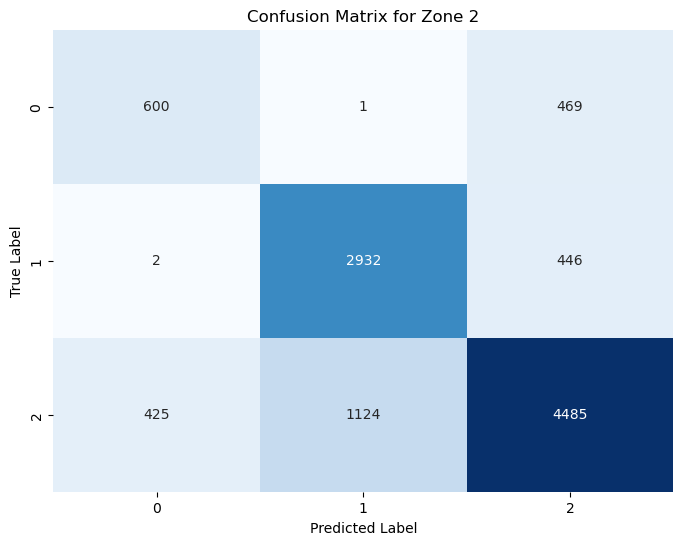

In [133]:
# Compute the confusion matrix for Zone 2
cm_zone2 = confusion_matrix(y_zone2_test, y_zone2_pred_pca)

# Plot confusion matrix for Zone 2
plt.figure(figsize=(8, 6))
sns.heatmap(cm_zone2, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Zone 2")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


##### Undersampling

In this zone as well, we notice an imbalanced distribution, thus we try to explore the undersampling.

In [134]:
X_zone2_train_df = pd.DataFrame(X_zone2_pca_train, columns=[f'PC{i+1}' for i in range(X_zone2_pca_train.shape[1])])

In [135]:

# Reset indices of both DataFrames
X_zone2_train_df.reset_index(drop=True, inplace=True)
y_zone2_train.reset_index(drop=True, inplace=True)

# Concatenate the DataFrames
df_train_zone2 = pd.concat([X_zone2_train_df, y_zone2_train], axis=1)

# Define the target feature name
target_feature = 'Zone 2  Power Consumption'

# Define the majority and minority classes
majority_class = "medium"
minority_classes = df_train_zone2[target_feature].value_counts().index[df_train_zone2[target_feature].value_counts().index != majority_class]

# Separate majority and minority classes
df_majority = df_train_zone2[df_train_zone2[target_feature] == majority_class]
df_minority = df_train_zone2[df_train_zone2[target_feature].isin(minority_classes)]

# Downsample majority class
df_majority_downsampled = resample(df_majority,
                                   replace=False,    # sample without replacement
                                   n_samples=22500,  # match minority class count
                                   random_state=42)  # reproducible results

# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_minority, df_majority_downsampled])

# Separate features and target variable
X_downsampled_train_zone2 = df_downsampled.drop(columns=[target_feature])
y_downsampled_train_zone2 = df_downsampled[target_feature]


Here we experimented with the different possible values for the number of elements of the mojority class. However, we couldn't find any value that could improve the performance.

In [136]:
# Initialize the Naive Bayes model for Zone 2
nb_zone2_downsampled = GaussianNB()

# Initialize GridSearchCV for Zone 2
grid_search_zone2_downsampled = GridSearchCV(estimator=nb_zone2_downsampled, param_grid=param_grid_pca, cv=5, scoring='accuracy')

# Perform grid search for Zone 2
grid_search_zone2_downsampled.fit(X_downsampled_train_zone2, y_downsampled_train_zone2)

# Get the best hyperparameters for Zone 2
best_params_zone2_downsampled = grid_search_zone2_downsampled.best_params_

# Print the best hyperparameters for Zone 2
print("Best Hyperparameters for Zone 2:", best_params_zone2_downsampled)

# Use the best model to predict on the test set for Zone 2
best_nb_model_zone2_downsampled = grid_search_zone2_downsampled.best_estimator_
y_zone2_downsampled_pred = best_nb_model_zone2_downsampled.predict(X_zone2_pca_test)

# Calculate evaluation metrics for Zone 2
accuracy_zone2_downsampled = accuracy_score(y_zone2_test, y_zone2_downsampled_pred)
precision_zone2_downsampled = precision_score(y_zone2_test, y_zone2_downsampled_pred, average='weighted')
recall_zone2_downsampled = recall_score(y_zone2_test, y_zone2_downsampled_pred, average='weighted')
f1_score_zone2_downsampled = f1_score(y_zone2_test, y_zone2_downsampled_pred, average='weighted')
confusion_matrix_zone2_downsampled = confusion_matrix(y_zone2_test, y_zone2_downsampled_pred)

# Print evaluation metrics for Zone 2
print("Accuracy for Zone 2:", accuracy_zone2_downsampled)
print("Precision for Zone 2:", precision_zone2_downsampled)
print("Recall for Zone 2:", recall_zone2_downsampled)
print("F1-score for Zone 2:", f1_score_zone2_downsampled)
print("Confusion Matrix for Zone 2:\n", confusion_matrix_zone2_downsampled)

Best Hyperparameters for Zone 2: {'var_smoothing': 0.05}
Accuracy for Zone 2: 0.7627813811522319
Precision for Zone 2: 0.7662810884764322
Recall for Zone 2: 0.7627813811522319
F1-score for Zone 2: 0.7611053700418369
Confusion Matrix for Zone 2:
 [[ 545    1  524]
 [   1 2935  444]
 [ 391 1126 4517]]


C:\Users\Morsi Store DZ\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


##### Model Ensembles: Stacking

Here we will try stacking different Naive Bayes models together as another attempt to improve the performance of our model.

In [137]:
# Initialize two Naive Bayes classifiers with different var_smoothing values for Zone 2
best_naive_bayes_zone2_classifier1 = GaussianNB(var_smoothing=0.01)
best_naive_bayes_zone2_classifier2 = GaussianNB(var_smoothing=0.13)

# Initialize Stacking classifier with the two Naive Bayes classifiers for Zone 2
best_naive_bayes_zone2 = StackingClassifier(
    estimators=[('nb1', best_naive_bayes_zone2_classifier1), ('nb2', best_naive_bayes_zone2_classifier2)]
)

# Train the Stacking classifier for Zone 2
best_naive_bayes_zone2.fit(X_zone2_pca_train, y_zone2_train)

# Make predictions on the test set for Zone 2
y_pred_best_naive_bayes_zone2 = best_naive_bayes_zone2.predict(X_zone2_pca_test)

# Evaluate the performance for Zone 2
accuracy_best_naive_bayes_zone2 = accuracy_score(y_zone2_test, y_pred_best_naive_bayes_zone2)
precision_best_naive_bayes_zone2 = precision_score(y_zone2_test, y_pred_best_naive_bayes_zone2, average='weighted')
recall_best_naive_bayes_zone2 = recall_score(y_zone2_test, y_pred_best_naive_bayes_zone2, average='weighted')
f1_best_naive_bayes_zone2 = f1_score(y_zone2_test, y_pred_best_naive_bayes_zone2, average='weighted')
conf_matrix_best_naive_bayes_zone2 = confusion_matrix(y_zone2_test, y_pred_best_naive_bayes_zone2)

# Print evaluation metrics for Zone 2
print("Accuracy for Zone 2 (Best Naive Bayes):", accuracy_best_naive_bayes_zone2)
print("Precision for Zone 2 (Best Naive Bayes):", precision_best_naive_bayes_zone2)
print("Recall for Zone 2 (Best Naive Bayes):", recall_best_naive_bayes_zone2)
print("F1-score for Zone 2 (Best Naive Bayes):", f1_best_naive_bayes_zone2)
print("Confusion Matrix for Zone 2 (Best Naive Bayes):\n", conf_matrix_best_naive_bayes_zone2)


Accuracy for Zone 2 (Best Naive Bayes): 0.7716520412056467
Precision for Zone 2 (Best Naive Bayes): 0.7689825329558057
Recall for Zone 2 (Best Naive Bayes): 0.7716520412056467
F1-score for Zone 2 (Best Naive Bayes): 0.7687690800956726
Confusion Matrix for Zone 2 (Best Naive Bayes):
 [[ 499    1  570]
 [   1 2828  551]
 [ 343  928 4763]]


C:\Users\Morsi Store DZ\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### **Zone 3**

#### Using all columns

In [138]:
# Split the data into train and test sets for Zone 3 with all columns
X_zone3_train_all_columns, X_zone3_test_all_columns, y_zone3_train_all_columns, y_zone3_test_all_columns = train_test_split(X, y_zone3_binned,
                                                                            test_size=0.2,
                                                                            random_state=42)


In [139]:
# Initialize the Naive Bayes model for Zone 3 with all columns
nb_zone3_all_columns = GaussianNB()

# Initialize GridSearchCV for Zone 3 with all columns
grid_search_zone3_all_columns = GridSearchCV(estimator=nb_zone3_all_columns, param_grid=param_grid_all_columns, cv=5, scoring='accuracy')

# Perform grid search for Zone 3 with all columns
grid_search_zone3_all_columns.fit(X_zone3_train_all_columns, y_zone3_train_all_columns)

# Get the best hyperparameters for Zone 3 with all columns
best_params_zone3_all_columns = grid_search_zone3_all_columns.best_params_

# Print the best hyperparameters for Zone 3 with all columns
print("Best Hyperparameters for Zone 3 with all columns:", best_params_zone3_all_columns)


# Calculate train accuracy using the best model for Zone 3 with all columns
y_zone3_train_pred_all_columns = grid_search_zone3_all_columns.predict(X_zone3_train_all_columns)
train_accuracy_zone3_all_columns = accuracy_score(y_zone3_train_all_columns, y_zone3_train_pred_all_columns)
print("Train Accuracy with Best Hyperparameters for Zone 3 with all columns:", train_accuracy_zone3_all_columns)

# Use the best model to predict on the test set for Zone 3 with all columns
best_nb_model_zone3_all_columns = grid_search_zone3_all_columns.best_estimator_
y_zone3_pred_all_columns = best_nb_model_zone3_all_columns.predict(X_zone3_test_all_columns)

# Calculate accuracy using the best model for Zone 3 with all columns
accuracy_zone3_all_columns = accuracy_score(y_zone3_test_all_columns, y_zone3_pred_all_columns)
print("Test Accuracy with Best Hyperparameters for Zone 3 with all columns:", accuracy_zone3_all_columns)

Best Hyperparameters for Zone 3 with all columns: {'var_smoothing': 0.001}
Train Accuracy with Best Hyperparameters for Zone 3 with all columns: 0.793332061432796
Test Accuracy with Best Hyperparameters for Zone 3 with all columns: 0.7901564288439527


#### Using columns after feature selection

In [140]:
# Split the data into train and test sets for Zone 3 with selected features
X_zone3_train_selected_features, X_zone3_test_selected_features, y_zone3_train_selected_features, y_zone3_test_selected_features = train_test_split(X_zone3_selected_features, y_zone3_binned,
                                                                            test_size=0.2,
                                                                            random_state=42)

In [141]:
# Initialize the Naive Bayes model for Zone 3 with selected features
nb_zone3_selected_features = GaussianNB()

# Initialize GridSearchCV for Zone 3 with selected features
grid_search_zone3_selected_features = GridSearchCV(estimator=nb_zone3_selected_features, param_grid=param_grid_selected_features, cv=5, scoring='accuracy')

# Perform grid search for Zone 3 with selected features
grid_search_zone3_selected_features.fit(X_zone3_train_selected_features, y_zone3_train_selected_features)

# Get the best hyperparameters for Zone 3 with selected features
best_params_zone3_selected_features = grid_search_zone3_selected_features.best_params_

# Use the best model to predict on the training set for Zone 3 with selected features
best_nb_model_zone3_selected_features = grid_search_zone3_selected_features.best_estimator_
y_zone3_train_pred_selected_features = best_nb_model_zone3_selected_features.predict(X_zone3_train_selected_features)

# Calculate train accuracy using the best model for Zone 3 with selected features
train_accuracy_zone3_selected_features = accuracy_score(y_zone3_train_selected_features, y_zone3_train_pred_selected_features)
print("Train Accuracy with Best Hyperparameters for Zone 3 with selected features:", train_accuracy_zone3_selected_features)

# Use the best model to predict on the test set for Zone 3 with selected features
y_zone3_pred_selected_features = best_nb_model_zone3_selected_features.predict(X_zone3_test_selected_features)

# Calculate accuracy using the best model for Zone 3 with selected features
accuracy_zone3_selected_features = accuracy_score(y_zone3_test_selected_features, y_zone3_pred_selected_features)
print("Test Accuracy with Best Hyperparameters for Zone 3 with selected features:", accuracy_zone3_selected_features)

# Print the best hyperparameters for Zone 3 with selected features
print("Best Hyperparameters for Zone 3 with selected features:", best_params_zone3_selected_features)

Train Accuracy with Best Hyperparameters for Zone 3 with selected features: 0.7992463989316035
Test Accuracy with Best Hyperparameters for Zone 3 with selected features: 0.7929225486455551
Best Hyperparameters for Zone 3 with selected features: {'var_smoothing': 0.001}


#### Using columns after applying PCA

In [142]:
# Split the data into train and test sets for Zone 3 with PCA
X_zone3_train_pca, X_zone3_test_pca, y_zone3_train_pca, y_zone3_test_pca = train_test_split(X_pca_zone3, y_zone3_binned,
                                                                            test_size=0.2,
                                                                            random_state=42)

In [143]:
# Initialize the Naive Bayes model for Zone 3 with PCA
nb_zone3_pca = GaussianNB()

# Initialize GridSearchCV for Zone 3 with PCA
grid_search_zone3_pca = GridSearchCV(estimator=nb_zone3_pca, param_grid=param_grid_pca, cv=5, scoring='accuracy')

# Perform grid search for Zone 3 with PCA
grid_search_zone3_pca.fit(X_zone3_train_pca, y_zone3_train_pca)

# Get the best hyperparameters for Zone 3 with PCA
best_params_zone3_pca = grid_search_zone3_pca.best_params_

# Use the best model to predict on the training set for Zone 3 with PCA
y_zone3_train_pred_pca = grid_search_zone3_pca.predict(X_zone3_train_pca)

# Print the best hyperparameters for Zone 3 with PCA
print("Best Hyperparameters for Zone 3 with PCA:", best_params_zone3_pca)


# Calculate train accuracy using the best model for Zone 3 with PCA
train_accuracy_zone3_pca = accuracy_score(y_zone3_train_pca, y_zone3_train_pred_pca)
print("Train Accuracy with Best Hyperparameters for Zone 3 with PCA:", train_accuracy_zone3_pca)


# Use the best model to predict on the test set for Zone 3 with PCA
y_zone3_pred_pca = grid_search_zone3_pca.predict(X_zone3_test_pca)

# Calculate accuracy using the best model for Zone 3 with PCA
accuracy_zone3_pca = accuracy_score(y_zone3_test_pca, y_zone3_pred_pca)
print("Test Accuracy with Best Hyperparameters for Zone 3 with PCA:", accuracy_zone3_pca)


Best Hyperparameters for Zone 3 with PCA: {'var_smoothing': 0.0001}
Train Accuracy with Best Hyperparameters for Zone 3 with PCA: 0.7657397691500525
Test Accuracy with Best Hyperparameters for Zone 3 with PCA: 0.7556276230446395


#### Further Evaluation and improvements

Thus, we conclude that it is best for this model to use the selected features only.

In [144]:
# Calculate accuracy for Zone 3 using selected features model
accuracy_zone3_selected_features = accuracy_score(y_zone3_test_selected_features, y_zone3_pred_selected_features)
print("Accuracy for Zone 3 (Selected Features):", accuracy_zone3_selected_features)

# Calculate precision for Zone 3 using selected features model
precision_zone3_selected_features = precision_score(y_zone3_test_selected_features, y_zone3_pred_selected_features, average='weighted')
print("Precision for Zone 3 (Selected Features):", precision_zone3_selected_features)

# Calculate recall for Zone 3 using selected features model
recall_zone3_selected_features = recall_score(y_zone3_test_selected_features, y_zone3_pred_selected_features, average='weighted')
print("Recall for Zone 3 (Selected Features):", recall_zone3_selected_features)

# Calculate F1-score for Zone 3 using selected features model
f1_score_zone3_selected_features = f1_score(y_zone3_test_selected_features, y_zone3_pred_selected_features, average='weighted')
print("F1-score for Zone 3 (Selected Features):", f1_score_zone3_selected_features)


Accuracy for Zone 3 (Selected Features): 0.7929225486455551
Precision for Zone 3 (Selected Features): 0.788756843050205
Recall for Zone 3 (Selected Features): 0.7929225486455551
F1-score for Zone 3 (Selected Features): 0.7871711675044165


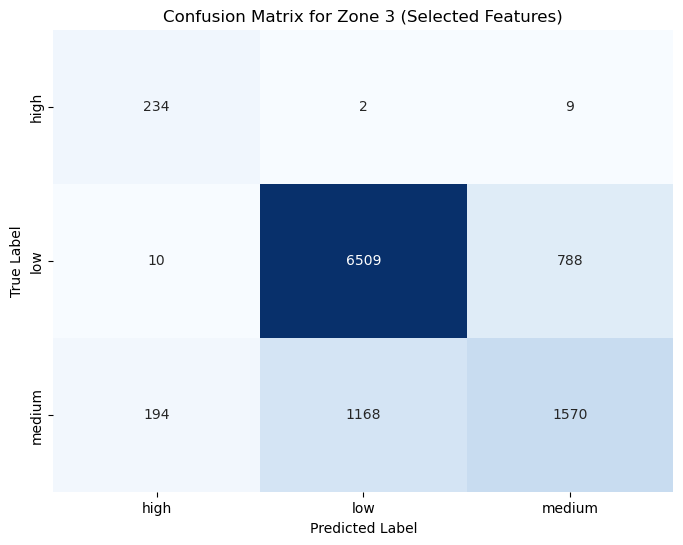

In [145]:
# Compute the confusion matrix for Zone 3 using selected features model
cm_zone3_selected_features = confusion_matrix(y_zone3_test_selected_features, y_zone3_pred_selected_features)

# Plot confusion matrix for Zone 3 with label names
plt.figure(figsize=(8, 6))
sns.heatmap(cm_zone3_selected_features, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['high', 'low', 'medium'], yticklabels=['high', 'low', 'medium'])
plt.title("Confusion Matrix for Zone 3 (Selected Features)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


##### Undersampling

In this zone as well, we notice a significant imbalanced distribution. The class "low" contains a lot of values, while the class "high" contains too little. Thus we try to explore the undersampling.

In [146]:
# Combine the features and target into a single DataFrame for Zone 3
df_train_zone3 = pd.concat([X_zone3_train_selected_features, y_zone3_train_selected_features], axis=1)

# Define the target feature name for Zone 3
target_feature = 'Zone 3  Power Consumption'

# Define the majority and minority classes for Zone 3
majority_class = "low"
minority_classes = df_train_zone3[target_feature].value_counts().index[df_train_zone3[target_feature].value_counts().index != majority_class]

# Separate majority and minority classes for Zone 3
df_majority = df_train_zone3[df_train_zone3[target_feature] == majority_class]
df_minority = df_train_zone3[df_train_zone3[target_feature].isin(minority_classes)]

# Downsample majority class for Zone 3
df_majority_downsampled = resample(df_majority,
                                   replace=False,    # sample without replacement
                                   n_samples=20000,  # match minority class count
                                   random_state=42)  # reproducible results

# Combine minority class with downsampled majority class for Zone 3
df_downsampled = pd.concat([df_minority, df_majority_downsampled])

# Separate features and target variable for Zone 3
X_downsampled_train_zone3 = df_downsampled.drop(columns=[target_feature])
y_downsampled_train_zone3 = df_downsampled[target_feature]


Here we experimented with the different possible values for the number of elements of the mojority class. In the train set we had 29606  instances of the majority class "medium", and we downsampled it to 23200 instances, which by experiment gave the best results.

In [147]:
# Initialize the Naive Bayes model for Zone 3
nb_downsampled_zone3 = GaussianNB()

# Initialize GridSearchCV for Zone 3
grid_search_downsampled_zone3 = GridSearchCV(estimator=nb_downsampled_zone3, param_grid=param_grid_all_columns, cv=5, scoring='accuracy')

# Perform grid search for Zone 3
grid_search_downsampled_zone3.fit(X_downsampled_train_zone3, y_downsampled_train_zone3)

# Get the best hyperparameters for Zone 3
best_params_downsampled_zone3 = grid_search_downsampled_zone3.best_params_

# Print the best hyperparameters for Zone 3
print("Best Hyperparameters for Zone 3:", best_params_downsampled_zone3)

# Use the best model to predict on the test set for Zone 3
best_nb_model_downsampled_zone3 = grid_search_downsampled_zone3.best_estimator_
y_downsampled_pred_zone3 = best_nb_model_downsampled_zone3.predict(X_zone3_test_selected_features)

# Calculate evaluation metrics for Zone 3
accuracy_downsampled_zone3 = accuracy_score(y_zone3_test_selected_features, y_downsampled_pred_zone3)
precision_downsampled_zone3 = precision_score(y_zone3_test_selected_features, y_downsampled_pred_zone3, average='weighted')
recall_downsampled_zone3 = recall_score(y_zone3_test_selected_features, y_downsampled_pred_zone3, average='weighted')
f1_score_downsampled_zone3 = f1_score(y_zone3_test_selected_features, y_downsampled_pred_zone3, average='weighted')
confusion_matrix_downsampled_zone3 = confusion_matrix(y_zone3_test_selected_features, y_downsampled_pred_zone3)

# Print evaluation metrics for Zone 3
print("Accuracy for Zone 3:", accuracy_downsampled_zone3)
print("Precision for Zone 3:", precision_downsampled_zone3)
print("Recall for Zone 3:", recall_downsampled_zone3)
print("F1-score for Zone 3:", f1_score_downsampled_zone3)
print("Confusion Matrix for Zone 3:\n", confusion_matrix_downsampled_zone3)


Best Hyperparameters for Zone 3: {'var_smoothing': 0.001}
Accuracy for Zone 3: 0.7944486837085082
Precision for Zone 3: 0.8083020826522681
Recall for Zone 3: 0.7944486837085082
F1-score for Zone 3: 0.7989171505368083
Confusion Matrix for Zone 3:
 [[ 234    2    9]
 [  10 6093 1204]
 [ 194  736 2002]]


##### Model Ensembles: Stacking

Here as well, we will try stacking different Naive Bayes models together as another attempt to improve the performance of our model.

In [148]:
# Initialize two Naive Bayes classifiers with different var_smoothing values for Zone 3
nb_zone3_classifier1_best = GaussianNB(var_smoothing=0.001)
nb_zone3_classifier2_best = GaussianNB(var_smoothing=5.0)

# Initialize Stacking classifier with the two Naive Bayes classifiers for Zone 3
best_naive_bayes_zone3 = StackingClassifier(
    estimators=[('nb1', nb_zone3_classifier1_best), ('nb2', nb_zone3_classifier2_best)]
)

# Train the best Naive Bayes classifier for Zone 3
best_naive_bayes_zone3.fit(X_downsampled_train_zone3, y_downsampled_train_zone3)

# Make predictions on the test set for Zone 3
y_pred_best_naive_bayes_zone3 = best_naive_bayes_zone3.predict(X_zone3_test_selected_features)

# Evaluate the performance for Zone 3
accuracy_best_naive_bayes_zone3 = accuracy_score(y_zone3_test_selected_features, y_pred_best_naive_bayes_zone3)
precision_best_naive_bayes_zone3 = precision_score(y_zone3_test_selected_features, y_pred_best_naive_bayes_zone3, average='weighted')
recall_best_naive_bayes_zone3 = recall_score(y_zone3_test_selected_features, y_pred_best_naive_bayes_zone3, average='weighted')
f1_best_naive_bayes_zone3 = f1_score(y_zone3_test_selected_features, y_pred_best_naive_bayes_zone3, average='weighted')
conf_matrix_best_naive_bayes_zone3 = confusion_matrix(y_zone3_test_selected_features, y_pred_best_naive_bayes_zone3)

# Print evaluation metrics for Zone 3
print("Accuracy for Best Naive Bayes in Zone 3:", accuracy_best_naive_bayes_zone3)
print("Precision for Best Naive Bayes in Zone 3:", precision_best_naive_bayes_zone3)
print("Recall for Best Naive Bayes in Zone 3:", recall_best_naive_bayes_zone3)
print("F1-score for Best Naive Bayes in Zone 3:", f1_best_naive_bayes_zone3)
print("Confusion Matrix for Best Naive Bayes in Zone 3:\n", conf_matrix_best_naive_bayes_zone3)


Accuracy for Best Naive Bayes in Zone 3: 0.8075162151850439
Precision for Best Naive Bayes in Zone 3: 0.8063039939871317
Recall for Best Naive Bayes in Zone 3: 0.8075162151850439
F1-score for Best Naive Bayes in Zone 3: 0.8056459477879594
Confusion Matrix for Best Naive Bayes in Zone 3:
 [[ 232    2   11]
 [   3 6433  871]
 [ 148  983 1801]]


C:\Users\Morsi Store DZ\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### **Interpretation of Gaussian naive bayes resutls**

Finally, the best results we could get from this model for the three zone were accuracies of 77.06%, 77.12%, 80.73% for zone 1, 2 and 3 respectively.

These results are not really satisfying, despite all the improvements being done on them. The reason for this could be that the distributions of the descriptive features we have do not necessarily fit the gaussian distribution.

We plot all of them and see it they really do or not:

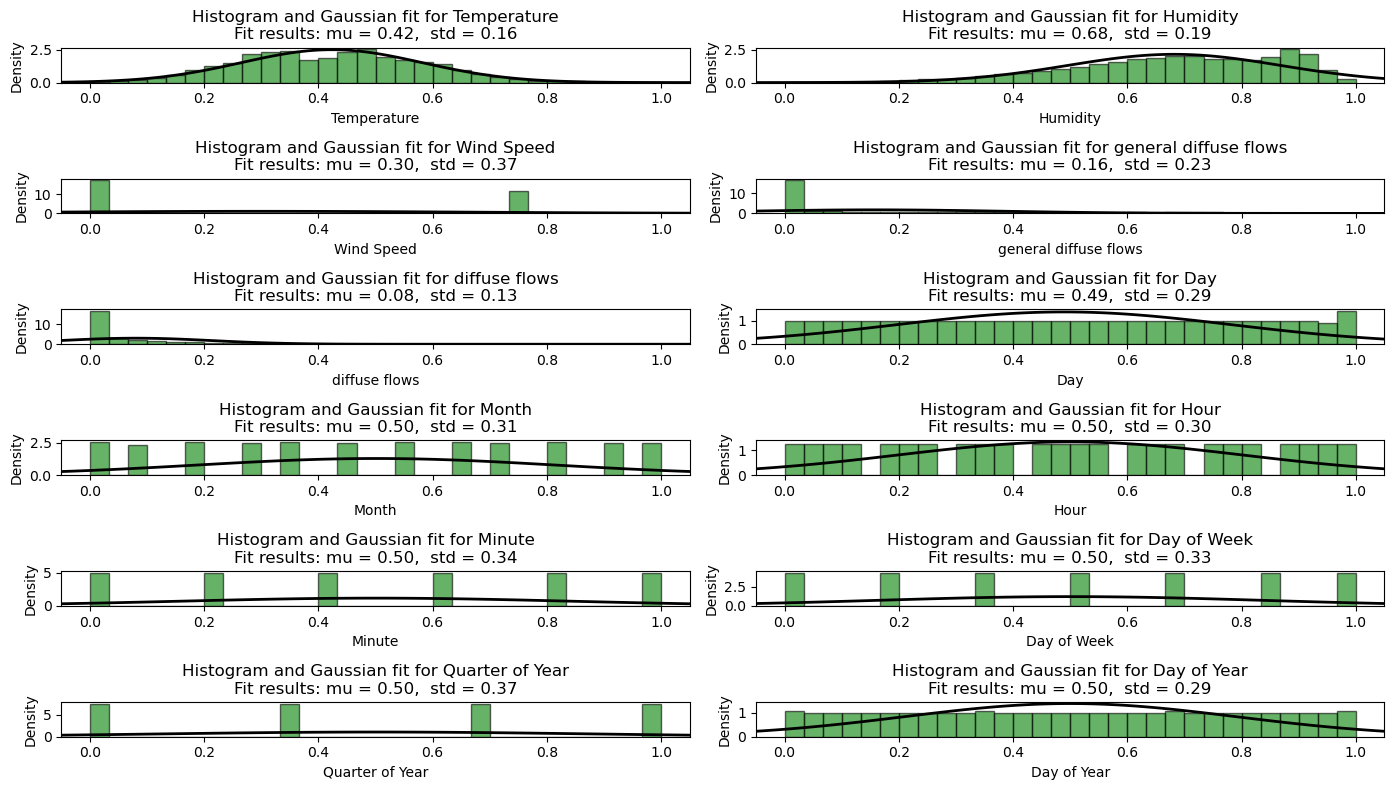

In [149]:
def plot_distributions(data, features):
    num_features = len(features)
    num_cols = 2
    num_rows = (num_features + 1) // num_cols

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 8))
    axes = axes.flatten()

    for i, feature in enumerate(features):
        ax = axes[i]

        # Plot histogram
        n, bins, patches = ax.hist(data[feature], bins=30, density=True, alpha=0.6, color='g', edgecolor='black')

        # Fit a normal distribution to the data
        mu, std = norm.fit(data[feature])

        # Plot the Gaussian distribution curve
        xmin, xmax = ax.set_xlim()
        x = np.linspace(xmin, xmax, 100)
        p = norm.pdf(x, mu, std)

        ax.plot(x, p, 'k', linewidth=2)
        title = f"Fit results: mu = {mu:.2f},  std = {std:.2f}"
        ax.set_title(f'Histogram and Gaussian fit for {feature}\n{title}')
        ax.set_xlabel(feature)
        ax.set_ylabel('Density')

    # Hide any empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Plot distributions for all features in X_zone1
plot_distributions(X, X.columns)


From all these plots, we can clearly see that gaussian distribution doesn't fit the distributions of most of the descriptive features we have. And we can also see that all the columns related to time look very discrete. Thus, another approach that we can take to maybe get better results from Naive Bayes is that we use the other version of it provided by the library which is categorical naive bayes. In this case we will need to transform all the continuous data we have into categorical data and see if that will make the model perform better.

## Categorical Naive Bayes

Now that we will try to apply the categorical Naive Bayes, we will need to redo the preprocessing of the data all over again but differently this time. We will make sure to make the columns we got from the Datetime of the categorical type. And we will do binning on the other columns that have continuous values.

#### Data Preprocessing: Categorizing all the columns

In [150]:
df = pd.read_csv(file_path)

We first extract all the columns we need from the 'DateTime' column, and we make them as categorical features.

In [151]:

df['DateTime'] = pd.to_datetime(df['DateTime'])

# Extract relevant components and convert to categories
df['Day'] = df['DateTime'].dt.day.astype('category')
df['Month'] = df['DateTime'].dt.month.astype('category')
df['Hour'] = df['DateTime'].dt.hour.astype('category')
df['Minute'] = df['DateTime'].dt.minute.astype('category')
df['Day of Week'] = (df['DateTime'].dt.dayofweek + 1).astype('category')

# Define a function to convert month to quarter and apply it
def month_to_quarter(series):
    if series['Month'] <= 3:
        return 1
    elif series['Month'] > 3 and series['Month'] <= 6:
        return 2
    elif series['Month'] > 6 and series['Month'] <= 9:
        return 3
    elif series['Month'] > 9 and series['Month'] <= 12:
        return 4

df['Quarter of Year'] = df.apply(month_to_quarter, axis='columns').astype('category')
df['Day of Year'] = df['DateTime'].dt.strftime('%j').astype(int).astype('category')


In [152]:
# Print the number of distinct values for each new column
print("Number of distinct values for each new column:")
print("Day:", df['Day'].nunique())
print("Month:", df['Month'].nunique())
print("Hour:", df['Hour'].nunique())
print("Minute:", df['Minute'].nunique())
print("Day of Week:", df['Day of Week'].nunique())
print("Quarter of Year:", df['Quarter of Year'].nunique())
print("Day of Year:", df['Day of Year'].nunique())


Number of distinct values for each new column:
Day: 31
Month: 12
Hour: 24
Minute: 6
Day of Week: 7
Quarter of Year: 4
Day of Year: 364


As we can see, we got a reasonable number of categories in each of the new columns, except for the column 'Day of Year'. Thus, we drop this column as it doesn't really hold any usefull new information to our model if we just perform binning to it. And if we keep it as it is, it won't help the Naive bayes model as it introduces a lot of classes which will make a lot of new probabilities and will make the model more prone into falling to zero probabilities.

In [153]:
df.drop(columns=['DateTime', 'Day of Year'], inplace=True)

In [154]:
# rerange the columns :
df = df[['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows',
    'diffuse flows', 'Day','Month', 'Hour', 'Minute', 'Day of Week', 'Quarter of Year',
    'Zone 1 Power Consumption','Zone 2  Power Consumption', 'Zone 3  Power Consumption']]

Now we can about categorizing the other descriptive features that have continuous values.

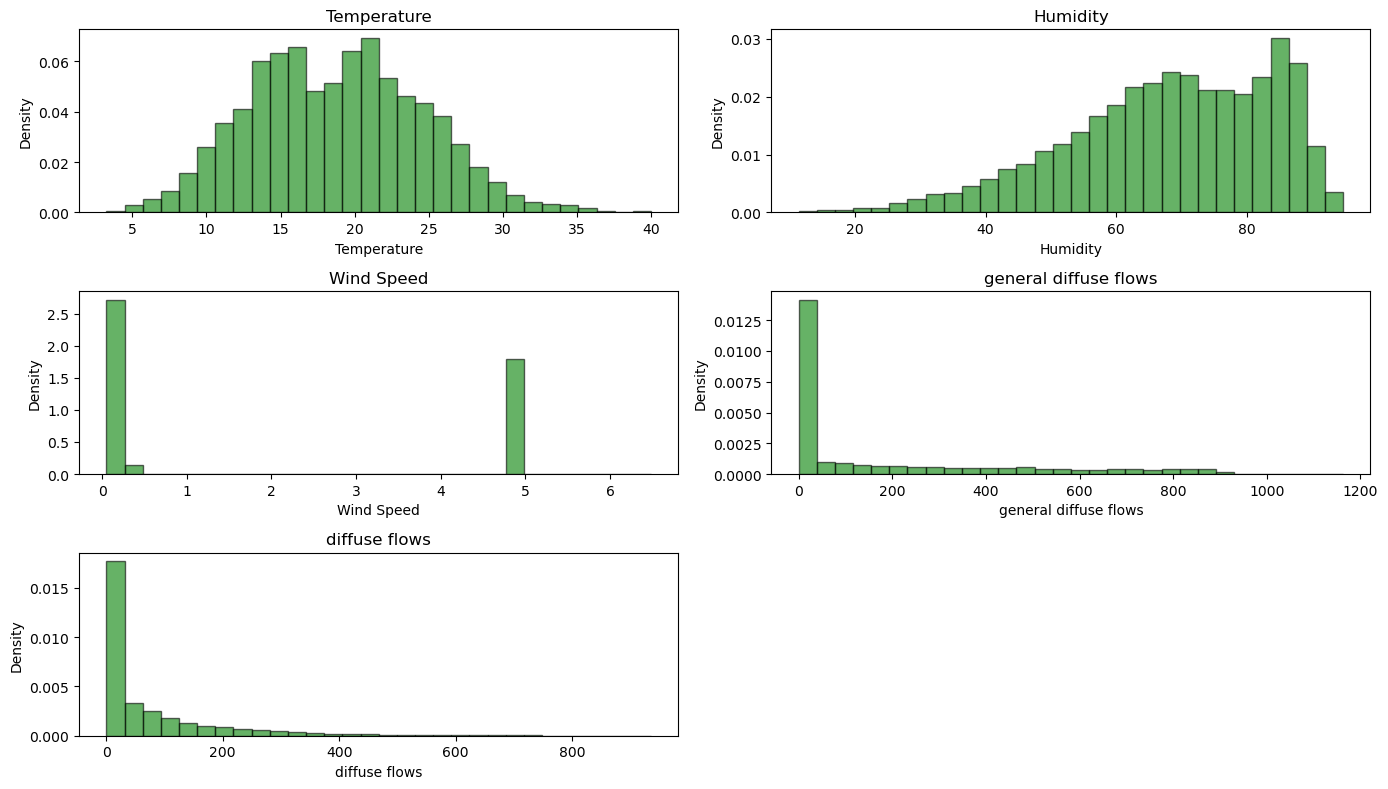

In [155]:
def plot_distributions(data, features):
    num_features = len(features)
    num_cols = 2
    num_rows = (num_features + 1) // num_cols

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 8))
    axes = axes.flatten()

    for i, feature in enumerate(features):
        ax = axes[i]

        # Plot histogram
        n, bins, patches = ax.hist(data[feature], bins=30, density=True, alpha=0.6, color='g', edgecolor='black')

        # Set title and labels
        ax.set_title(feature)
        ax.set_xlabel(feature)
        ax.set_ylabel('Density')

    # Hide any empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Columns to plot
columns_to_plot = ['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows', 'diffuse flows']

# Plot distributions for the specified columns in df
plot_distributions(df, columns_to_plot)


From the way the distribution of these discriptive features look, we will categories them as follow:
- **'Temperature'**: We will use 3 bins because we can see that overall we have few data instances for low values, more instances for intermediate values, and few instances again for the higher values.
-  **'Humidity'**: Here we can use 3 bins as well as the instances are too few for low values, then we have more for intermediate values, then we have the maximum of them for higher values.
- **'Wind Speed'**: We clearly need to use 2 bins only for this case, as most of the instances are either around the maximum or the minimum value.
- **'general diffuse flows'** and **'diffuse flows'**: for both of these, it looks 2 bins would be a good fit. To distinguish between values near 0 and the rest of values. However, by experiment 3 bins turned out to work better.

In [156]:
num_bins_temp = 3  # You can adjust this number based on your preference

# Perform binning for temperature using pd.cut
df['Temperature Bin'] = pd.cut(df['Temperature'], bins=num_bins_temp, labels=[f'Bin {i+1}' for i in range(num_bins_temp)])

# Optionally, check the distribution of the temperature bins
print(df['Temperature Bin'].value_counts())


Bin 2    32515
Bin 1    16659
Bin 3     3242
Name: Temperature Bin, dtype: int64


In [157]:
# Define the number of bins for humidity
num_bins_humidity = 3  # You can adjust this number based on your preference

# Perform binning for humidity using pd.cut
df['Humidity Bin'] = pd.cut(df['Humidity'], bins=num_bins_humidity, labels=[f'Bin {i+1}' for i in range(num_bins_humidity)])

# Optionally, check the distribution of the humidity bins
print(df['Humidity Bin'].value_counts())


Bin 3    29878
Bin 2    19983
Bin 1     2555
Name: Humidity Bin, dtype: int64


In [158]:
# Perform binning on the 'Wind Speed' column to create 2 bins with equal intervals
df['Wind Speed Bin'] = pd.cut(df['Wind Speed'], bins=2, labels=['Low', 'High'])

# Optionally, check the distribution of the bins
print(df['Wind Speed Bin'].value_counts())


Low     32150
High    20266
Name: Wind Speed Bin, dtype: int64


In [159]:
num_bins = 3

# Perform binning using pd.cut
df['General Diffuse Flows Bin (Linear)'] = pd.cut(df['general diffuse flows'], bins=num_bins, labels=[f'Bin {i+1}' for i in range(num_bins)])

# Optionally, check the distribution of the bins
print(df['General Diffuse Flows Bin (Linear)'].value_counts())


Bin 1    41090
Bin 2     8576
Bin 3     2750
Name: General Diffuse Flows Bin (Linear), dtype: int64


In [160]:
num_bins = 3

# Perform binning using pd.cut
df['Diffuse Flows Bin'] = pd.cut(df['diffuse flows'], bins=num_bins, labels=[f'Bin {i+1}' for i in range(num_bins)])

# Optionally, check the distribution of the bins
print(df['Diffuse Flows Bin'].value_counts())


Bin 1    49411
Bin 2     2635
Bin 3      370
Name: Diffuse Flows Bin, dtype: int64


Now we drop the columns that have the continuous values, and we only keep the resulting columns with the discrete values.

In [161]:
columns_to_drop = ['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows', 'diffuse flows']

# Drop the specified columns
df.drop(columns=columns_to_drop, inplace=True)


Then we split the data we have into X and y and train and test.

In [162]:
# Define the columns for power consumption for each zone
power_columns = ['Zone 1 Power Consumption', 'Zone 2  Power Consumption', 'Zone 3  Power Consumption']

# Split the data into X and y for each zone
X = df.drop(columns=power_columns)


In [163]:
X_train_zone1, X_test_zone1, y_train_zone1, y_test_zone1 = train_test_split(X, y_zone1_binned, test_size=0.2, random_state=42)
X_train_zone2, X_test_zone2, y_train_zone2, y_test_zone2 = train_test_split(X, y_zone2_binned, test_size=0.2, random_state=42)
X_train_zone3, X_test_zone3, y_train_zone3, y_test_zone3 = train_test_split(X, y_zone3_binned, test_size=0.2, random_state=42)


### **Zone 1**


In [164]:
# Create an OrdinalEncoder instance for Zone 1
encoder_zone1 = OrdinalEncoder()

# Fit the encoder on X_train_zone1 and transform X_train_zone1 and X_test_zone1 using the fitted encoder
X_train_encoded_zone1 = encoder_zone1.fit_transform(X_train_zone1)
X_test_encoded_zone1 = encoder_zone1.transform(X_test_zone1)

# Define a range of values for the smoothing parameter (alpha)
alphas = [0.0, 0.1, 0.2, 0.5, 1.0, 2.0, 5.0, 10.0]  # Adjust this range as needed

# Create a dictionary containing the parameter grid
param_grid_zone1 = {'alpha': alphas}

# Create the grid search object for Zone 1
grid_search_zone1 = GridSearchCV(estimator=CategoricalNB(), param_grid=param_grid_zone1, cv=5)

# Perform the grid search on the training data for Zone 1
grid_search_zone1.fit(X_train_encoded_zone1, y_train_zone1)

# Get the best parameter values and the corresponding accuracy for Zone 1
best_alpha_zone1 = grid_search_zone1.best_params_['alpha']
best_score_zone1 = grid_search_zone1.best_score_

print("Best alpha for Zone 1 (Naive Bayes):", best_alpha_zone1)
print("Best cross-validated accuracy for Zone 1 (Naive Bayes):", best_score_zone1)

# Train the Categorical Naive Bayes model with the best alpha value for Zone 1
best_nb_clf_zone1 = CategoricalNB(alpha=best_alpha_zone1)
best_nb_clf_zone1.fit(X_train_encoded_zone1, y_train_zone1)

# Predict on the test set for Zone 1
y_pred_nb_zone1 = best_nb_clf_zone1.predict(X_test_encoded_zone1)

# Calculate the accuracy on the test set for Zone 1
test_accuracy_nb_clf_zone1 = accuracy_score(y_test_zone1, y_pred_nb_zone1)
print("Test set accuracy with best alpha for Zone 1 (Naive Bayes):", test_accuracy_nb_clf_zone1)

# Calculate additional evaluation metrics for Zone 1 (Naive Bayes)
precision_nb_clf_zone1 = precision_score(y_test_zone1, y_pred_nb_zone1, average='weighted')
recall_nb_clf_zone1 = recall_score(y_test_zone1, y_pred_nb_zone1, average='weighted')
f1_nb_clf_zone1 = f1_score(y_test_zone1, y_pred_nb_zone1, average='weighted')
conf_matrix_nb_clf_zone1 = confusion_matrix(y_test_zone1, y_pred_nb_zone1)

print("Precision for Zone 1 (Naive Bayes):", precision_nb_clf_zone1)
print("Recall for Zone 1 (Naive Bayes):", recall_nb_clf_zone1)
print("F1 Score for Zone 1 (Naive Bayes):", f1_nb_clf_zone1)
print("Confusion Matrix for Zone 1 (Naive Bayes):\n", conf_matrix_nb_clf_zone1)

C:\Users\Morsi Store DZ\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\Morsi Store DZ\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\Morsi Store DZ\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\Morsi Store DZ\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\Morsi Store DZ\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


Best alpha for Zone 1 (Naive Bayes): 0.1
Best cross-validated accuracy for Zone 1 (Naive Bayes): 0.8499236337021301
Test set accuracy with best alpha for Zone 1 (Naive Bayes): 0.8572109881724532
Precision for Zone 1 (Naive Bayes): 0.8575263962053177
Recall for Zone 1 (Naive Bayes): 0.8572109881724532
F1 Score for Zone 1 (Naive Bayes): 0.8564510134573081
Confusion Matrix for Zone 1 (Naive Bayes):
 [[1401   24  456]
 [   0 2495  259]
 [ 273  485 5091]]


### **Zone 2**


In [165]:
# Create an OrdinalEncoder instance for Zone 2
encoder_zone2 = OrdinalEncoder()

# Fit the encoder on X_train_zone2 and transform X_train_zone2 and X_test_zone2 using the fitted encoder
X_train_encoded_zone2 = encoder_zone2.fit_transform(X_train_zone2)
X_test_encoded_zone2 = encoder_zone2.transform(X_test_zone2)

# Define a range of values for the smoothing parameter (alpha)
alphas = [0.0, 0.1, 0.2, 0.5, 1.0, 2.0, 5.0, 10.0]  # Adjust this range as needed

# Create a dictionary containing the parameter grid
param_grid_zone2 = {'alpha': alphas}

# Create the grid search object for Zone 2
grid_search_zone2 = GridSearchCV(estimator=CategoricalNB(), param_grid=param_grid_zone2, cv=5)

# Perform the grid search on the training data for Zone 2
grid_search_zone2.fit(X_train_encoded_zone2, y_train_zone2)

# Get the best parameter values and the corresponding accuracy for Zone 2
best_alpha_zone2 = grid_search_zone2.best_params_['alpha']
best_score_zone2 = grid_search_zone2.best_score_

print("Best alpha for Zone 2 (Naive Bayes):", best_alpha_zone2)
print("Best cross-validated accuracy for Zone 2 (Naive Bayes):", best_score_zone2)

# Train the Categorical Naive Bayes model with the best alpha value for Zone 2
best_nb_clf_zone2 = CategoricalNB(alpha=best_alpha_zone2)
best_nb_clf_zone2.fit(X_train_encoded_zone2, y_train_zone2)

# Predict on the test set for Zone 2
y_pred_nb_zone2 = best_nb_clf_zone2.predict(X_test_encoded_zone2)

# Calculate the accuracy on the test set for Zone 2
test_accuracy_nb_clf_zone2 = accuracy_score(y_test_zone2, y_pred_nb_zone2)
print("Test set accuracy with best alpha for Zone 2 (Naive Bayes):", test_accuracy_nb_clf_zone2)

# Calculate additional evaluation metrics for Zone 2 (Naive Bayes)
precision_nb_clf_zone2 = precision_score(y_test_zone2, y_pred_nb_zone2, average='weighted')
recall_nb_clf_zone2 = recall_score(y_test_zone2, y_pred_nb_zone2, average='weighted')
f1_nb_clf_zone2 = f1_score(y_test_zone2, y_pred_nb_zone2, average='weighted')
conf_matrix_nb_clf_zone2 = confusion_matrix(y_test_zone2, y_pred_nb_zone2)

print("Precision for Zone 2 (Naive Bayes):", precision_nb_clf_zone2)
print("Recall for Zone 2 (Naive Bayes):", recall_nb_clf_zone2)
print("F1 Score for Zone 2 (Naive Bayes):", f1_nb_clf_zone2)
print("Confusion Matrix for Zone 2 (Naive Bayes):\n", conf_matrix_nb_clf_zone2)


C:\Users\Morsi Store DZ\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\Morsi Store DZ\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\Morsi Store DZ\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\Morsi Store DZ\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\Morsi Store DZ\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


Best alpha for Zone 2 (Naive Bayes): 0.0
Best cross-validated accuracy for Zone 2 (Naive Bayes): 0.8197318308964583
Test set accuracy with best alpha for Zone 2 (Naive Bayes): 0.8252575352918733
Precision for Zone 2 (Naive Bayes): 0.826376331018776
Recall for Zone 2 (Naive Bayes): 0.8252575352918733
F1 Score for Zone 2 (Naive Bayes): 0.8255623309767355
Confusion Matrix for Zone 2 (Naive Bayes):
 [[ 758    0  312]
 [   0 2866  514]
 [ 338  668 5028]]


C:\Users\Morsi Store DZ\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\Morsi Store DZ\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


### **Zone 3**

In [166]:
# Create an OrdinalEncoder instance for Zone 3
encoder_zone3 = OrdinalEncoder()

# Fit the encoder on X_train_zone3 and transform X_train_zone3 and X_test_zone3 using the fitted encoder
X_train_encoded_zone3 = encoder_zone3.fit_transform(X_train_zone3)
X_test_encoded_zone3 = encoder_zone3.transform(X_test_zone3)

# Define a range of values for the smoothing parameter (alpha)
alphas = [0.0, 0.1, 0.2, 0.5, 1.0, 2.0, 5.0, 10.0]  # Adjust this range as needed

# Create a dictionary containing the parameter grid
param_grid_zone3 = {'alpha': alphas}

# Create the grid search object for Zone 3
grid_search_zone3 = GridSearchCV(estimator=CategoricalNB(), param_grid=param_grid_zone3, cv=5)

# Perform the grid search on the training data for Zone 3
grid_search_zone3.fit(X_train_encoded_zone3, y_train_zone3)

# Get the best parameter values and the corresponding accuracy for Zone 3
best_alpha_zone3 = grid_search_zone3.best_params_['alpha']
best_score_zone3 = grid_search_zone3.best_score_

print("Best alpha for Zone 3 (Naive Bayes):", best_alpha_zone3)
print("Best cross-validated accuracy for Zone 3 (Naive Bayes):", best_score_zone3)

# Train the Categorical Naive Bayes model with the best alpha value for Zone 3
best_nb_clf_zone3 = CategoricalNB(alpha=best_alpha_zone3)
best_nb_clf_zone3.fit(X_train_encoded_zone3, y_train_zone3)

# Predict on the test set for Zone 3
y_pred_nb_zone3 = best_nb_clf_zone3.predict(X_test_encoded_zone3)

# Calculate the accuracy on the test set for Zone 3
test_accuracy_nb_clf_zone3 = accuracy_score(y_test_zone3, y_pred_nb_zone3)
print("Test set accuracy with best alpha for Zone 3 (Naive Bayes):", test_accuracy_nb_clf_zone3)

# Calculate additional evaluation metrics for Zone 3 (Naive Bayes)
precision_nb_clf_zone3 = precision_score(y_test_zone3, y_pred_nb_zone3, average='weighted')
recall_nb_clf_zone3 = recall_score(y_test_zone3, y_pred_nb_zone3, average='weighted')
f1_nb_clf_zone3 = f1_score(y_test_zone3, y_pred_nb_zone3, average='weighted')
conf_matrix_nb_clf_zone3 = confusion_matrix(y_test_zone3, y_pred_nb_zone3)

print("Precision for Zone 3 (Naive Bayes):", precision_nb_clf_zone3)
print("Recall for Zone 3 (Naive Bayes):", recall_nb_clf_zone3)
print("F1 Score for Zone 3 (Naive Bayes):", f1_nb_clf_zone3)
print("Confusion Matrix for Zone 3 (Naive Bayes):\n", conf_matrix_nb_clf_zone3)


C:\Users\Morsi Store DZ\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\Morsi Store DZ\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\Morsi Store DZ\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\Morsi Store DZ\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\Morsi Store DZ\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


Best alpha for Zone 3 (Naive Bayes): 0.0
Best cross-validated accuracy for Zone 3 (Naive Bayes): 0.8589621383484729
Test set accuracy with best alpha for Zone 3 (Naive Bayes): 0.8577832888210607
Precision for Zone 3 (Naive Bayes): 0.8553712667740038
Recall for Zone 3 (Naive Bayes): 0.8577832888210607
F1 Score for Zone 3 (Naive Bayes): 0.8549710975316798
Confusion Matrix for Zone 3 (Naive Bayes):
 [[ 220    0   25]
 [   0 6778  529]
 [ 102  835 1995]]


C:\Users\Morsi Store DZ\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\Morsi Store DZ\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


### **Interpretation of categorical naive bayes resutls**

We can clearly see that the results we got by this model are better then the results we got previously. For the three zones, the accuracies improved to give 85.72%, 82.52%, 85.77% for zone 1, 2 and 3 respectively.

This improvement makes sense because the modal didn't assume any distribution on our data as the previous model did. It just calculated the probabilities for all the different classes we have for the different categories.

However, we can also see that these results are not the best, we will discuss this further in the following section.

## Comparative Analysis: Classification

Since the Naive Bayes Model has been treated differently compared to the other models, we will need to evaluate its performance and analyse it differently.

This algorithm is a classifier and thus we needed to categorize the target features in order to perform classification on our data.

Now, for the sake of comparative analysis, we will train a random forest model for classification on the same data that we trained the Naive Bayes model on. We have seen before that the Random forest performed really well for regression. So, it will be valid to take it as a reference for classification and compare the performance of Naive Bayes to it.

### Training Random Forest on Classification

#### **Zone 1**


In [167]:

# Define the Random Forest model for Zone 1
rf_classification_zone1 = RandomForestClassifier()

# Train the Random Forest model for Zone 1
rf_classification_zone1.fit(X_downsampled_train_zone1, y_downsampled_train_zone1)

# Use the trained model to predict on the test set for Zone 1
y_pred_rf_classification_zone1 = rf_classification_zone1.predict(X_zone1_test_all_columns)

# Calculate train accuracy using the trained model for Random Forest for Zone 1
y_train_pred_rf_classification_zone1 = rf_classification_zone1.predict(X_downsampled_train_zone1)
train_accuracy_rf_classification_zone1 = accuracy_score(y_downsampled_train_zone1, y_train_pred_rf_classification_zone1)
print("Train Accuracy for Zone 1 Random Forest:", train_accuracy_rf_classification_zone1)

# Calculate accuracy using the trained model for Random Forest for Zone 1
accuracy_rf_classification_zone1 = accuracy_score(y_zone1_test_all_columns, y_pred_rf_classification_zone1)
print("Test Accuracy for Zone 1 Random Forest:", accuracy_rf_classification_zone1)

# Calculate precision, recall, and F1-score using the trained model for Random Forest for Zone 1
precision_rf_classification_zone1 = precision_score(y_zone1_test_all_columns, y_pred_rf_classification_zone1, average='weighted')
recall_rf_classification_zone1 = recall_score(y_zone1_test_all_columns, y_pred_rf_classification_zone1, average='weighted')
f1_score_rf_classification_zone1 = f1_score(y_zone1_test_all_columns, y_pred_rf_classification_zone1, average='weighted')

# Print evaluation metrics for Random Forest for Zone 1
print("Precision for Zone 1 Random Forest:", precision_rf_classification_zone1)
print("Recall for Zone 1 Random Forest:", recall_rf_classification_zone1)
print("F1-score for Zone 1 Random Forest:", f1_score_rf_classification_zone1)

# Calculate the confusion matrix using the trained model for Random Forest for Zone 1
conf_matrix_rf_classification_zone1 = confusion_matrix(y_zone1_test_all_columns, y_pred_rf_classification_zone1)

# Print the confusion matrix for Random Forest for Zone 1
print("Confusion Matrix for Zone 1 Random Forest:")
print(conf_matrix_rf_classification_zone1)


Train Accuracy for Zone 1 Random Forest: 0.999976019759718
Test Accuracy for Zone 1 Random Forest: 0.9628958412819535
Precision for Zone 1 Random Forest: 0.9628842447496723
Recall for Zone 1 Random Forest: 0.9628958412819535
F1-score for Zone 1 Random Forest: 0.9628885638247963
Confusion Matrix for Zone 1 Random Forest:
[[1783    0   98]
 [   0 2654  100]
 [  88  103 5658]]


#### **Zone 2**

In [168]:
# Define the Random Forest model for Zone 2
rf_classification_zone2 = RandomForestClassifier()

# Train the Random Forest model for Zone 2
rf_classification_zone2.fit(X_zone2_pca_train, y_zone2_train)

# Calculate train accuracy using the trained model for Random Forest for Zone 2
y_train_pred_rf_classification_zone2 = rf_classification_zone2.predict(X_zone2_pca_train)
train_accuracy_rf_classification_zone2 = accuracy_score(y_zone2_train, y_train_pred_rf_classification_zone2)
print("Train Accuracy for Zone 2 Random Forest:", train_accuracy_rf_classification_zone2)

# Use the trained model to predict on the test set for Zone 2
y_pred_rf_classification_zone2 = rf_classification_zone2.predict(X_zone2_pca_test)

# Calculate accuracy using the trained model for Random Forest for Zone 2
accuracy_rf_classification_zone2 = accuracy_score(y_zone2_test, y_pred_rf_classification_zone2)
print("Test Accuracy for Zone 2 Random Forest:", accuracy_rf_classification_zone2)

# Calculate precision, recall, and F1-score using the trained model for Random Forest for Zone 2
precision_rf_classification_zone2 = precision_score(y_zone2_test, y_pred_rf_classification_zone2, average='weighted')
recall_rf_classification_zone2 = recall_score(y_zone2_test, y_pred_rf_classification_zone2, average='weighted')
f1_score_rf_classification_zone2 = f1_score(y_zone2_test, y_pred_rf_classification_zone2, average='weighted')

# Print evaluation metrics for Random Forest for Zone 2
print("Precision for Zone 2 Random Forest:", precision_rf_classification_zone2)
print("Recall for Zone 2 Random Forest:", recall_rf_classification_zone2)
print("F1-score for Zone 2 Random Forest:", f1_score_rf_classification_zone2)

# Calculate the confusion matrix using the trained model for Random Forest for Zone 2
conf_matrix_rf_classification_zone2 = confusion_matrix(y_zone2_test, y_pred_rf_classification_zone2)

# Print the confusion matrix for Random Forest for Zone 2
print("Confusion Matrix for Zone 2 Random Forest:")
print(conf_matrix_rf_classification_zone2)


Train Accuracy for Zone 2 Random Forest: 1.0
Test Accuracy for Zone 2 Random Forest: 0.9640404425791682
Precision for Zone 2 Random Forest: 0.9640151740775807
Recall for Zone 2 Random Forest: 0.9640404425791682
F1-score for Zone 2 Random Forest: 0.9640250002063503
Confusion Matrix for Zone 2 Random Forest:
[[ 997    0   73]
 [   0 3257  123]
 [  64  117 5853]]


#### **Zone 3**

In [169]:
# Define the Random Forest model for Zone 3
rf_classification_zone3 = RandomForestClassifier()

# Train the Random Forest model for Zone 3
rf_classification_zone3.fit(X_downsampled_train_zone3, y_downsampled_train_zone3)

# Use the trained model to predict on the test set for Zone 3
y_pred_rf_classification_zone3 = rf_classification_zone3.predict(X_zone3_test_selected_features)

# Calculate train accuracy using the trained model for Random Forest for Zone 3
y_train_pred_rf_classification_zone3 = rf_classification_zone3.predict(X_downsampled_train_zone3)
train_accuracy_rf_classification_zone3 = accuracy_score(y_downsampled_train_zone3, y_train_pred_rf_classification_zone3)
print("Train Accuracy for Zone 3 Random Forest:", train_accuracy_rf_classification_zone3)

# Calculate accuracy using the trained model for Random Forest for Zone 3
accuracy_rf_classification_zone3 = accuracy_score(y_zone3_test_selected_features, y_pred_rf_classification_zone3)
print("Test Accuracy for Zone 3 Random Forest:", accuracy_rf_classification_zone3)

# Calculate precision, recall, and F1-score using the trained model for Random Forest for Zone 3
precision_rf_classification_zone3 = precision_score(y_zone3_test_selected_features, y_pred_rf_classification_zone3, average='weighted')
recall_rf_classification_zone3 = recall_score(y_zone3_test_selected_features, y_pred_rf_classification_zone3, average='weighted')
f1_score_rf_classification_zone3 = f1_score(y_zone3_test_selected_features, y_pred_rf_classification_zone3, average='weighted')

# Print evaluation metrics for Random Forest for Zone 3
print("Precision for Zone 3 Random Forest:", precision_rf_classification_zone3)
print("Recall for Zone 3 Random Forest:", recall_rf_classification_zone3)
print("F1-score for Zone 3 Random Forest:", f1_score_rf_classification_zone3)

# Calculate the confusion matrix using the trained model for Random Forest for Zone 3
conf_matrix_rf_classification_zone3 = confusion_matrix(y_zone3_test_selected_features, y_pred_rf_classification_zone3)

# Print the confusion matrix for Random Forest for Zone 3
print("Confusion Matrix for Zone 3 Random Forest:")
print(conf_matrix_rf_classification_zone3)


Train Accuracy for Zone 3 Random Forest: 1.0
Test Accuracy for Zone 3 Random Forest: 0.9783479587943533
Precision for Zone 3 Random Forest: 0.9786306837766479
Recall for Zone 3 Random Forest: 0.9783479587943533
F1-score for Zone 3 Random Forest: 0.9784357397188199
Confusion Matrix for Zone 3 Random Forest:
[[ 236    0    9]
 [   0 7170  137]
 [  16   65 2851]]


### Comparing the results

We will compare the performance of random forest classifier with the categorical naive bayes classifier (since it was the best naive bayes model we could get):

In [170]:
# zone 1
nb_metrics_zone1 = {
    'accuracy': test_accuracy_nb_clf_zone1,
    'precision': precision_nb_clf_zone1,
    'recall': recall_nb_clf_zone1,
    'f1_score': f1_nb_clf_zone1,
    'confusion_matrix': conf_matrix_nb_clf_zone1
}

rf_metrics_zone1 =  {
    'accuracy': accuracy_rf_classification_zone1,
    'precision': precision_rf_classification_zone1,
    'recall': recall_rf_classification_zone1,
    'f1_score': f1_score_rf_classification_zone1,
    'confusion_matrix': conf_matrix_rf_classification_zone1
}

# zone 2
nb_metrics_zone2 =  {
    'accuracy': test_accuracy_nb_clf_zone2,
    'precision': precision_nb_clf_zone2,
    'recall': recall_nb_clf_zone2,
    'f1_score': f1_nb_clf_zone2,
    'confusion_matrix': conf_matrix_nb_clf_zone2
}

rf_metrics_zone2 =  {
    'accuracy': accuracy_rf_classification_zone2,
    'precision': precision_rf_classification_zone2,
    'recall': recall_rf_classification_zone2,
    'f1_score': f1_score_rf_classification_zone2,
    'confusion_matrix': conf_matrix_rf_classification_zone2
}
# zone 3
nb_metrics_zone3 =  {
    'accuracy': test_accuracy_nb_clf_zone3,
    'precision': precision_nb_clf_zone3,
    'recall': recall_nb_clf_zone3,
    'f1_score': f1_nb_clf_zone3,
    'confusion_matrix': conf_matrix_nb_clf_zone3
}

rf_metrics_zone3 = {
    'accuracy': accuracy_rf_classification_zone3,
    'precision': precision_rf_classification_zone3,
    'recall': recall_rf_classification_zone3,
    'f1_score': f1_score_rf_classification_zone3,
    'confusion_matrix': conf_matrix_rf_classification_zone3
}

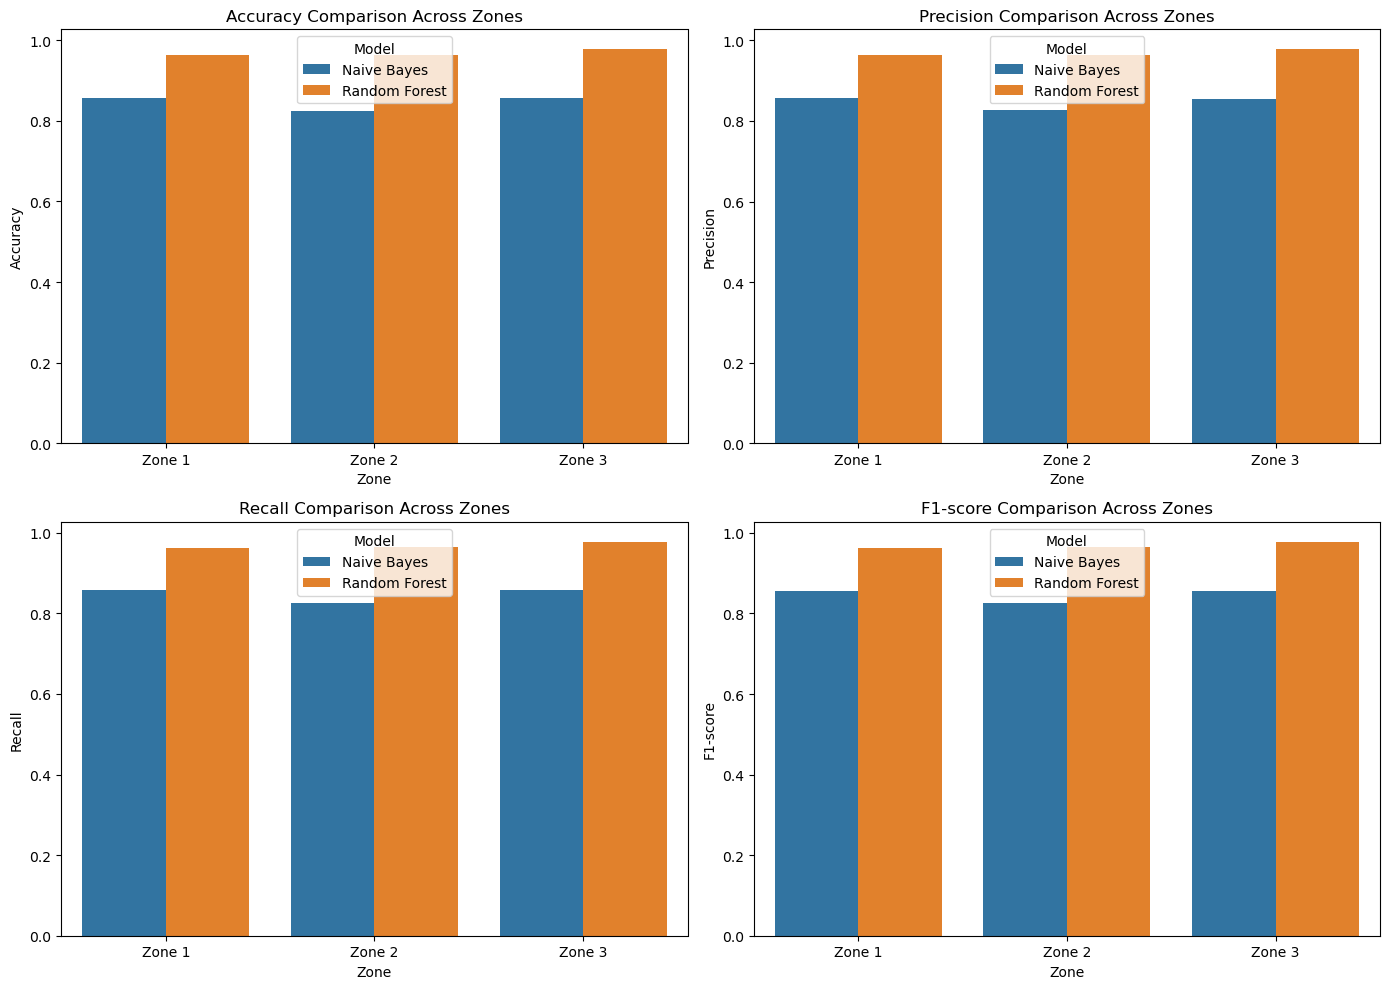

In [171]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Combine all metrics into a single DataFrame for easier plotting
data = {
    'Zone': ['Zone 1', 'Zone 1', 'Zone 1', 'Zone 1', 'Zone 1', 'Zone 1', 'Zone 1', 'Zone 1',
             'Zone 2', 'Zone 2', 'Zone 2', 'Zone 2', 'Zone 2', 'Zone 2', 'Zone 2', 'Zone 2',
             'Zone 3', 'Zone 3', 'Zone 3', 'Zone 3', 'Zone 3', 'Zone 3', 'Zone 3', 'Zone 3'],
    'Model': ['Naive Bayes', 'Naive Bayes', 'Naive Bayes', 'Naive Bayes',
              'Random Forest', 'Random Forest', 'Random Forest', 'Random Forest'] * 3,
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score'] * 6,
    'Score': [nb_metrics_zone1['accuracy'], nb_metrics_zone1['precision'], nb_metrics_zone1['recall'], nb_metrics_zone1['f1_score'],
              rf_metrics_zone1['accuracy'], rf_metrics_zone1['precision'], rf_metrics_zone1['recall'], rf_metrics_zone1['f1_score'],
              nb_metrics_zone2['accuracy'], nb_metrics_zone2['precision'], nb_metrics_zone2['recall'], nb_metrics_zone2['f1_score'],
              rf_metrics_zone2['accuracy'], rf_metrics_zone2['precision'], rf_metrics_zone2['recall'], rf_metrics_zone2['f1_score'],
              nb_metrics_zone3['accuracy'], nb_metrics_zone3['precision'], nb_metrics_zone3['recall'], nb_metrics_zone3['f1_score'],
              rf_metrics_zone3['accuracy'], rf_metrics_zone3['precision'], rf_metrics_zone3['recall'], rf_metrics_zone3['f1_score']]
}

df = pd.DataFrame(data)

# Separate plots for each metric
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
for i, metric in enumerate(metrics):
    ax = axs[i//2, i%2]
    sns.barplot(x='Zone', y='Score', hue='Model', data=df[df['Metric'] == metric], ax=ax)
    ax.set_title(f'{metric} Comparison Across Zones')
    ax.set_ylabel(metric)
    ax.set_xlabel('Zone')

plt.tight_layout()
plt.show()


The comparative analysis of the Categorical Naive Bayes and Random Forest models across different zones reveals that Random Forest consistently outperforms Naive Bayes in all evaluated metrics, indicating that the Random Forest model is more effective for our data. The poor performance of Naive Bayes might be attributed to the categorization of descriptive features, which likely caused significant information loss. Additionally, the Naive Bayes model struggled with zero probabilities due to the high number of feature classes. Despite applying smoothing techniques to mitigate this problem, Naive Bayes still did not achieve optimal results.